In [289]:
import scipy.io
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt

In [290]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [291]:
# Load the .mat file and access data from the file
mat_contents = scipy.io.loadmat('/content/drive/MyDrive/ABY_sensorlog_20230808_104239.mat')
mat_contents

# Print keys (variable names) in the loaded dictionary
print("Variable names in the .mat file:")
for key in mat_contents:
    print(key)

# Access each variable's contents
for key, value in mat_contents.items():
    print("\nVariable name:", key)
    print("Variable data:", value)

Variable names in the .mat file:
__header__
__version__
__globals__
None
AudioInfo
__function_workspace__

Variable name: __header__
Variable data: b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Aug  8 07:43:39 2023'

Variable name: __version__
Variable data: 1.0

Variable name: __globals__
Variable data: []

Variable name: None
Variable data: [(b'Position', b'MCOS', b'timetable', array([[3707764736],
        [         2],
        [         1],
        [         1],
        [         9],
        [         2]], dtype=uint32))                     ]

Variable name: AudioInfo
Variable data: [[(array(['ABY_sensorlog_20230808_104239.m4a'], dtype='<U33'), array(['AAC'], dtype='<U3'), array([[2]], dtype=uint8), array([[16000]], dtype=uint16), array([[515072]], dtype=int32), array([[32.192]]), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([[48]], dtype=uint8))]]

Variable name: __function_workspace__
Variable d

/usr/local/lib/python3.10/dist-packages/scipy/io/matlab/_mio.py:227: MatReadWarning:

Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files



In [292]:
# Read the Excel file
xls_file = pd.ExcelFile('/content/drive/MyDrive/Data.xlsx')

# Get the sheet names
sheet_names = xls_file.sheet_names
dfs = {}

# Iterate over each sheet and assign it to a new DataFrame
for sheet_name in sheet_names:
    dfs[sheet_name] = pd.read_excel(xls_file, sheet_name)

# Now, you can access each DataFrame using its corresponding sheet name
for sheet_name, df in dfs.items():
    print(f"DataFrame for sheet '{sheet_name}':")
    print(df.head())
    print(df.shape)

Exception ignored in: <function ExcelFile.__del__ at 0x7b86bc8317e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/excel/_base.py", line 1779, in __del__
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/excel/_base.py", line 1767, in close
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/excel/_base.py", line 574, in close
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/common.py", line 125, in close
OSError: [Errno 107] Transport endpoint is not connected


DataFrame for sheet 'Acceleration1':
               Timestamp_acc     X_acc    Y_acc     Z_acc
0   08-Aug-2023 10:42:39.090   -0.6874   2.6145    9.4738
1   08-Aug-2023 10:42:39.189    0.2087   2.5612    8.7987
2   08-Aug-2023 10:42:39.289    0.8233   1.5580   10.0211
3   08-Aug-2023 10:42:39.388    0.5631   1.3448    9.7494
4   08-Aug-2023 10:42:39.487    0.4777   2.7216    9.0319
(322, 4)
DataFrame for sheet 'AngularVelocity1':
               Timestamp_ang     X_ang     Y_ang    Z_ang
0   08-Aug-2023 10:42:39.097   -0.5279   -0.1800   0.4034
1   08-Aug-2023 10:42:39.196    0.3128   -0.2669   0.4420
2   08-Aug-2023 10:42:39.296   -0.0512    0.5064   0.6726
3   08-Aug-2023 10:42:39.396    0.3059    0.3728   0.6971
4   08-Aug-2023 10:42:39.495   -0.0193    0.3177   0.3420
(322, 4)
DataFrame for sheet 'MagneticField1':
               Timestamp_mag     X_mag     Y_mag      Z_mag
0   08-Aug-2023 10:42:39.088   22.3031   -1.8409   -44.6038
1   08-Aug-2023 10:42:39.188   19.9651   -2.7399   

In [293]:
dfs.keys()

dict_keys(['Acceleration1', 'AngularVelocity1', 'MagneticField1', 'Orientation1', 'Position1'])

Stitching Acceleration1', 'AngularVelocity1', 'MagneticField1', 'Orientation1' dataframes into one consolidated dataframe called df_combined

In [294]:
df_combined = pd.concat([dfs['Acceleration1'],dfs['AngularVelocity1'],dfs['MagneticField1'],
                    dfs['Orientation1']], axis=1)
df_combined.head()

Timestamp_acc     X_acc    Y_acc     Z_acc  \
0   08-Aug-2023 10:42:39.090   -0.6874   2.6145    9.4738   
1   08-Aug-2023 10:42:39.189    0.2087   2.5612    8.7987   
2   08-Aug-2023 10:42:39.289    0.8233   1.5580   10.0211   
3   08-Aug-2023 10:42:39.388    0.5631   1.3448    9.7494   
4   08-Aug-2023 10:42:39.487    0.4777   2.7216    9.0319   

               Timestamp_ang     X_ang     Y_ang    Z_ang  \
0   08-Aug-2023 10:42:39.097   -0.5279   -0.1800   0.4034   
1   08-Aug-2023 10:42:39.196    0.3128   -0.2669   0.4420   
2   08-Aug-2023 10:42:39.296   -0.0512    0.5064   0.6726   
3   08-Aug-2023 10:42:39.396    0.3059    0.3728   0.6971   
4   08-Aug-2023 10:42:39.495   -0.0193    0.3177   0.3420   

               Timestamp_mag     X_mag     Y_mag      Z_mag  \
0   08-Aug-2023 10:42:39.088   22.3031   -1.8409   -44.6038   
1   08-Aug-2023 10:42:39.188   19.9651   -2.7399   -45.4534   
2   08-Aug-2023 10:42:39.288   19.9828   -4.6182   -45.4229   
3   08-Aug-2023 10:42:39.387   21.5404   -6.6315   -44.1276   
4   08-Aug-2023 10:42:39.487   22.2615   -9.2683   -43.2922   

               Timestamp_ori      X_ori      Y_ori     Z_ori  
0   08-Aug-2023 10:42:39.087   165.4113   -13.8250   -0.1837  
1   08-Aug-2023 10:42:39.187   163.0280   -13.7230   -3.4601  
2   08-Aug-2023 10:42:39.286   159.1013   -13.8454   -4.0659  
3   08-Aug-2023 10:42:39.386   155.1935   -14.2814   -2.2925  
4   08-Aug-2023 10:42:39.486   150.7567   -15.0293   -1.7628

In [295]:
for i in dfs.keys():
  print(dfs[i].columns[0])

Timestamp_acc
Timestamp_ang
Timestamp_mag
Timestamp_ori
Timestamp_pos


In [296]:
dfs['Position1'].columns

Index(['Timestamp_pos', 'latitude_pos', 'longitude_pos', 'altitude_pos',
       'speed_pos', 'course_pos', 'hacc_pos'],
      dtype='object')

Converting the datatypes of timestamp and other features

In [297]:
from re import X
for sheet_name, df in dfs.items():
  var = 'Timestamp_' + sheet_name[:3].lower()
  x = 'X_' + sheet_name[:3].lower()
  y = 'Y_' + sheet_name[:3].lower()
  z = 'Z_' + sheet_name[:3].lower()
  # print(var)
  # # Convert 'timestamp' column to datetime
  df[var] = pd.to_datetime(df[var])

  # # Set 'timestamp' column as index
  df.set_index(var, inplace=True)
  if sheet_name != 'Position1':
    df[x] = df[x].astype('float')
    df[y] = df[y].astype('float')
    df[z] = df[z].astype('float')
  else:
    for i in ['latitude_pos', 'longitude_pos', 'altitude_pos', 'speed_pos','course_pos', 'hacc_pos']:
      df[i] = df[i].astype('float')

In [298]:
dfs['Position1'].head(10)
# 'Acceleration1', 'AngularVelocity1', 'MagneticField1', 'Orientation1', 'Position1'

latitude_pos  longitude_pos  altitude_pos  speed_pos  \
Timestamp_pos                                                                   
2023-08-08 10:42:39.319       32.5259        35.8397       655.881      0.001   
2023-08-08 10:42:41.319       32.5259        35.8396       655.335      0.002   
2023-08-08 10:42:42.319       32.5259        35.8396       655.293      0.000   
2023-08-08 10:42:43.319       32.5255        35.8397       656.247      0.000   
2023-08-08 10:42:44.319       32.5257        35.8397       653.438      0.000   
2023-08-08 10:42:45.319       32.5257        35.8397       655.168      0.589   
2023-08-08 10:42:46.318       32.5257        35.8397       655.806      0.589   
2023-08-08 10:42:47.842       32.5257        35.8397       655.682      0.600   
2023-08-08 10:42:48.842       32.5257        35.8397       655.783      0.616   
2023-08-08 10:42:49.842       32.5257        35.8397       655.783      0.616   

                         course_pos  hacc_pos  
Timestamp_pos                                  
2023-08-08 10:42:39.319       0.000   200.000  
2023-08-08 10:42:41.319       0.000   200.000  
2023-08-08 10:42:42.319       0.000   200.000  
2023-08-08 10:42:43.319       0.000    92.420  
2023-08-08 10:42:44.319       0.000    43.479  
2023-08-08 10:42:45.319       0.000    28.380  
2023-08-08 10:42:46.318       0.000    18.919  
2023-08-08 10:42:47.842     237.771     8.814  
2023-08-08 10:42:48.842     195.753     7.659  
2023-08-08 10:42:49.842     195.753     7.659

In [299]:
df_acc = dfs['Acceleration1']
df_ang = dfs['AngularVelocity1']
df_mag = dfs['MagneticField1']
df_ori = dfs['Orientation1']
df_pos = dfs['Position1']

print('Shape of df_acc: ', df_acc.shape)
print('Shape of df_ang: ', df_ang.shape)
print('Shape of df_mag: ', df_mag.shape)
print('Shape of df_ori: ', df_ori.shape)
print('Shape of df_pos: ', df_pos.shape)

Shape of df_acc:  (322, 3)
Shape of df_ang:  (322, 3)
Shape of df_mag:  (322, 3)
Shape of df_ori:  (322, 3)
Shape of df_pos:  (31, 6)


In [300]:
df_combined.head()

Timestamp_acc     X_acc    Y_acc     Z_acc  \
0   08-Aug-2023 10:42:39.090   -0.6874   2.6145    9.4738   
1   08-Aug-2023 10:42:39.189    0.2087   2.5612    8.7987   
2   08-Aug-2023 10:42:39.289    0.8233   1.5580   10.0211   
3   08-Aug-2023 10:42:39.388    0.5631   1.3448    9.7494   
4   08-Aug-2023 10:42:39.487    0.4777   2.7216    9.0319   

               Timestamp_ang     X_ang     Y_ang    Z_ang  \
0   08-Aug-2023 10:42:39.097   -0.5279   -0.1800   0.4034   
1   08-Aug-2023 10:42:39.196    0.3128   -0.2669   0.4420   
2   08-Aug-2023 10:42:39.296   -0.0512    0.5064   0.6726   
3   08-Aug-2023 10:42:39.396    0.3059    0.3728   0.6971   
4   08-Aug-2023 10:42:39.495   -0.0193    0.3177   0.3420   

               Timestamp_mag     X_mag     Y_mag      Z_mag  \
0   08-Aug-2023 10:42:39.088   22.3031   -1.8409   -44.6038   
1   08-Aug-2023 10:42:39.188   19.9651   -2.7399   -45.4534   
2   08-Aug-2023 10:42:39.288   19.9828   -4.6182   -45.4229   
3   08-Aug-2023 10:42:39.387   21.5404   -6.6315   -44.1276   
4   08-Aug-2023 10:42:39.487   22.2615   -9.2683   -43.2922   

               Timestamp_ori      X_ori      Y_ori     Z_ori  
0   08-Aug-2023 10:42:39.087   165.4113   -13.8250   -0.1837  
1   08-Aug-2023 10:42:39.187   163.0280   -13.7230   -3.4601  
2   08-Aug-2023 10:42:39.286   159.1013   -13.8454   -4.0659  
3   08-Aug-2023 10:42:39.386   155.1935   -14.2814   -2.2925  
4   08-Aug-2023 10:42:39.486   150.7567   -15.0293   -1.7628

In [301]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Timestamp_acc  322 non-null    object
 1   X_acc          322 non-null    object
 2   Y_acc          322 non-null    object
 3   Z_acc          322 non-null    object
 4   Timestamp_ang  322 non-null    object
 5   X_ang          322 non-null    object
 6   Y_ang          322 non-null    object
 7   Z_ang          322 non-null    object
 8   Timestamp_mag  322 non-null    object
 9   X_mag          322 non-null    object
 10  Y_mag          322 non-null    object
 11  Z_mag          322 non-null    object
 12  Timestamp_ori  322 non-null    object
 13  X_ori          322 non-null    object
 14  Y_ori          322 non-null    object
 15  Z_ori          322 non-null    object
dtypes: object(16)
memory usage: 40.4+ KB


In [302]:
df_acc.describe()

X_acc       Y_acc       Z_acc
count  322.000000  322.000000  322.000000
mean     1.309219    2.126013    9.221961
std      2.281241    1.573909    0.929838
min     -5.852200   -3.985800    5.184000
25%     -0.140650    1.303300    8.774300
50%      1.634250    2.299900    9.327550
75%      2.805400    3.186100    9.768500
max     10.169700    5.363200   11.495600

In [303]:
df_ang.describe()

X_ang       Y_ang       Z_ang
count  322.000000  322.000000  322.000000
mean     0.080252    0.114784    0.463295
std      0.277630    0.375012    0.599715
min     -0.724500   -1.013900   -1.140400
25%     -0.088975   -0.096750    0.091150
50%      0.078400    0.087550    0.481050
75%      0.244125    0.292325    0.773175
max      1.045600    1.604000    2.899200

In [304]:
df_mag.describe()

X_mag       Y_mag       Z_mag
count  322.000000  322.000000  322.000000
mean    -6.110169  -15.765132  -36.256327
std     23.575971   16.876393    6.984345
min    -42.974600  -45.310100  -52.451200
25%    -32.688425  -28.159775  -42.172275
50%      5.111650  -15.506800  -35.254650
75%     14.075575   -7.082100  -31.739975
max     32.863400   38.221300  -22.078000

In [305]:
df_ori.describe()

X_ori       Y_ori       Z_ori
count  322.000000  322.000000  322.000000
mean    41.746510  -13.543228   -9.395018
std     89.556287    8.699519   11.616318
min   -177.767900  -30.307600  -43.866900
25%    -28.602150  -18.229925  -16.493800
50%     46.985150  -14.289800  -10.729350
75%    123.056725   -9.045225   -2.629275
max    177.218500   19.752400   18.583300

In [306]:
import plotly.graph_objs as go
import plotly.offline as py

# Create trace
trace = go.Scatter3d(
    x=df_ori['X_ori'],
    y=df_ori['Y_ori'],
    z=df_ori['Z_ori'],
    mode='lines',
    marker=dict(
        size=4,
        color='blue',
        opacity=0.8
    ),
    line=dict(
        color='red',
        width=2
    )
)

# Create layout
layout = go.Layout(
    title='3D Orientation Simulation',
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    )
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Plot figure
py.iplot(fig, filename='3d-orientation-simulation')


In [307]:
new_frequency = '200L'  # any larger interval

# Resample the DataFrame index to the new frequency
df_resampled = df_acc.resample(new_frequency).mean()  # You can use other aggregation functions if needed, such as 'sum', 'median', etc.

df_resampled['new_timestamp'] = df_resampled.index
df_resampled

X_acc    Y_acc     Z_acc           new_timestamp
Timestamp_acc                                                              
2023-08-08 10:42:39.000 -0.23935  2.58785   9.13625 2023-08-08 10:42:39.000
2023-08-08 10:42:39.200  0.69320  1.45140   9.88525 2023-08-08 10:42:39.200
2023-08-08 10:42:39.400 -0.21135  2.31200   9.22755 2023-08-08 10:42:39.400
2023-08-08 10:42:39.600 -0.44385  1.69830  10.23625 2023-08-08 10:42:39.600
2023-08-08 10:42:39.800 -0.88975  2.01160   9.68645 2023-08-08 10:42:39.800
...                          ...      ...       ...                     ...
2023-08-08 10:43:10.200  2.33415  1.16510   9.81070 2023-08-08 10:43:10.200
2023-08-08 10:43:10.400  2.21115  1.19600   9.33875 2023-08-08 10:43:10.400
2023-08-08 10:43:10.600  3.32905  1.47750   9.64945 2023-08-08 10:43:10.600
2023-08-08 10:43:10.800  2.65405  1.02775   9.39615 2023-08-08 10:43:10.800
2023-08-08 10:43:11.000  1.25390  1.21160   9.39840 2023-08-08 10:43:11.000

[161 rows x 4 columns]

In [308]:
start_datetime = '2023-01-01 00:00:00'
df = pd.DataFrame()
df_acc2 = pd.DataFrame()
df = df_acc

# Define the number of rows in DataFrame
num_rows = len(df)

# Create a new datetime range
new_datetime_range = pd.date_range(start=start_datetime, periods=num_rows, freq='S')

df['new_datetime'] = new_datetime_range
df = df.set_index('new_datetime')

df_acc2 = df

In [309]:
start_datetime = '2023-01-01 00:00:00'
df = pd.DataFrame()
df_ang2 = pd.DataFrame()
df = df_ang

# Define the number of rows in DataFrame
num_rows = len(df)

# Create a new datetime range
new_datetime_range = pd.date_range(start=start_datetime, periods=num_rows, freq='S')

df['new_datetime'] = new_datetime_range
df = df.set_index('new_datetime')

df_ang2 = df

In [310]:
start_datetime = '2023-01-01 00:00:00'
df = pd.DataFrame()
df_mag2 = pd.DataFrame()
df = df_mag

# Define the number of rows in DataFrame
num_rows = len(df)

# Create a new datetime range
new_datetime_range = pd.date_range(start=start_datetime, periods=num_rows, freq='S')

df['new_datetime'] = new_datetime_range
df = df.set_index('new_datetime')

df_mag2 = df

In [311]:
start_datetime = '2023-01-01 00:00:00'
df = pd.DataFrame()
df_ori2 = pd.DataFrame()
df = df_ori

# Define the number of rows in DataFrame
num_rows = len(df)

# Create a new datetime range
new_datetime_range = pd.date_range(start=start_datetime, periods=num_rows, freq='S')

df['new_datetime'] = new_datetime_range
df = df.set_index('new_datetime')

df_ori2 = df

Defined df_acc2, df_ang2, df_mag2, df_ori2 with new timestamps with frequency as 1S for easier processing (avoiding the resampling method to prevent data loss)

In [312]:
df_acc2

X_acc   Y_acc    Z_acc
new_datetime                                
2023-01-01 00:00:00 -0.6874  2.6145   9.4738
2023-01-01 00:00:01  0.2087  2.5612   8.7987
2023-01-01 00:00:02  0.8233  1.5580  10.0211
2023-01-01 00:00:03  0.5631  1.3448   9.7494
2023-01-01 00:00:04  0.4777  2.7216   9.0319
...                     ...     ...      ...
2023-01-01 00:05:17  3.6033  1.6451   9.5844
2023-01-01 00:05:18  3.0548  1.3099   9.7145
2023-01-01 00:05:19  2.6740  0.6984   9.6688
2023-01-01 00:05:20  2.6341  1.3571   9.1235
2023-01-01 00:05:21  1.2539  1.2116   9.3984

[322 rows x 3 columns]

In [313]:
df_acc2.columns

Index(['X_acc', 'Y_acc', 'Z_acc'], dtype='object')

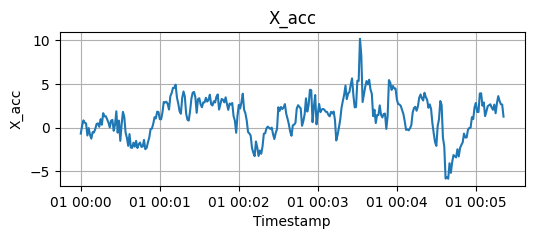

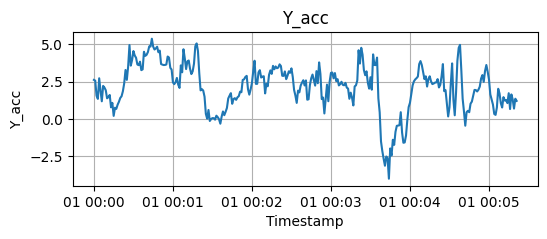

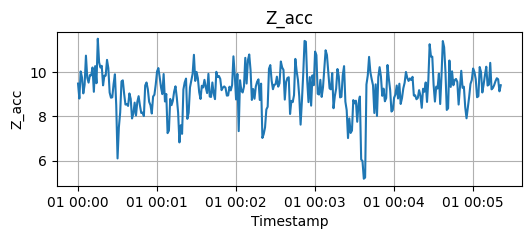

In [314]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has a datetime index and contains time series data
# Replace 'df' with the name of your DataFrame
for column in df_acc2.columns:
    plt.figure(figsize=(6, 2))
    plt.plot(df_acc2.index, df_acc2[column])
    plt.title(column)
    plt.xlabel('Timestamp')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

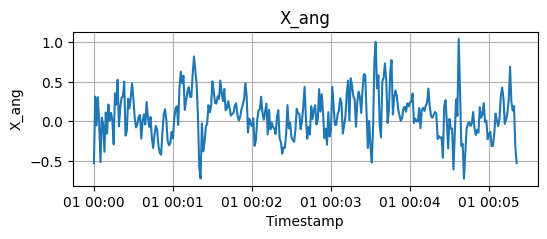

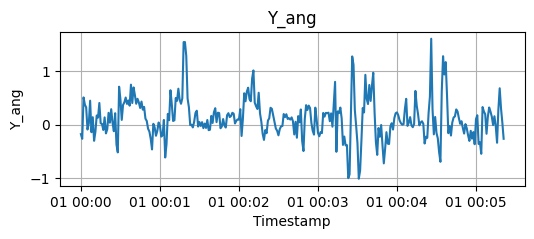

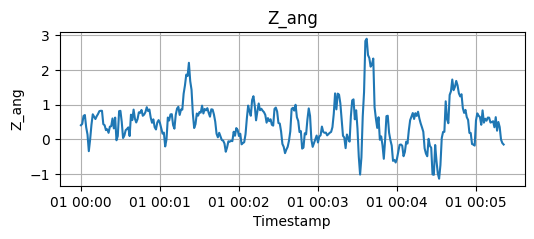

In [315]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has a datetime index and contains time series data
# Replace 'df' with the name of your DataFrame
for column in df_ang2.columns:
    plt.figure(figsize=(6, 2))
    plt.plot(df_ang2.index, df_ang2[column])
    plt.title(column)
    plt.xlabel('Timestamp')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

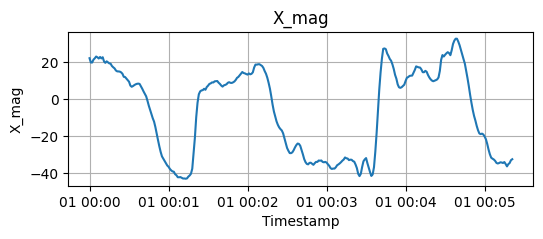

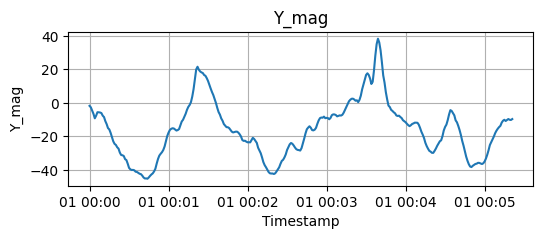

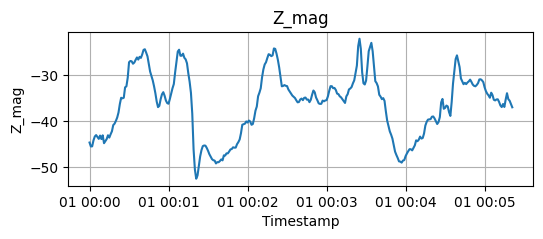

In [316]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has a datetime index and contains time series data
# Replace 'df' with the name of your DataFrame
for column in df_mag2.columns:
    plt.figure(figsize=(6, 2))
    plt.plot(df_mag2.index, df_mag2[column])
    plt.title(column)
    plt.xlabel('Timestamp')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

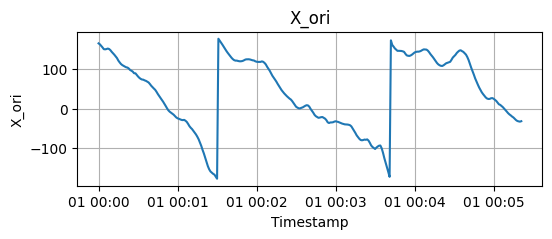

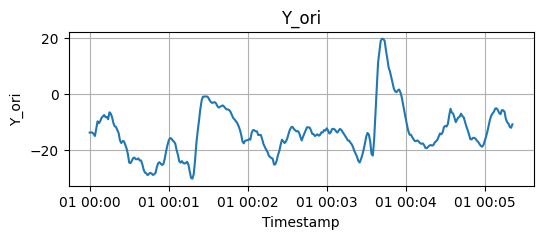

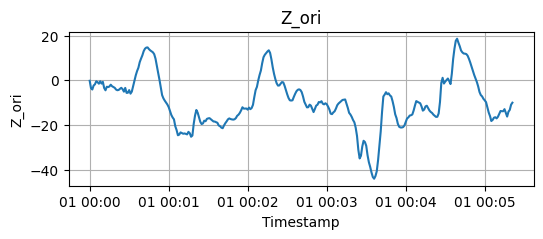

In [317]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has a datetime index and contains time series data
# Replace 'df' with the name of your DataFrame
for column in df_ori2.columns:
    plt.figure(figsize=(6, 2))
    plt.plot(df_ori2.index, df_ori2[column])
    plt.title(column)
    plt.xlabel('Timestamp')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

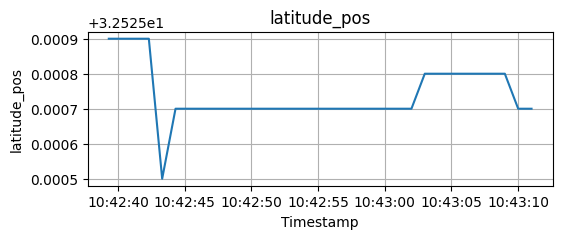

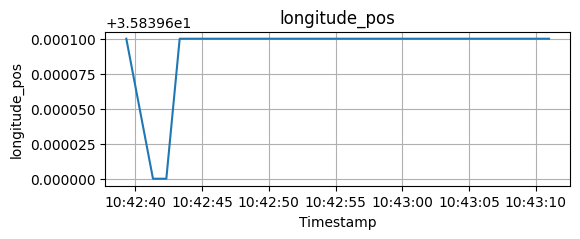

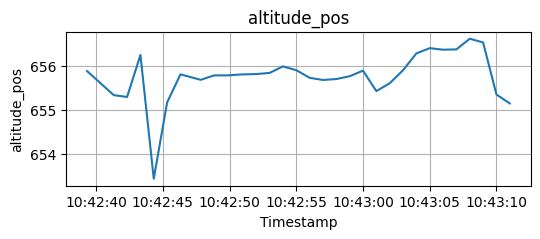

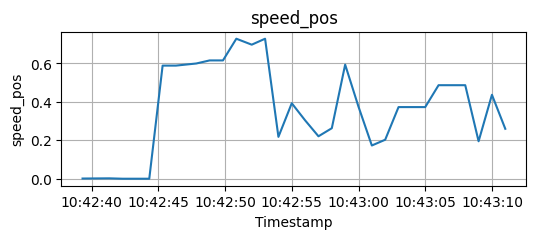

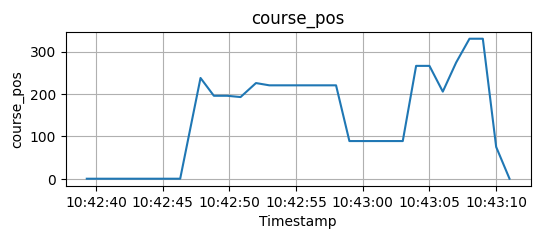

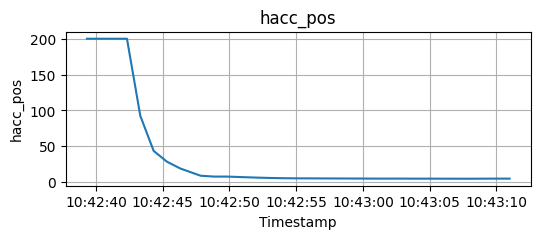

In [318]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has a datetime index and contains time series data
# Replace 'df' with the name of your DataFrame
for column in df_pos.columns:
    plt.figure(figsize=(6, 2))
    plt.plot(df_pos.index, df_pos[column])
    plt.title(column)
    plt.xlabel('Timestamp')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

Theoretical correlations between the given physical quantities:

1. Drones experience both linear and angular accelerations during flight. Changes in linear acceleration (measured by accelerometers) can be correlated with changes in angular velocity (measured by gyroscopes).

2. Angular velocity sensors (gyroscopes) measure the rate of change of orientation, which is directly related to the angular position of the drone. Integrating angular velocity over time provides the angular position of the drone relative to its starting orientation.

3. In drone navigation systems, magnetometers are used to measure the Earth's magnetic field, which helps determine the drone's heading or orientation relative to magnetic north. Changes in the drone's angular position can affect the measured magnetic field.

4. Accelerometers measure linear accelerations experienced by the drone along its three axes. Inertial navigation systems (INS) often incorporate accelerometers to estimate the drone's velocity and position based on acceleration measurements.

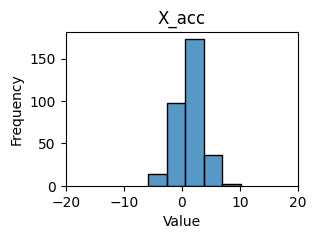

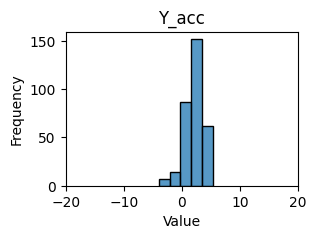

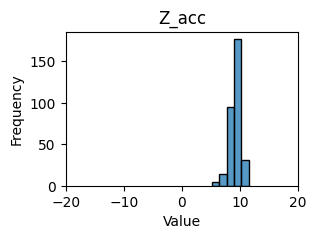

In [319]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example plot with seaborn
for column in df_acc2.columns:
    plt.figure(figsize=(3, 2))
    sns.histplot(df_acc2[column],bins=5)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xlim((-20,20))
    plt.show()

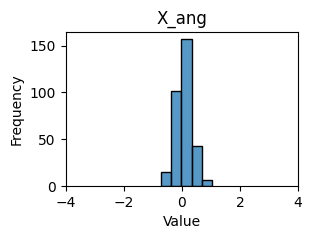

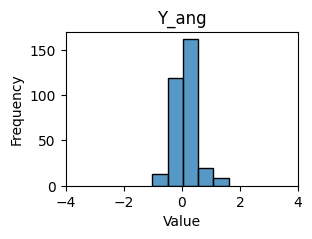

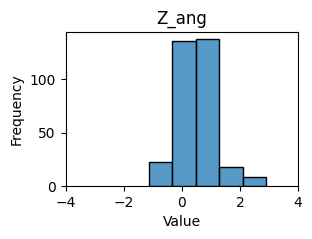

In [320]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example plot with seaborn
for column in df_ang2.columns:
    plt.figure(figsize=(3, 2))
    sns.histplot(df_ang2[column],bins=5)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xlim((-4,4))
    plt.show()

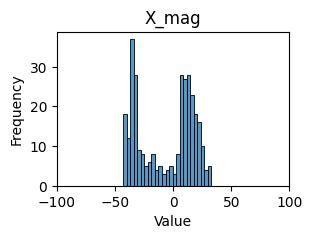

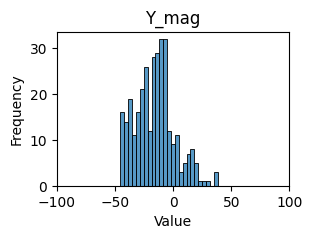

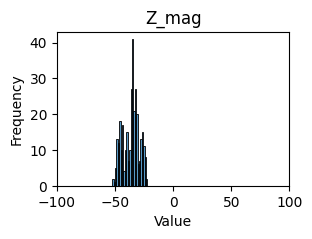

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt
# Example plot with seaborn
for column in df_mag2.columns:
    plt.figure(figsize=(3, 2))
    sns.histplot(df_mag2[column],bins=25)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xlim((-100,100))
    plt.show()

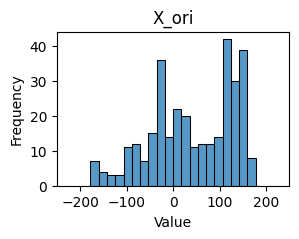

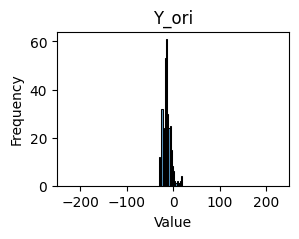

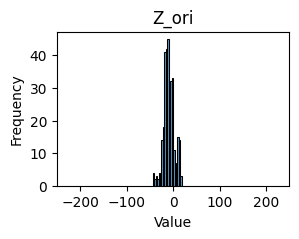

In [322]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example plot with seaborn

for column in df_ori2.columns:
    plt.figure(figsize=(3, 2))
    sns.histplot(df_ori2[column],bins=20)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xlim((-250,250))
    plt.show()

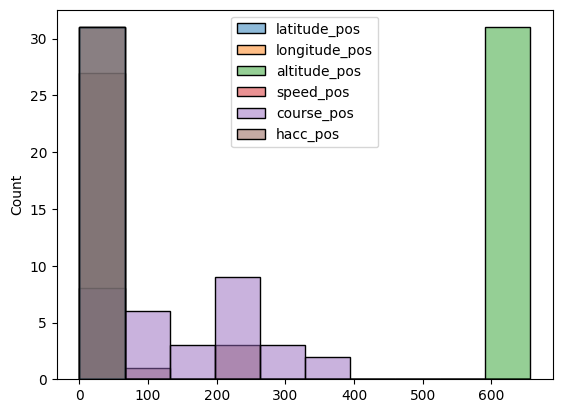

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example plot with seaborn
sns.histplot(df_pos)
plt.show()

In [324]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Timestamp_acc  322 non-null    object
 1   X_acc          322 non-null    object
 2   Y_acc          322 non-null    object
 3   Z_acc          322 non-null    object
 4   Timestamp_ang  322 non-null    object
 5   X_ang          322 non-null    object
 6   Y_ang          322 non-null    object
 7   Z_ang          322 non-null    object
 8   Timestamp_mag  322 non-null    object
 9   X_mag          322 non-null    object
 10  Y_mag          322 non-null    object
 11  Z_mag          322 non-null    object
 12  Timestamp_ori  322 non-null    object
 13  X_ori          322 non-null    object
 14  Y_ori          322 non-null    object
 15  Z_ori          322 non-null    object
dtypes: object(16)
memory usage: 40.4+ KB


In [325]:
df_combined.head()

Timestamp_acc     X_acc    Y_acc     Z_acc  \
0   08-Aug-2023 10:42:39.090   -0.6874   2.6145    9.4738   
1   08-Aug-2023 10:42:39.189    0.2087   2.5612    8.7987   
2   08-Aug-2023 10:42:39.289    0.8233   1.5580   10.0211   
3   08-Aug-2023 10:42:39.388    0.5631   1.3448    9.7494   
4   08-Aug-2023 10:42:39.487    0.4777   2.7216    9.0319   

               Timestamp_ang     X_ang     Y_ang    Z_ang  \
0   08-Aug-2023 10:42:39.097   -0.5279   -0.1800   0.4034   
1   08-Aug-2023 10:42:39.196    0.3128   -0.2669   0.4420   
2   08-Aug-2023 10:42:39.296   -0.0512    0.5064   0.6726   
3   08-Aug-2023 10:42:39.396    0.3059    0.3728   0.6971   
4   08-Aug-2023 10:42:39.495   -0.0193    0.3177   0.3420   

               Timestamp_mag     X_mag     Y_mag      Z_mag  \
0   08-Aug-2023 10:42:39.088   22.3031   -1.8409   -44.6038   
1   08-Aug-2023 10:42:39.188   19.9651   -2.7399   -45.4534   
2   08-Aug-2023 10:42:39.288   19.9828   -4.6182   -45.4229   
3   08-Aug-2023 10:42:39.387   21.5404   -6.6315   -44.1276   
4   08-Aug-2023 10:42:39.487   22.2615   -9.2683   -43.2922   

               Timestamp_ori      X_ori      Y_ori     Z_ori  
0   08-Aug-2023 10:42:39.087   165.4113   -13.8250   -0.1837  
1   08-Aug-2023 10:42:39.187   163.0280   -13.7230   -3.4601  
2   08-Aug-2023 10:42:39.286   159.1013   -13.8454   -4.0659  
3   08-Aug-2023 10:42:39.386   155.1935   -14.2814   -2.2925  
4   08-Aug-2023 10:42:39.486   150.7567   -15.0293   -1.7628

In [326]:
df_pos.head()

latitude_pos  longitude_pos  altitude_pos  speed_pos  \
Timestamp_pos                                                                   
2023-08-08 10:42:39.319       32.5259        35.8397       655.881      0.001   
2023-08-08 10:42:41.319       32.5259        35.8396       655.335      0.002   
2023-08-08 10:42:42.319       32.5259        35.8396       655.293      0.000   
2023-08-08 10:42:43.319       32.5255        35.8397       656.247      0.000   
2023-08-08 10:42:44.319       32.5257        35.8397       653.438      0.000   

                         course_pos  hacc_pos  
Timestamp_pos                                  
2023-08-08 10:42:39.319         0.0   200.000  
2023-08-08 10:42:41.319         0.0   200.000  
2023-08-08 10:42:42.319         0.0   200.000  
2023-08-08 10:42:43.319         0.0    92.420  
2023-08-08 10:42:44.319         0.0    43.479

In [327]:
df_combined.columns

Index(['Timestamp_acc', 'X_acc', 'Y_acc', 'Z_acc', 'Timestamp_ang', 'X_ang',
       'Y_ang', 'Z_ang', 'Timestamp_mag', 'X_mag', 'Y_mag', 'Z_mag',
       'Timestamp_ori', 'X_ori', 'Y_ori', 'Z_ori'],
      dtype='object')

In [328]:
df_combined_second = df_combined[['Timestamp_acc','X_acc', 'Y_acc', 'Z_acc',  'X_ang',
       'Y_ang', 'Z_ang', 'X_mag', 'Y_mag', 'Z_mag','X_ori', 'Y_ori', 'Z_ori']].copy()
df_combined_second['Timestamp_acc'] = pd.to_datetime(df_combined_second['Timestamp_acc'])

df_combined_second.set_index('Timestamp_acc', inplace=True)
df_combined_second = df_combined_second.resample('S').median()
df_combined_second.shape

(33, 12)

In [329]:
df_pos_second = df_pos.copy()
df_pos_second = df_pos_second.resample('S').median()
df_pos_second.shape

(32, 6)

In [330]:
df_combined_second.columns

Index(['X_acc', 'Y_acc', 'Z_acc', 'X_ang', 'Y_ang', 'Z_ang', 'X_mag', 'Y_mag',
       'Z_mag', 'X_ori', 'Y_ori', 'Z_ori'],
      dtype='object')

In [331]:
df_pos_second.columns

Index(['latitude_pos', 'longitude_pos', 'altitude_pos', 'speed_pos',
       'course_pos', 'hacc_pos'],
      dtype='object')

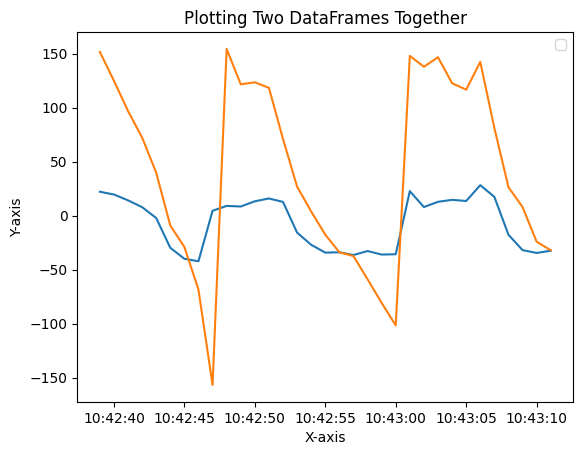

In [332]:
plt.plot(df_combined_second[['X_mag', 'X_ori']])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plotting Two DataFrames Together')
plt.legend()
plt.show()

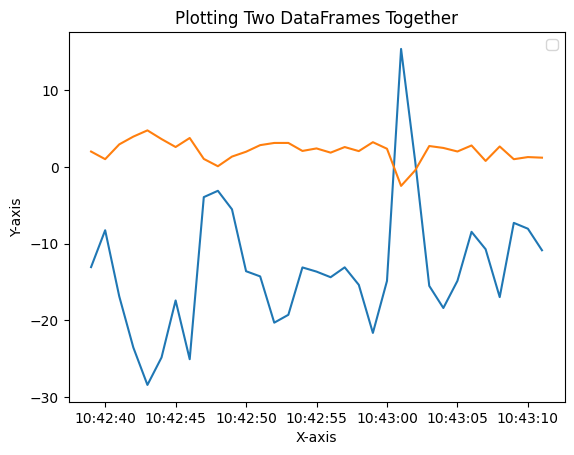

In [333]:
plt.plot(df_combined_second[['Y_ori', 'Y_acc']])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plotting Two DataFrames Together')
plt.legend()
plt.show()

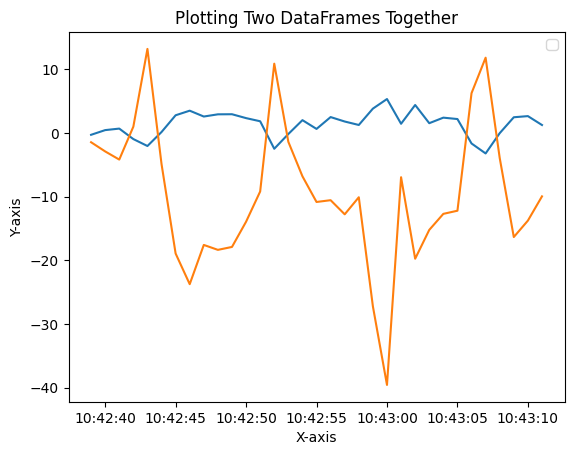

In [334]:
plt.plot(df_combined_second[['X_acc', 'Z_ori']])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plotting Two DataFrames Together')
plt.legend()
plt.show()

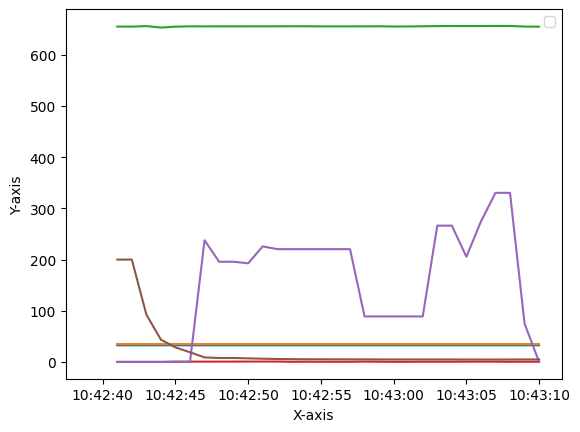

In [335]:
plt.plot(df_pos_second)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [336]:
df_total = pd.concat([df_combined_second[['X_acc', 'Y_acc', 'Z_acc', 'X_ang', 'Y_ang', 'Z_ang',
       'X_mag', 'Y_mag', 'Z_mag', 'X_ori', 'Y_ori', 'Z_ori']].reset_index(), df_pos_second[['latitude_pos', 'longitude_pos', 'altitude_pos', 'speed_pos',
       'course_pos', 'hacc_pos']].reset_index()], axis=1)
# df_total = df_total[['X_acc', 'Y_acc', 'Z_acc', 'X_ang', 'Y_ang', 'Z_ang',
#        'X_mag', 'Y_mag', 'Z_mag', 'X_ori', 'Y_ori', 'Z_ori','latitude_pos', 'longitude_pos', 'altitude_pos', 'speed_pos',
#        'course_pos', 'hacc_pos']]

In [337]:
df_total.dropna(inplace=True)
df_total

Timestamp_acc    X_acc    Y_acc    Z_acc    X_ang    Y_ang    Z_ang  \
0  2023-08-08 10:42:39 -0.28455  2.01160  9.62815 -0.02755  0.07885  0.40815   
2  2023-08-08 10:42:41  0.69040  2.94625  9.64165  0.29405  0.03585  0.33710   
3  2023-08-08 10:42:42 -0.95445  3.96090  8.53510  0.02145  0.40840  0.31815   
4  2023-08-08 10:42:43 -2.04415  4.77260  8.32680 -0.08740  0.39965  0.73410   
5  2023-08-08 10:42:44  0.15290  3.63790  8.93040 -0.19910 -0.09965  0.56190   
6  2023-08-08 10:42:45  2.78220  2.60170  9.15495  0.17700  0.02860  0.38860   
7  2023-08-08 10:42:46  3.50335  3.77810  8.60025  0.40190  0.47635  0.85460   
8  2023-08-08 10:42:47  2.58455  1.04945  9.56065 -0.04910  0.13395  1.08370   
9  2023-08-08 10:42:48  2.93105  0.09410  9.33930  0.33870 -0.00485  0.80735   
10 2023-08-08 10:42:49  2.94570  1.35345  9.34910  0.15165  0.07330  0.11625   
11 2023-08-08 10:42:50  2.33575  1.98640  9.31270  0.09995  0.14875 -0.05160   
12 2023-08-08 10:42:51  1.84135  2.84640  9.40615  0.03085  0.43400  0.15145   
13 2023-08-08 10:42:52 -2.47615  3.13285  9.40630 -0.04215  0.31625  0.85770   
14 2023-08-08 10:42:53 -0.15940  3.13430  8.82405 -0.18245  0.06645  0.59215   
15 2023-08-08 10:42:54  2.01715  2.09065  9.63710 -0.04475  0.09760 -0.09070   
16 2023-08-08 10:42:55  0.63980  2.41830  8.91930  0.03455  0.04660  0.58055   
17 2023-08-08 10:42:56  2.50005  1.86775  9.69715  0.06445  0.18760  0.12275   
18 2023-08-08 10:42:57  1.80145  2.59750  9.90275  0.10920  0.10410  0.16715   
19 2023-08-08 10:42:58  1.25845  2.06735  9.25455  0.29820  0.21025  0.79530   
20 2023-08-08 10:42:59  3.82750  3.23095  8.46630  0.27620 -0.12510  0.35520   
21 2023-08-08 10:43:00  5.33275  2.37570  8.16090  0.18535  0.26695  1.00805   
22 2023-08-08 10:43:01  1.44825 -2.46935  9.71560  0.45635 -0.03755  0.61340   
23 2023-08-08 10:43:02  4.39735 -0.44505  9.05485  0.16140 -0.11850 -0.10405   
24 2023-08-08 10:43:03  1.53880  2.73110  9.25930  0.14820  0.07550 -0.16250   
25 2023-08-08 10:43:04  2.40915  2.48205  9.06170  0.12550  0.02530  0.62445   
26 2023-08-08 10:43:05  2.19040  2.01835  9.46885 -0.19345 -0.00735 -0.34060   
27 2023-08-08 10:43:06 -1.64500  2.80290  9.58625 -0.09130  0.25985  0.21025   
28 2023-08-08 10:43:07 -3.21080  0.78730  9.47165 -0.07090  0.09085  1.39890   
29 2023-08-08 10:43:08 -0.02690  2.67290  9.30665  0.00285 -0.15595  0.36195   
30 2023-08-08 10:43:09  2.47105  1.01135  9.76875 -0.02555  0.15810  0.62300   
31 2023-08-08 10:43:10  2.65040  1.28875  9.41385  0.16590  0.15090  0.41495   

       X_mag     Y_mag     Z_mag      X_ori     Y_ori     Z_ori  \
0   22.23000  -5.73850 -43.82585  151.69600 -13.06610  -1.45090   
2   14.25480 -31.23455 -34.95275   96.95530 -16.88405  -4.17365   
3    7.95150 -40.71495 -26.78520   72.44325 -23.55765   0.99570   
4   -2.09585 -44.06240 -26.75275   39.88205 -28.43445  13.20080   
5  -29.66625 -29.96080 -35.34410   -9.03780 -24.85275  -4.87140   
6  -39.86005 -15.81450 -30.63735  -28.91395 -17.41635 -18.92410   
7  -42.16105  -3.31940 -28.50000  -68.41115 -25.07945 -23.73695   
8    4.58975  17.94135 -46.93490 -156.63870  -3.93475 -17.57645   
9    9.09735   3.34140 -48.48100  154.43635  -3.11020 -18.35000   
10   8.55185 -14.56330 -46.95455  121.69255  -5.52670 -17.89175   
11  13.36220 -19.43775 -43.24955  123.52610 -13.60145 -13.93135   
12  15.97365 -23.56705 -39.57750  118.43355 -14.27610  -9.18525   
13  12.79850 -39.22685 -26.72310   71.03070 -20.31440  10.88335   
14 -15.64105 -37.47435 -29.35890   26.95315 -19.28815  -1.38845   
15 -26.91955 -26.58490 -34.54650    3.92390 -13.10645  -6.79675   
16 -34.14275 -17.28720 -35.26605  -17.50280 -13.65235 -10.83125   
17 -33.86415  -9.83930 -35.48570  -33.82525 -14.38410 -10.55135   
18 -36.38045  -7.94915 -33.29160  -37.34655 -13.09470 -12.76840   
19 -32.67595  -3.28885 -34.58210  -58.79190 -15.37920 -10.09015   
20 -35.94865   2.21450 -29.45935  -80.69435 -21.64945 -27.22125   
21 -35.64430  17.10505 -28.07255 -101.504

In [338]:
df_total.corr()

<ipython-input-338-3b1ffd33522f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



X_acc     Y_acc     Z_acc     X_ang     Y_ang     Z_ang  \
X_acc          1.000000 -0.300226 -0.117421  0.517232 -0.202830 -0.250912   
Y_acc         -0.300226  1.000000 -0.496084 -0.360905  0.427542 -0.040318   
Z_acc         -0.117421 -0.496084  1.000000 -0.063326 -0.221474 -0.250160   
X_ang          0.517232 -0.360905 -0.063326  1.000000 -0.037157  0.095076   
Y_ang         -0.202830  0.427542 -0.221474 -0.037157  1.000000  0.217459   
Z_ang         -0.250912 -0.040318 -0.250160  0.095076  0.217459  1.000000   
X_mag         -0.392019 -0.257049  0.280330 -0.131129  0.007365 -0.122219   
Y_mag          0.645709 -0.508356  0.062794  0.550966 -0.118206  0.146915   
Z_mag         -0.369989  0.540569 -0.419869 -0.124438  0.375920  0.335054   
X_ori         -0.290700 -0.264261  0.287421 -0.026017 -0.129778 -0.385961   
Y_ori          0.265680 -0.952848  0.543696  0.328467 -0.341967 -0.041957   
Z_ori         -0.955805  0.212778  0.228712 -0.514748  0.189437  0.116375   
latitude_pos  -0.139787 -0.070647  0.244858 -0.015817 -0.228626 -0.233742   
longitude_pos  0.202239 -0.246780  0.085027 -0.118856 -0.164551  0.077454   
altitude_pos  -0.183544 -0.072054  0.094473 -0.027877  0.065424 -0.067010   
speed_pos      0.219051 -0.211476  0.230994  0.145704  0.162121  0.017531   
course_pos    -0.179371 -0.152131  0.350467 -0.299442 -0.167570 -0.069608   
hacc_pos      -0.334104  0.315715 -0.096982 -0.033922  0.172776 -0.022526   

                  X_mag     Y_mag     Z_mag     X_ori     Y_ori     Z_ori  \
X_acc         -0.392019  0.645709 -0.369989 -0.290700  0.265680 -0.955805   
Y_acc         -0.257049 -0.508356  0.540569 -0.264261 -0.952848  0.212778   
Z_acc          0.280330  0.062794 -0.419869  0.287421  0.543696  0.228712   
X_ang         -0.131129  0.550966 -0.124438 -0.026017  0.328467 -0.514748   
Y_ang          0.007365 -0.118206  0.375920 -0.129778 -0.341967  0.189437   
Z_ang         -0.122219  0.146915  0.335054 -0.385961 -0.041957  0.116375   
X_mag          1.000000 -0.143824 -0.441137  0.813790  0.327084  0.447958   
Y_mag         -0.143824  1.000000 -0.379935 -0.295679  0.539559 -0.690363   
Z_mag         -0.441137 -0.379935  1.000000 -0.430218 -0.559794  0.280501   
X_ori          0.813790 -0.295679 -0.430218  1.000000  0.295358  0.379329   
Y_ori          0.327084  0.539559 -0.559794  0.295358  1.000000 -0.180370   
Z_ori          0.447958 -0.690363  0.280501  0.379329 -0.180370  1.000000   
latitude_pos   0.435239 -0.089022 -0.199941  0.417198  0.070888  0.100451   
longitude_pos -0.203742  0.323700 -0.205310 -0.130492  0.207811 -0.193632   
altitude_pos   0.399403 -0.061635 -0.077261  0.317051  0.092281  0.202042   
speed_pos      0.104689  0.216075 -0.286112  0.033784  0.207563 -0.211554   
course_pos     0.288657 -0.067523 -0.234192  0.188473  0.187586  0.162923   
hacc_pos       0.266999 -0.288168  0.121457  0.210059 -0.290514  0.325755   

               latitude_pos  longitude_pos  altitude_pos  speed_pos  \
X_acc             -0.139787       0.202239     -0.183544   0.219051   
Y_acc             -0.070647      -0.246780     -0.072054  -0.211476   
Z_acc              0.244858       0.085027      0.094473   0.230994   
X_ang             -0.015817      -0.118856     -0.027877   0.145704   
Y_ang             -0.228626      -0.164551      0.065424   0.162121   
Z_ang             -0.233742       0.077454     -0.067010   0.017531   
X_mag              0.435239      -0.203742      0.399403   0.104689   
Y_mag             -0.089022       0.323700     -0.061635   0.216075   
Z_mag             -0.199941      -0.205310     -0.077261  -0.286112   
X_ori              0.417198      -0.130492      0.317051   0.033784   
Y_ori              0.070888       0.207811      0.092281   0.207563   
Z_ori              0.100451      -0.193632      0.202042  -0.211554   
latitude_pos       1.000000      -0.550459      0.119404  -0.228875   
longitude_pos     -0.550459       1.000000      0.205935   0.425494   
altitude_pos       0.1194

<ipython-input-339-39fd78692e4a>:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



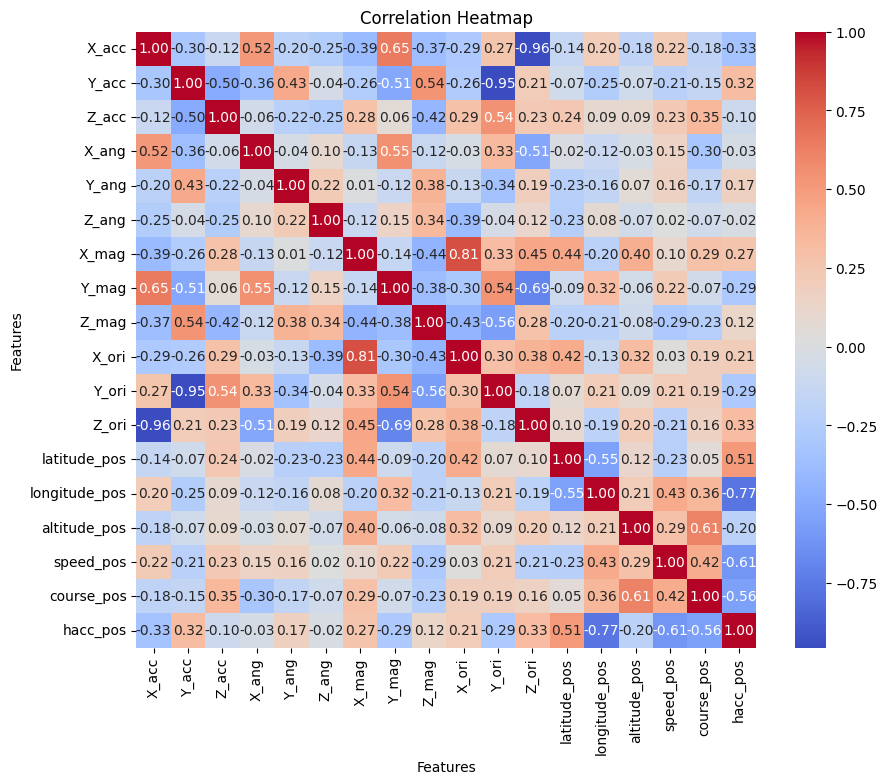

In [339]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a correlation DataFrame named 'corr_df'

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_total.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


In [340]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare your time series data
# Assuming you have a DataFrame named 'df' with columns for each feature and X, Y, Z axis values
for i in ['X_acc', 'Y_acc', 'Z_acc','X_ang', 'Y_ang', 'Z_ang','X_mag', 'Y_mag', 'Z_mag','X_ori', 'Y_ori', 'Z_ori']:
  df_combined[i] = df_combined[i].astype('float')

# Step 2: Compute the correlation matrix
correlation_matrix = df_combined[['X_acc', 'Y_acc', 'Z_acc','X_ang',
       'Y_ang', 'Z_ang','X_mag', 'Y_mag', 'Z_mag','X_ori', 'Y_ori', 'Z_ori']].corr()
correlation_matrix

X_acc     Y_acc     Z_acc     X_ang     Y_ang     Z_ang     X_mag  \
X_acc  1.000000 -0.226366 -0.176061  0.251365 -0.128569 -0.213878 -0.387399   
Y_acc -0.226366  1.000000 -0.262929 -0.108132  0.126651 -0.138806 -0.268682   
Z_acc -0.176061 -0.262929  1.000000  0.086283 -0.027688 -0.181315  0.197517   
X_ang  0.251365 -0.108132  0.086283  1.000000  0.245206  0.095036 -0.083208   
Y_ang -0.128569  0.126651 -0.027688  0.245206  1.000000  0.425214  0.074943   
Z_ang -0.213878 -0.138806 -0.181315  0.095036  0.425214  1.000000 -0.042577   
X_mag -0.387399 -0.268682  0.197517 -0.083208  0.074943 -0.042577  1.000000   
Y_mag  0.538800 -0.483761 -0.033687  0.277848  0.029952  0.202930 -0.118993   
Z_mag -0.262146  0.479305 -0.257600  0.012448  0.074541  0.151251 -0.423618   
X_ori -0.330889 -0.151836  0.207148 -0.056691 -0.050114 -0.298021  0.786536   
Y_ori  0.217527 -0.891842  0.308122  0.168048 -0.133156  0.046637  0.344641   
Z_ori -0.883684  0.215071  0.245635 -0.348362  0.054234  0.025485  0.444910   

          Y_mag     Z_mag     X_ori     Y_ori     Z_ori  
X_acc  0.538800 -0.262146 -0.330889  0.217527 -0.883684  
Y_acc -0.483761  0.479305 -0.151836 -0.891842  0.215071  
Z_acc -0.033687 -0.257600  0.207148  0.308122  0.245635  
X_ang  0.277848  0.012448 -0.056691  0.168048 -0.348362  
Y_ang  0.029952  0.074541 -0.050114 -0.133156  0.054234  
Z_ang  0.202930  0.151251 -0.298021  0.046637  0.025485  
X_mag -0.118993 -0.423618  0.786536  0.344641  0.444910  
Y_mag  1.000000 -0.347663 -0.350781  0.542544 -0.670736  
Z_mag -0.347663  1.000000 -0.388953 -0.499816  0.229073  
X_ori -0.350781 -0.388953  1.000000  0.213909  0.411821  
Y_ori  0.542544 -0.499816  0.213909  1.000000 -0.197933  
Z_ori -0.670736  0.229073  0.411821 -0.197933  1.000000

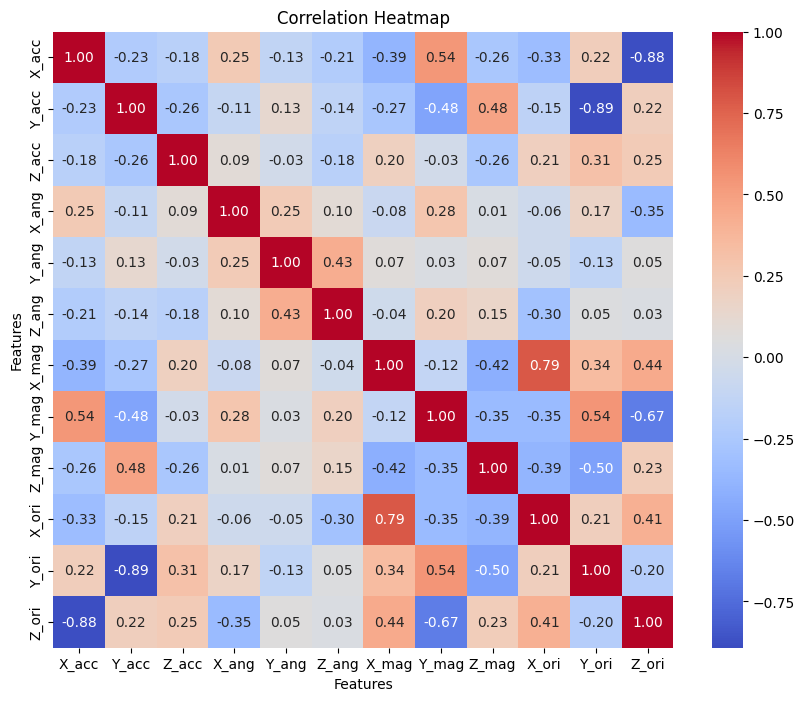

In [341]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a correlation DataFrame named 'corr_df'

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


In [342]:
correlation_matrix

X_acc     Y_acc     Z_acc     X_ang     Y_ang     Z_ang     X_mag  \
X_acc  1.000000 -0.226366 -0.176061  0.251365 -0.128569 -0.213878 -0.387399   
Y_acc -0.226366  1.000000 -0.262929 -0.108132  0.126651 -0.138806 -0.268682   
Z_acc -0.176061 -0.262929  1.000000  0.086283 -0.027688 -0.181315  0.197517   
X_ang  0.251365 -0.108132  0.086283  1.000000  0.245206  0.095036 -0.083208   
Y_ang -0.128569  0.126651 -0.027688  0.245206  1.000000  0.425214  0.074943   
Z_ang -0.213878 -0.138806 -0.181315  0.095036  0.425214  1.000000 -0.042577   
X_mag -0.387399 -0.268682  0.197517 -0.083208  0.074943 -0.042577  1.000000   
Y_mag  0.538800 -0.483761 -0.033687  0.277848  0.029952  0.202930 -0.118993   
Z_mag -0.262146  0.479305 -0.257600  0.012448  0.074541  0.151251 -0.423618   
X_ori -0.330889 -0.151836  0.207148 -0.056691 -0.050114 -0.298021  0.786536   
Y_ori  0.217527 -0.891842  0.308122  0.168048 -0.133156  0.046637  0.344641   
Z_ori -0.883684  0.215071  0.245635 -0.348362  0.054234  0.025485  0.444910   

          Y_mag     Z_mag     X_ori     Y_ori     Z_ori  
X_acc  0.538800 -0.262146 -0.330889  0.217527 -0.883684  
Y_acc -0.483761  0.479305 -0.151836 -0.891842  0.215071  
Z_acc -0.033687 -0.257600  0.207148  0.308122  0.245635  
X_ang  0.277848  0.012448 -0.056691  0.168048 -0.348362  
Y_ang  0.029952  0.074541 -0.050114 -0.133156  0.054234  
Z_ang  0.202930  0.151251 -0.298021  0.046637  0.025485  
X_mag -0.118993 -0.423618  0.786536  0.344641  0.444910  
Y_mag  1.000000 -0.347663 -0.350781  0.542544 -0.670736  
Z_mag -0.347663  1.000000 -0.388953 -0.499816  0.229073  
X_ori -0.350781 -0.388953  1.000000  0.213909  0.411821  
Y_ori  0.542544 -0.499816  0.213909  1.000000 -0.197933  
Z_ori -0.670736  0.229073  0.411821 -0.197933  1.000000

In [343]:
# Threshold value
threshold = 0.73

# Extract coefficients greater than the threshold
significant_correlations = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if correlation_matrix.iloc[i,j] > threshold:
            significant_correlations.append((i, j, correlation_matrix.iloc[i,j]))

print("Correlation coefficients greater than", threshold)
index = ['X_acc', 'Y_acc', 'Z_acc','X_ang', 'Y_ang', 'Z_ang','X_mag', 'Y_mag', 'Z_mag','X_ori', 'Y_ori', 'Z_ori']
for correlation in significant_correlations:
    first = index[correlation[0]]
    second = index[correlation[1]]
    print(f"Correlation between variables {first} and {second}: {correlation[2]}")

Correlation coefficients greater than 0.73
Correlation between variables X_mag and X_ori: 0.7865357401337312


In [344]:
# Threshold value
threshold = -0.73

# Extract coefficients greater than the threshold
significant_correlations = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if correlation_matrix.iloc[i,j] < threshold:
            significant_correlations.append((i, j, correlation_matrix.iloc[i,j]))

print("Correlation coefficients lesser than", threshold)
index = ['X_acc', 'Y_acc', 'Z_acc','X_ang', 'Y_ang', 'Z_ang','X_mag', 'Y_mag', 'Z_mag','X_ori', 'Y_ori', 'Z_ori']
for correlation in significant_correlations:
    first = index[correlation[0]]
    second = index[correlation[1]]
    print(f"Correlation between variables {first} and {second}: {correlation[2]}")

Correlation coefficients lesser than -0.73
Correlation between variables X_acc and Z_ori: -0.8836842742158808
Correlation between variables Y_acc and Y_ori: -0.8918417210724644


In [345]:
# Threshold value
upper_threshold = 0.73
lower_threshold = 0.33

# Extract coefficients greater than the threshold
significant_correlations = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if correlation_matrix.iloc[i,j] >= lower_threshold and correlation_matrix.iloc[i,j] <= upper_threshold:
            significant_correlations.append((i, j, correlation_matrix.iloc[i,j]))

print("Correlation coefficients between ", upper_threshold, " and ", lower_threshold)
index = ['X_acc', 'Y_acc', 'Z_acc','X_ang', 'Y_ang', 'Z_ang','X_mag', 'Y_mag', 'Z_mag','X_ori', 'Y_ori', 'Z_ori']
for correlation in significant_correlations:
    first = index[correlation[0]]
    second = index[correlation[1]]
    print(f"Correlation between variables {first} and {second}: {correlation[2]}")

Correlation coefficients between  0.73  and  0.33
Correlation between variables X_acc and Y_mag: 0.538799744448881
Correlation between variables Y_acc and Z_mag: 0.4793051772617925
Correlation between variables Y_ang and Z_ang: 0.4252141335130444
Correlation between variables X_mag and Y_ori: 0.3446413019133236
Correlation between variables X_mag and Z_ori: 0.4449098218765687
Correlation between variables Y_mag and Y_ori: 0.5425441421954824
Correlation between variables X_ori and Z_ori: 0.41182106857653045


Other techniques for correlation and their limitations:

1. Spearman's Rank Correlation Coefficient: First ranking the data for each variable. Then, it computes the Pearson correlation coefficient between the ranked variables. Suitable for ordinal or non-normally distributed data. Less sensitive to outliers compared to Pearson correlation.

2. Kendall's Tau: Kendall's Tau is a non-parametric measure of association that assesses the strength and direction of the relationship between two variables. Also suitable for ordinal or non-normally distributed data. More computationally intensive than Spearman's correlation.

3. Point-Biserial Correlation Coefficient (r_pb): The point-biserial correlation coefficient is calculated as the Pearson correlation coefficient between the continuous variable and a dummy variable representing the binary variable

A correlation coefficient (r) close to +1 or -1 indicates a strong linear relationship between the variables.

A correlation coefficient between +0.5 and +0.7 (or between -0.5 and -0.7) suggests a moderate linear relationship between the variables.

A correlation coefficient between +0.3 and +0.5 (or between -0.3 and -0.5) indicates a weak linear relationship between the variables.

In [346]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(df_combined['X_acc'], df_combined['Z_ori'])
print("Correlation Coefficient: ", corr_coeff, "P-value is: ", p_value)

# Check if correlation is significant
alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation.")
else:
    print("There is no significant correlation.")


Correlation Coefficient:  -0.8836842742158806 P-value is:  1.6061961152940687e-107
There is a significant correlation.


In [347]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(df_combined['Y_acc'], df_combined['Y_ori'])
print("Correlation Coefficient: ", corr_coeff, "P-value is: ", p_value)

# Check if correlation is significant
alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation.")
else:
    print("There is no significant correlation.")


Correlation Coefficient:  -0.8918417210724643 P-value is:  2.8152851016989515e-112
There is a significant correlation.


In [348]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(df_combined['X_ori'], df_combined['X_mag'])
print("Correlation Coefficient: ", corr_coeff, "P-value is: ", p_value)

# Check if correlation is significant
alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation.")
else:
    print("There is no significant correlation.")


Correlation Coefficient:  0.7865357401337307 P-value is:  5.83956786892185e-69
There is a significant correlation.


In [349]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(df_combined['X_acc'], df_combined['Y_mag'])
print("Correlation Coefficient: ", corr_coeff, "P-value is: ", p_value)

# Check if correlation is significant
alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation.")
else:
    print("There is no significant correlation.")


Correlation Coefficient:  0.5387997444488812 P-value is:  1.2184965408279287e-25
There is a significant correlation.


In [350]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(df_combined['X_mag'], df_combined['Y_ori'])
print("Correlation Coefficient: ", corr_coeff, "P-value is: ", p_value)

# Check if correlation is significant
alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation.")
else:
    print("There is no significant correlation.")


Correlation Coefficient:  0.3446413019133234 P-value is:  2.0694311945740977e-10
There is a significant correlation.


In [351]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(df_combined['Z_ang'], df_combined['Z_ori'])
print("Correlation Coefficient: ", corr_coeff, "P-value is: ", p_value)

# Check if correlation is significant
alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation.")
else:
    print("There is no significant correlation.")


Correlation Coefficient:  0.02548459893741314 P-value is:  0.6486773886781425
There is no significant correlation.


In [352]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(df_combined['X_ang'], df_combined['Y_mag'])
print("Correlation Coefficient: ", corr_coeff, "P-value is: ", p_value)

# Check if correlation is significant
alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation.")
else:
    print("There is no significant correlation.")


Correlation Coefficient:  0.2778481830121592 P-value is:  4.0514351860658453e-07
There is a significant correlation.


In [353]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(df_combined['X_acc'], df_combined['Y_ang'])
print("Correlation Coefficient: ", corr_coeff, "P-value is: ", p_value)

# Check if correlation is significant
alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation.")
else:
    print("There is no significant correlation.")


Correlation Coefficient:  -0.1285692433499444 P-value is:  0.021015496912233464
There is a significant correlation.


In [354]:
df_combined.head()

Timestamp_acc   X_acc   Y_acc    Z_acc  \
0   08-Aug-2023 10:42:39.090 -0.6874  2.6145   9.4738   
1   08-Aug-2023 10:42:39.189  0.2087  2.5612   8.7987   
2   08-Aug-2023 10:42:39.289  0.8233  1.5580  10.0211   
3   08-Aug-2023 10:42:39.388  0.5631  1.3448   9.7494   
4   08-Aug-2023 10:42:39.487  0.4777  2.7216   9.0319   

               Timestamp_ang   X_ang   Y_ang   Z_ang  \
0   08-Aug-2023 10:42:39.097 -0.5279 -0.1800  0.4034   
1   08-Aug-2023 10:42:39.196  0.3128 -0.2669  0.4420   
2   08-Aug-2023 10:42:39.296 -0.0512  0.5064  0.6726   
3   08-Aug-2023 10:42:39.396  0.3059  0.3728  0.6971   
4   08-Aug-2023 10:42:39.495 -0.0193  0.3177  0.3420   

               Timestamp_mag    X_mag   Y_mag    Z_mag  \
0   08-Aug-2023 10:42:39.088  22.3031 -1.8409 -44.6038   
1   08-Aug-2023 10:42:39.188  19.9651 -2.7399 -45.4534   
2   08-Aug-2023 10:42:39.288  19.9828 -4.6182 -45.4229   
3   08-Aug-2023 10:42:39.387  21.5404 -6.6315 -44.1276   
4   08-Aug-2023 10:42:39.487  22.2615 -9.2683 -43.2922   

               Timestamp_ori     X_ori    Y_ori   Z_ori  
0   08-Aug-2023 10:42:39.087  165.4113 -13.8250 -0.1837  
1   08-Aug-2023 10:42:39.187  163.0280 -13.7230 -3.4601  
2   08-Aug-2023 10:42:39.286  159.1013 -13.8454 -4.0659  
3   08-Aug-2023 10:42:39.386  155.1935 -14.2814 -2.2925  
4   08-Aug-2023 10:42:39.486  150.7567 -15.0293 -1.7628

Vector Autoregression (VAR) is a statistical model used to analyze the dynamic relationships among multiple time series variables. In a VAR model, each variable in the system is regressed on its own lagged values as well as the lagged values of all other variables in the system.

We determine the appropriate lag order for the VAR model, which specifies how many past time steps to include in the regression equations. This can be done using information criteria like AIC or BIC, or through hypothesis testing.

In [355]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame or array
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_df = scaler.fit_transform(df_combined[['X_acc', 'X_ang','X_mag','X_ori']])

# Convert the normalized data back to a DataFrame if needed
normalized_df_var = pd.DataFrame(normalized_df, columns=df_combined[['X_acc', 'X_ang','X_mag','X_ori']].columns)

# Print the normalized DataFrame
normalized_df_var


X_acc     X_ang     X_mag     X_ori
0    0.322359  0.111067  0.860752  0.966739
1    0.378288  0.586012  0.829923  0.960025
2    0.416648  0.380374  0.830156  0.948964
3    0.400408  0.582114  0.850695  0.937955
4    0.395078  0.398396  0.860203  0.925457
..        ...       ...       ...       ...
317  0.590161  0.549347  0.088123  0.418905
318  0.555927  0.486583  0.103941  0.412504
319  0.532159  0.519462  0.112200  0.409602
320  0.529669  0.230044  0.132142  0.407714
321  0.443524  0.111406  0.139344  0.410850

[322 rows x 4 columns]

In [356]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tools.eval_measures import rmse, aic

# Load your multivariate time series data into a DataFrame
# Assuming df contains your data with variables y1, y2, ..., yn

# Specify the lag order for the VAR model
lag_order = 10
df_var = normalized_df_var
# Fit the VAR model
model = VAR(df_var)
results = model.fit(lag_order)

# Print summary of the model
print(results.summary())

# Forecast future values
forecast = results.forecast(df_var.values[-lag_order:], steps=10)  # Change steps as needed

# Evaluate forecast accuracy
mse = ((forecast - df_var.values[-lag_order:]) ** 2).mean()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))

# Get AIC
print("AIC:", results.aic)

# Check for cointegration among variables
coint_result = coint_johansen(df_var.values, det_order=0, k_ar_diff=lag_order)
print("Eigenvalues:", coint_result.lr1)
print("Critical Values (90%):", coint_result.cvt)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 05, Mar, 2024
Time:                     02:41:13
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -21.2449
Nobs:                     312.000    HQIC:                  -22.4261
Log likelihood:           2014.30    FPE:                8.34910e-11
AIC:                     -23.2124    Det(Omega_mle):     5.09518e-11
--------------------------------------------------------------------
Results for equation X_acc
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.014273         0.030231            0.472           0.637
L1.X_acc          0.805548         0.061501           13.098           0.000
L1.X_ang         -0.048390         0.032410           -1.493           0.135

Check the signs of the coefficients to understand the direction of the relationship between variables. Positive coefficients indicate a positive relationship, while negative coefficients indicate a negative relationship

Coefficient: It represents the estimated effect size of each predictor variable on the response variable. It indicates the change in the response variable associated with a one-unit change in the predictor variable, holding other variables constant.

In [357]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame or array
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_df = scaler.fit_transform(df_combined[['Y_acc', 'Y_ang','Y_mag','Y_ori']])

# Convert the normalized data back to a DataFrame if needed
normalized_df_var = pd.DataFrame(normalized_df, columns=df_combined[['Y_acc', 'Y_ang','Y_mag','Y_ori']].columns)

# Print the normalized DataFrame
normalized_df_var


Y_acc     Y_ang     Y_mag     Y_ori
0    0.705990  0.318538  0.520394  0.329257
1    0.700289  0.285343  0.509631  0.331294
2    0.592983  0.580733  0.487145  0.328849
3    0.570179  0.529699  0.463043  0.320140
4    0.717446  0.508652  0.431476  0.305200
..        ...       ...       ...       ...
317  0.602300  0.493373  0.419416  0.403392
318  0.566446  0.646014  0.426339  0.393512
319  0.501038  0.502922  0.421153  0.370481
320  0.571494  0.402116  0.419500  0.363759
321  0.555931  0.285305  0.426217  0.388314

[322 rows x 4 columns]

In [358]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tools.eval_measures import rmse, aic

# Load your multivariate time series data into a DataFrame
# Assuming df contains your data with variables y1, y2, ..., yn

# Specify the lag order for the VAR model
lag_order = 10
df_var = normalized_df_var
# Fit the VAR model
model = VAR(df_var)
results = model.fit(lag_order)

# Print summary of the model
print(results.summary())

# Forecast future values
forecast = results.forecast(df_var.values[-lag_order:], steps=10)  # Change steps as needed

# Evaluate forecast accuracy
mse = ((forecast - df_var.values[-lag_order:]) ** 2).mean()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))

# Get AIC
print("AIC:", results.aic)

# Check for cointegration among variables
coint_result = coint_johansen(df_var.values, det_order=0, k_ar_diff=lag_order)
print("Eigenvalues:", coint_result.lr1)
print("Critical Values (90%):", coint_result.cvt)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 05, Mar, 2024
Time:                     02:41:13
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -25.6553
Nobs:                     312.000    HQIC:                  -26.8365
Log likelihood:           2702.32    FPE:                1.01442e-12
AIC:                     -27.6228    Det(Omega_mle):     6.19069e-13
--------------------------------------------------------------------
Results for equation Y_acc
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.589752         0.115801            5.093           0.000
L1.Y_acc          0.550653         0.068828            8.000           0.000
L1.Y_ang          0.074077         0.033459            2.214           0.027

In [359]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame or array
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_df = scaler.fit_transform(df_combined[['Z_acc', 'Z_ang','Z_mag','Z_ori']])

# Convert the normalized data back to a DataFrame if needed
normalized_df_var = pd.DataFrame(normalized_df, columns=df_combined[['Z_acc', 'Z_ang','Z_mag','Z_ori']].columns)

# Print the normalized DataFrame
normalized_df_var


Z_acc     Z_ang     Z_mag     Z_ori
0    0.679669  0.382167  0.258366  0.699489
1    0.572707  0.391722  0.230394  0.647024
2    0.766383  0.448807  0.231398  0.637324
3    0.723335  0.454872  0.274044  0.665721
4    0.609655  0.366967  0.301549  0.674203
..        ...       ...       ...       ...
317  0.697192  0.405362  0.610848  0.443925
318  0.717805  0.368972  0.568314  0.478479
319  0.710565  0.280003  0.557291  0.491809
320  0.624168  0.254901  0.534185  0.528897
321  0.667723  0.244356  0.510144  0.543078

[322 rows x 4 columns]

In [360]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tools.eval_measures import rmse, aic

# Load your multivariate time series data into a DataFrame
# Assuming df contains your data with variables y1, y2, ..., yn

# Specify the lag order for the VAR model
lag_order = 10
df_var = normalized_df_var
# Fit the VAR model
model = VAR(df_var)
results = model.fit(lag_order)

# Print summary of the model
print(results.summary())

# Forecast future values
forecast = results.forecast(df_var.values[-lag_order:], steps=10)  # Change steps as needed

# Evaluate forecast accuracy
mse = ((forecast - df_var.values[-lag_order:]) ** 2).mean()
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))

# Get AIC
print("AIC:", results.aic)

# Check for cointegration among variables
coint_result = coint_johansen(df_var.values, det_order=0, k_ar_diff=lag_order)
print("Eigenvalues:", coint_result.lr1)
print("Critical Values (90%):", coint_result.cvt)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 05, Mar, 2024
Time:                     02:41:13
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -22.2461
Nobs:                     312.000    HQIC:                  -23.4272
Log likelihood:           2170.48    FPE:                3.06782e-11
AIC:                     -24.2136    Det(Omega_mle):     1.87219e-11
--------------------------------------------------------------------
Results for equation Z_acc
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.248099         0.076862            3.228           0.001
L1.Z_acc          0.483881         0.061046            7.926           0.000
L1.Z_ang         -0.355663         0.093146           -3.818           0.000

In [361]:
from sklearn.cross_decomposition import CCA

# Create CCA object
cca = CCA(n_components=1)  # Specify the number of canonical components

X=df_combined[['X_acc']]
Y=df_combined[['X_mag']]

# Fit CCA model
cca.fit(X, Y)

# Transform data to canonical space
X_c, Y_c = cca.transform(X, Y)

# Canonical correlation coefficients
canonical_corr = cca.coef_
print("Canonical correlation coefficients between X_acc and X_mag:", canonical_corr)


Canonical correlation coefficients between X_acc and X_mag: [[-23.57597103]]


/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning:

The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).



In [362]:
from sklearn.cross_decomposition import CCA

# Create CCA object
cca = CCA(n_components=1)  # Specify the number of canonical components

X=df_combined[['Y_acc']]
Y=df_combined[['Y_mag']]

# Fit CCA model
cca.fit(X, Y)

# Transform data to canonical space
X_c, Y_c = cca.transform(X, Y)

# Canonical correlation coefficients
canonical_corr = cca.coef_
print("Canonical correlation coefficients:", canonical_corr)


Canonical correlation coefficients: [[-16.87639262]]


/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning:

The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).



In [363]:
from sklearn.cross_decomposition import CCA

# Create CCA object
cca = CCA(n_components=1)  # Specify the number of canonical components

X=df_combined[['X_ori']]
Y=df_combined[['X_mag']]

# Fit CCA model
cca.fit(X, Y)

# Transform data to canonical space
X_c, Y_c = cca.transform(X, Y)

# Canonical correlation coefficients
canonical_corr = cca.coef_
print("Canonical correlation coefficients:", canonical_corr)


Canonical correlation coefficients: [[23.57597103]]


/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning:

The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).



### ACF and Moving Averages

<Figure size 800x600 with 0 Axes>

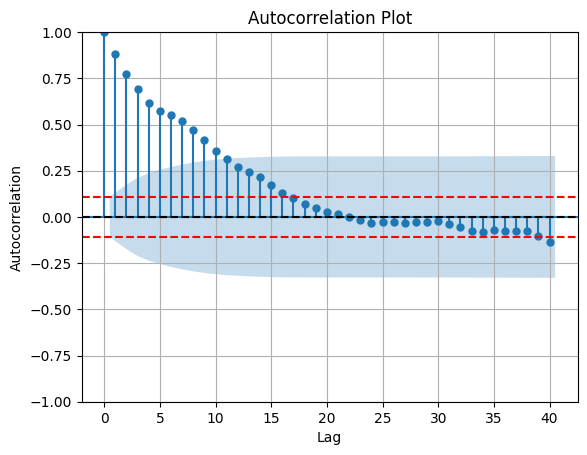

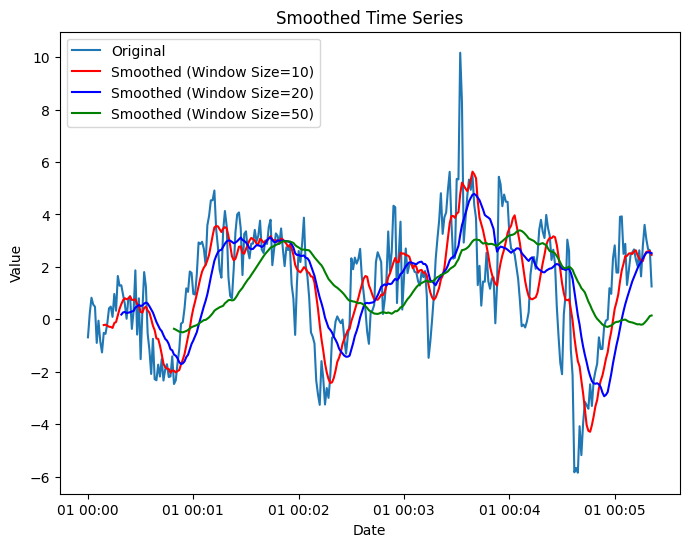

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df = df_acc2['X_acc']

# Plotting correlogram
plt.figure(figsize=(8, 6))
plot_acf(df, lags=40)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.axhline(y=-1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add upper confidence interval
plt.axhline(y=1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add lower confidence interval
plt.grid(True)
plt.show()



# Smooth the time series using a simple moving average
smoothed_series_1 = df.rolling(window=10).mean()
smoothed_series_2 = df.rolling(window=20).mean()
smoothed_series_3 = df.rolling(window=50).mean()

# Plot the original and smoothed time series
plt.figure(figsize=(8, 6))
plt.plot(df.index, df, label='Original')
plt.plot(df.index, smoothed_series_1, label=f'Smoothed (Window Size=10)', color='red')
plt.plot(df.index, smoothed_series_2, label=f'Smoothed (Window Size=20)', color='blue')
plt.plot(df.index, smoothed_series_3, label=f'Smoothed (Window Size=50)', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothed Time Series')
plt.legend()
plt.show()


H1 = U1S1V1(T)

function y = di_avg(H)

[win, num] = size(H);
y = zeros(num+win-1,1);

for i = 1:(win-1)
    y(i) = mean(H(i:(win-1):(win*(i-1)+1)));
end

for i = win:num
    y(i) = mean(H((i-win+1)*win:win-1:win*(i-1)+1));
end

for i = num+1:num+win-1
    y(i) = mean(H((i-win+1)*win:win-1:(win*num)));
end

end

If an autocorrelation value exceeds the shaded region, it suggests that the corresponding lagged observation is statistically significant and may contain meaningful information about the underlying process being analyzed.

If the p-value is below 0.05 at a certain lag, it suggests that the autocorrelation at that lag is statistically significant, indicating non-randomness in the data at that lag.

If the test statistic exceeds the critical value at a certain lag, it suggests that there is statistically significant autocorrelation in the time series at that lag. In other words, the observations at that lag are correlated with each other

<Figure size 800x600 with 0 Axes>

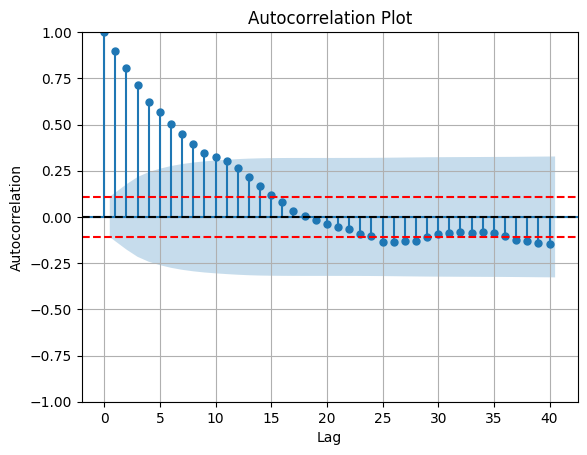

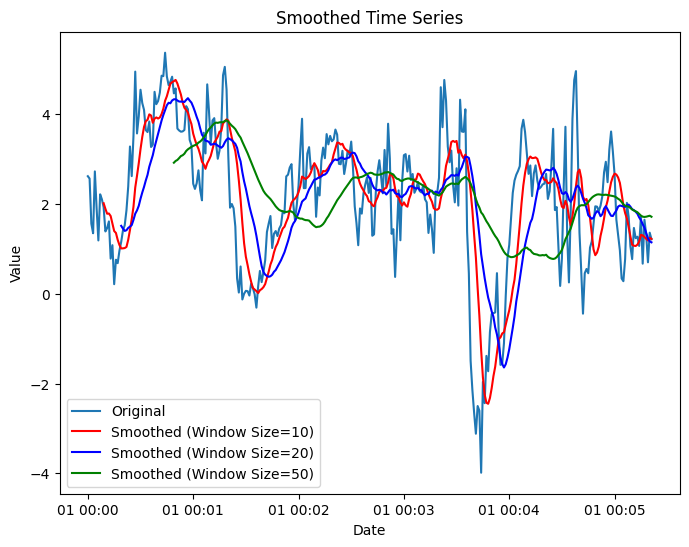

In [365]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df = df_acc2['Y_acc']

# Plotting correlogram
plt.figure(figsize=(8, 6))
plot_acf(df, lags=40)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.axhline(y=-1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add upper confidence interval
plt.axhline(y=1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add lower confidence interval
plt.grid(True)
plt.show()



# Smooth the time series using a simple moving average
smoothed_series_1 = df.rolling(window=10).mean()
smoothed_series_2 = df.rolling(window=20).mean()
smoothed_series_3 = df.rolling(window=50).mean()

# Plot the original and smoothed time series
plt.figure(figsize=(8, 6))
plt.plot(df.index, df, label='Original')
plt.plot(df.index, smoothed_series_1, label=f'Smoothed (Window Size=10)', color='red')
plt.plot(df.index, smoothed_series_2, label=f'Smoothed (Window Size=20)', color='blue')
plt.plot(df.index, smoothed_series_3, label=f'Smoothed (Window Size=50)', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothed Time Series')
plt.legend()
plt.show()


If the p-value is below 0.05 at a certain lag, it suggests that the autocorrelation at that lag is statistically significant, indicating non-randomness in the data at that lag.

Exponential Decay: In linear time series data, the autocorrelation tends to decrease exponentially as the lag increases. This indicates that past observations have less influence on the current observation as we move further back in time. The decay of the ACF towards zero suggests a linear relationship between the observations.

 the ACF plot often exhibits a clear pattern, such as a sinusoidal wave or dampened oscillations. This pattern indicates a systematic relationship between the observations at different lags.

<Figure size 800x600 with 0 Axes>

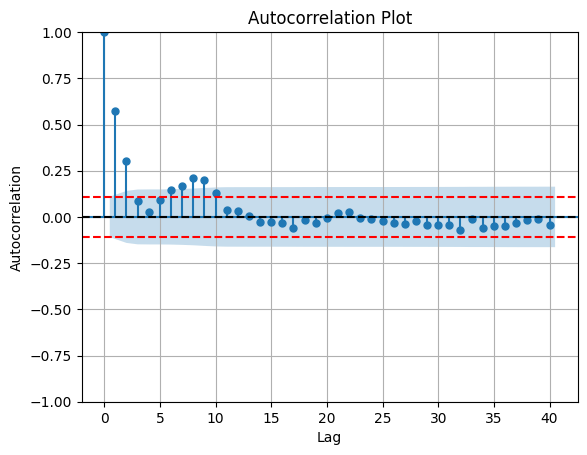

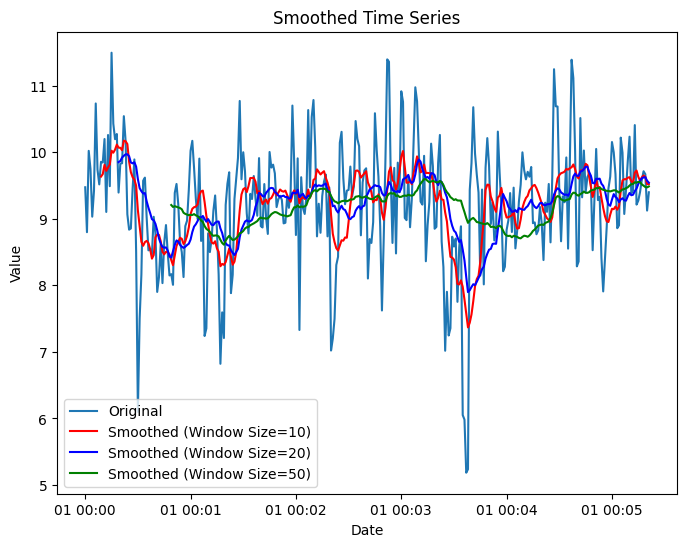

In [366]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df = df_acc2['Z_acc']

# Plotting correlogram
plt.figure(figsize=(8, 6))
plot_acf(df, lags=40)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.axhline(y=-1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add upper confidence interval
plt.axhline(y=1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add lower confidence interval
plt.grid(True)
plt.show()



# Smooth the time series using a simple moving average
smoothed_series_1 = df.rolling(window=10).mean()
smoothed_series_2 = df.rolling(window=20).mean()
smoothed_series_3 = df.rolling(window=50).mean()

# Plot the original and smoothed time series
plt.figure(figsize=(8, 6))
plt.plot(df.index, df, label='Original')
plt.plot(df.index, smoothed_series_1, label=f'Smoothed (Window Size=10)', color='red')
plt.plot(df.index, smoothed_series_2, label=f'Smoothed (Window Size=20)', color='blue')
plt.plot(df.index, smoothed_series_3, label=f'Smoothed (Window Size=50)', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothed Time Series')
plt.legend()
plt.show()


Instead of exponential decay, the ACF may show irregular fluctuations or oscillations that do not follow a simple pattern

If the test statistic exceeds the critical value at a certain lag, it suggests that there is statistically significant autocorrelation in the time series at that lag. In other words, the observations at that lag are correlated with each other

In [367]:
start_datetime = '2023-01-01 00:00:00'
df = pd.DataFrame()
df_acc2_daily = pd.DataFrame()
df = df_acc

# Define the number of rows in your DataFrame
num_rows = len(df)  # Replace df with the name of your DataFrame

# Create a new datetime range starting from the defined start datetime
new_datetime_range = pd.date_range(start=start_datetime, periods=num_rows, freq='D')

# Assign the new datetime range to a new column in your DataFrame and make it the index
df['new_datetime'] = new_datetime_range
df = df.set_index('new_datetime')

# Display the DataFrame
df_acc2_daily = df
df_acc2_daily

X_acc   Y_acc    Z_acc
new_datetime                         
2023-01-01   -0.6874  2.6145   9.4738
2023-01-02    0.2087  2.5612   8.7987
2023-01-03    0.8233  1.5580  10.0211
2023-01-04    0.5631  1.3448   9.7494
2023-01-05    0.4777  2.7216   9.0319
...              ...     ...      ...
2023-11-14    3.6033  1.6451   9.5844
2023-11-15    3.0548  1.3099   9.7145
2023-11-16    2.6740  0.6984   9.6688
2023-11-17    2.6341  1.3571   9.1235
2023-11-18    1.2539  1.2116   9.3984

[322 rows x 3 columns]

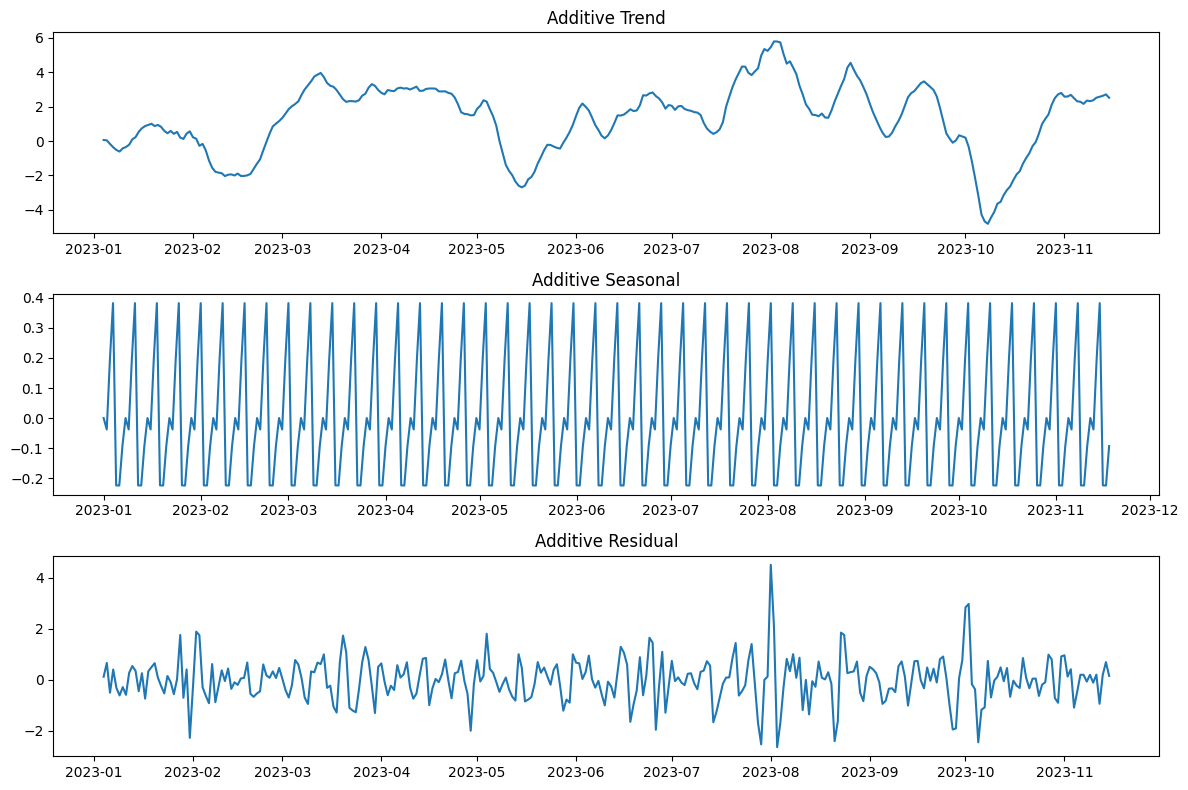

In [368]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming additive decomposition
result_additive = seasonal_decompose(df_acc2_daily['X_acc'], model='additive')

# Extracting additive components
trend_additive = result_additive.trend
seasonal_additive = result_additive.seasonal
residual_additive = result_additive.resid

# Plotting the additive components
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(trend_additive)
plt.title('Additive Trend')

plt.subplot(3, 1, 2)
plt.plot(seasonal_additive)
plt.title('Additive Seasonal')

plt.subplot(3, 1, 3)
plt.plot(residual_additive)
plt.title('Additive Residual')

plt.tight_layout()
plt.show()

# print(trend_additive.mean())
# print(trend_additive.std())

# print(trend_additive)

# # Assuming multiplicative decomposition
# result_multiplicative = seasonal_decompose(df_acc2_daily['X_acc'], model='multiplicative')

# # Extracting multiplicative components
# trend_multiplicative = result_multiplicative.trend
# seasonal_multiplicative = result_multiplicative.seasonal
# residual_multiplicative = result_multiplicative.resid

# # Plotting the multiplicative components
# plt.figure(figsize=(12, 8))
# plt.subplot(3, 1, 1)
# plt.plot(trend_multiplicative)
# plt.title('Multiplicative Trend')

# plt.subplot(3, 1, 2)
# plt.plot(seasonal_multiplicative)
# plt.title('Multiplicative Seasonal')

# plt.subplot(3, 1, 3)
# plt.plot(residual_multiplicative)
# plt.title('Multiplicative Residual')

# plt.tight_layout()
# plt.show()


multiplicative decomposition may not be appropriate because it involves multiplication of the seasonal component with the trend and residuals. Zero or negative values in the time series can lead to issues such as undefined or unexpected behavior when performing multiplicative decomposition.

Additive decomposition involves adding the seasonal component to the trend and residuals, which is more suitable for data containing zero or negative values.

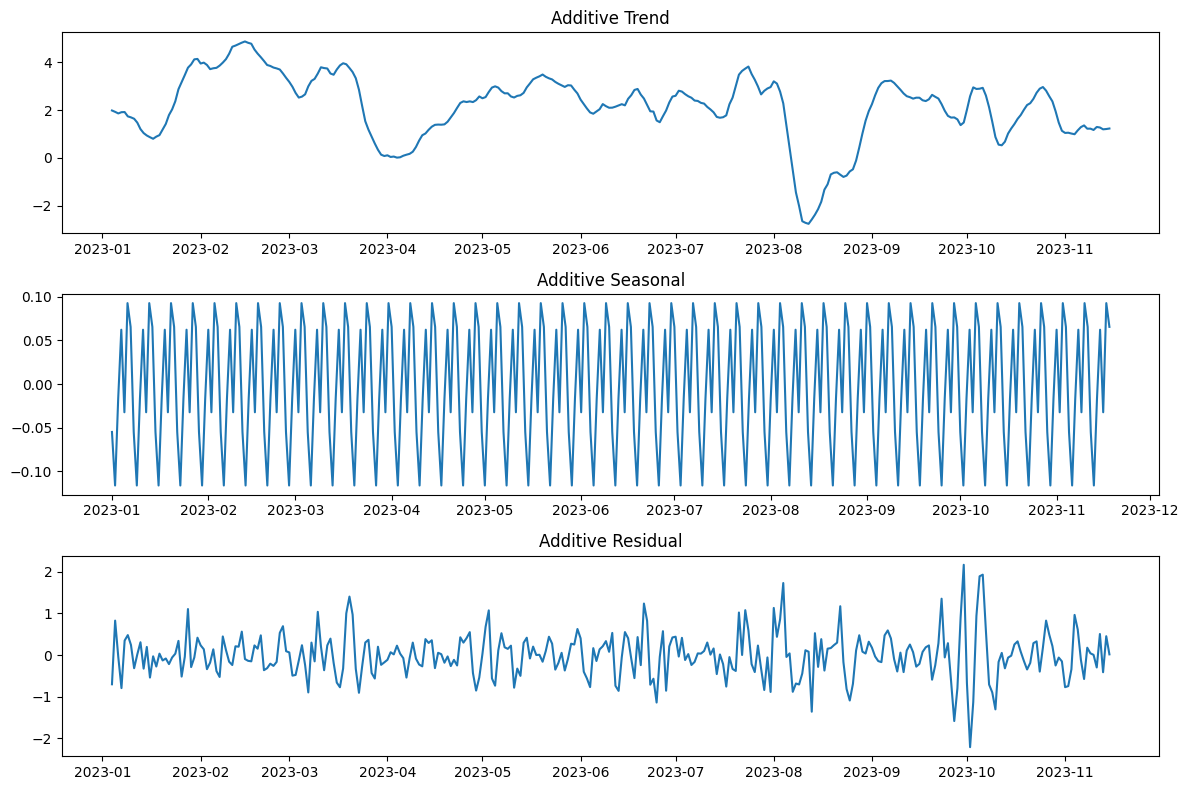

In [369]:
result_additive = seasonal_decompose(df_acc2_daily['Y_acc'], model='additive')

# Extracting additive components
trend_additive = result_additive.trend
seasonal_additive = result_additive.seasonal
residual_additive = result_additive.resid

# Plotting the additive components
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(trend_additive)
plt.title('Additive Trend')

plt.subplot(3, 1, 2)
plt.plot(seasonal_additive)
plt.title('Additive Seasonal')

plt.subplot(3, 1, 3)
plt.plot(residual_additive)
plt.title('Additive Residual')

plt.tight_layout()
plt.show()

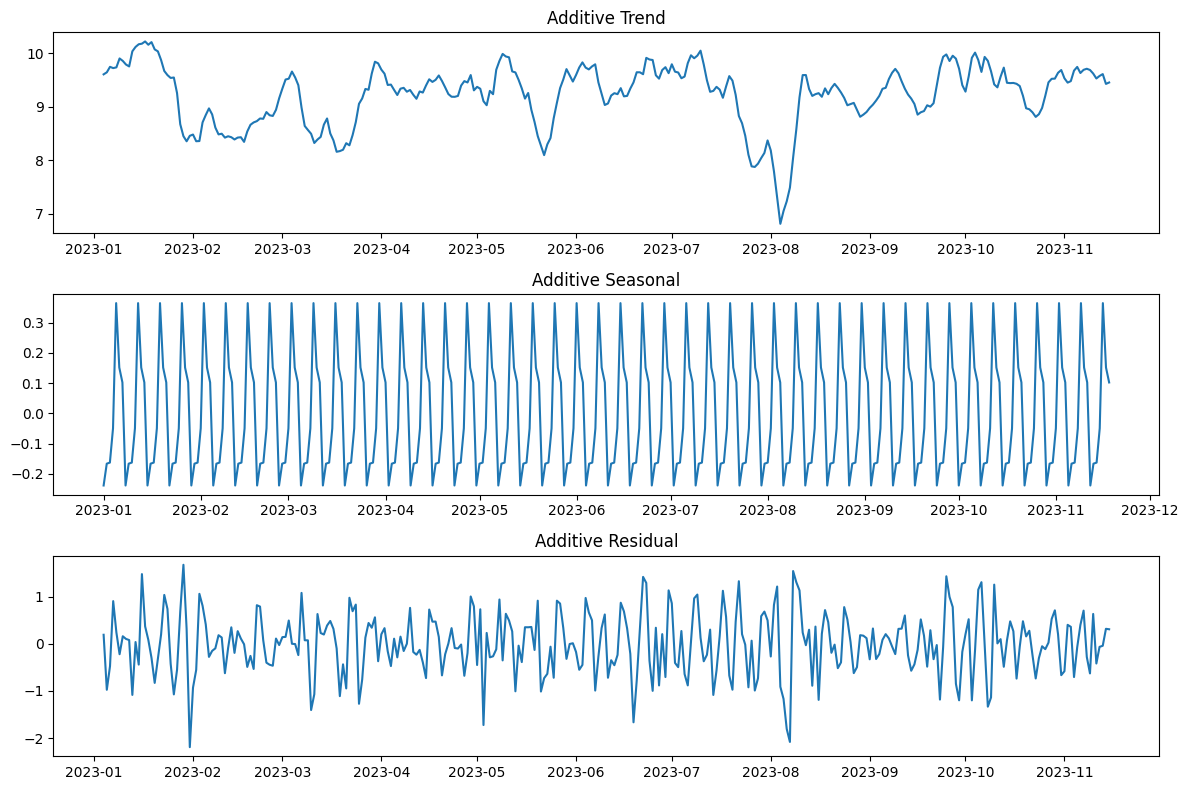

In [370]:
result_additive = seasonal_decompose(df_acc2_daily['Z_acc'], model='additive')

# Extracting additive components
trend_additive = result_additive.trend
seasonal_additive = result_additive.seasonal
residual_additive = result_additive.resid

# Plotting the additive components
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(trend_additive)
plt.title('Additive Trend')

plt.subplot(3, 1, 2)
plt.plot(seasonal_additive)
plt.title('Additive Seasonal')

plt.subplot(3, 1, 3)
plt.plot(residual_additive)
plt.title('Additive Residual')

plt.tight_layout()
plt.show()

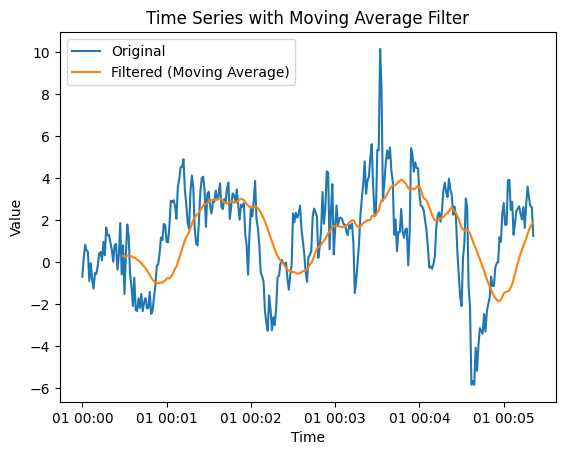

In [371]:
df = df_acc2['X_acc']
window_size = 30
filtered_data = df.rolling(window=window_size).mean()

# Plot original and filtered data
plt.plot(df, label='Original')
plt.plot(filtered_data, label='Filtered (Moving Average)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series with Moving Average Filter')
plt.show()

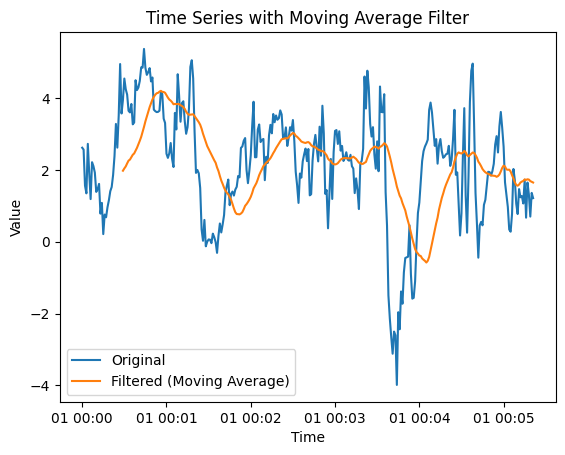

In [372]:
df = df_acc2['Y_acc']
window_size = 30
filtered_data = df.rolling(window=window_size).mean()

# Plot original and filtered data
plt.plot(df, label='Original')
plt.plot(filtered_data, label='Filtered (Moving Average)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series with Moving Average Filter')
plt.show()

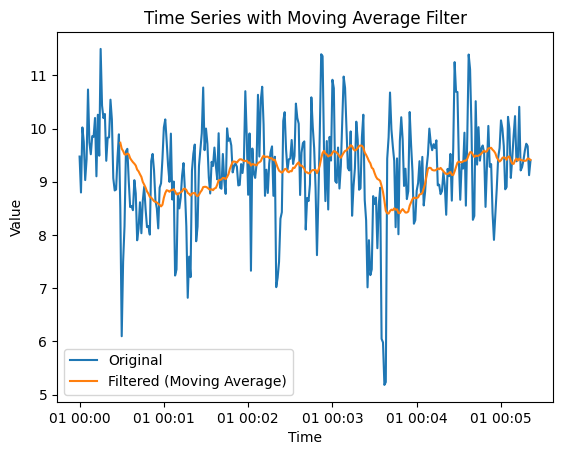

In [373]:
df = df_acc2['Z_acc']
window_size = 30
filtered_data = df.rolling(window=window_size).mean()

# Plot original and filtered data
plt.plot(df, label='Original')
plt.plot(filtered_data, label='Filtered (Moving Average)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series with Moving Average Filter')
plt.show()

<Figure size 1000x500 with 0 Axes>

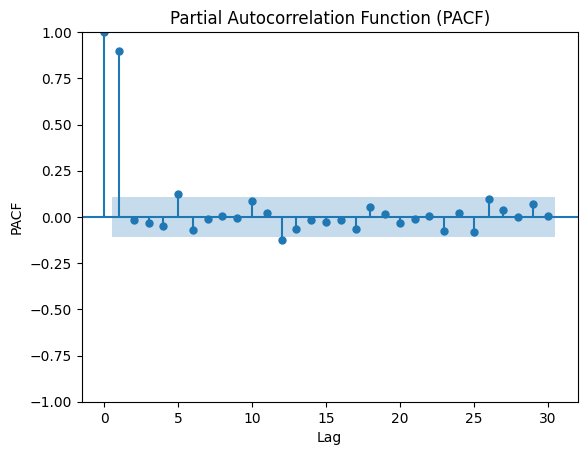

In [374]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF
plt.figure(figsize=(10, 5))
plot_pacf(df_acc2['Y_acc'], lags=30, title='Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()


In [375]:
start_datetime = '2023-01-01 00:00:00'
df = pd.DataFrame()
df_ang2_daily = pd.DataFrame()
df = df_ang

# Define the number of rows in your DataFrame
num_rows = len(df)  # Replace df with the name of your DataFrame

# Create a new datetime range starting from the defined start datetime
new_datetime_range = pd.date_range(start=start_datetime, periods=num_rows, freq='D')

# Assign the new datetime range to a new column in your DataFrame and make it the index
df['new_datetime'] = new_datetime_range
df = df.set_index('new_datetime')

# Display the DataFrame
df_ang2_daily = df
df_ang2_daily

X_ang   Y_ang   Z_ang
new_datetime                        
2023-01-01   -0.5279 -0.1800  0.4034
2023-01-02    0.3128 -0.2669  0.4420
2023-01-03   -0.0512  0.5064  0.6726
2023-01-04    0.3059  0.3728  0.6971
2023-01-05   -0.0193  0.3177  0.3420
...              ...     ...     ...
2023-11-14    0.2479  0.2777  0.4971
2023-11-15    0.1368  0.6773  0.3501
2023-11-16    0.1950  0.3027 -0.0093
2023-11-17   -0.3173  0.0388 -0.1107
2023-11-18   -0.5273 -0.2670 -0.1533

[322 rows x 3 columns]

<Figure size 800x600 with 0 Axes>

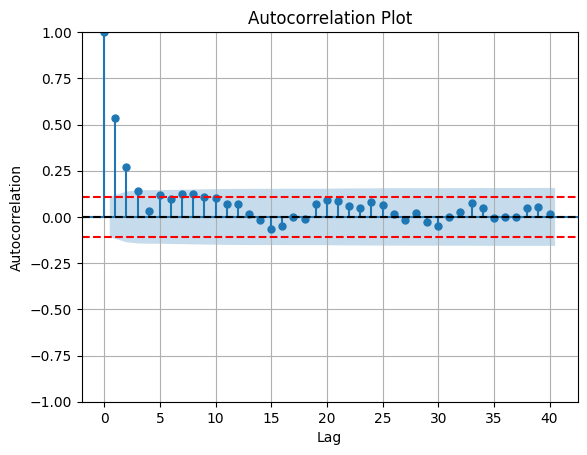

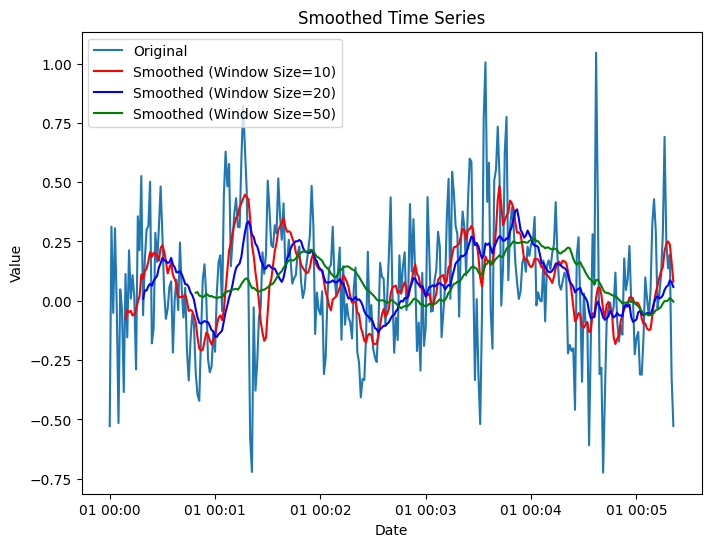

In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df = df_ang2['X_ang']

# Plotting correlogram
plt.figure(figsize=(8, 6))
plot_acf(df, lags=40)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.axhline(y=-1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add upper confidence interval
plt.axhline(y=1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add lower confidence interval
plt.grid(True)
plt.show()



# Smooth the time series using a simple moving average
smoothed_series_1 = df.rolling(window=10).mean()
smoothed_series_2 = df.rolling(window=20).mean()
smoothed_series_3 = df.rolling(window=50).mean()

# Plot the original and smoothed time series
plt.figure(figsize=(8, 6))
plt.plot(df.index, df, label='Original')
plt.plot(df.index, smoothed_series_1, label=f'Smoothed (Window Size=10)', color='red')
plt.plot(df.index, smoothed_series_2, label=f'Smoothed (Window Size=20)', color='blue')
plt.plot(df.index, smoothed_series_3, label=f'Smoothed (Window Size=50)', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothed Time Series')
plt.legend()
plt.show()


<Figure size 800x600 with 0 Axes>

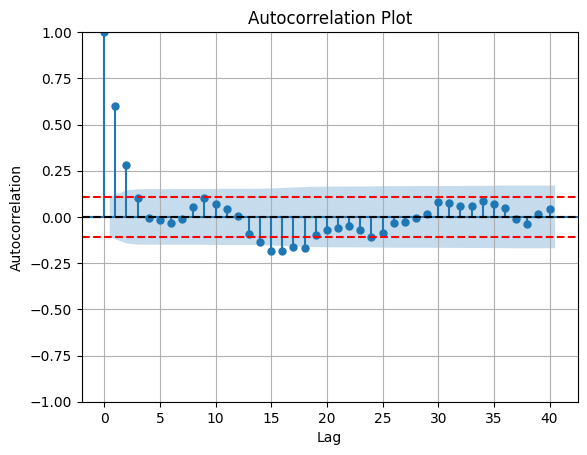

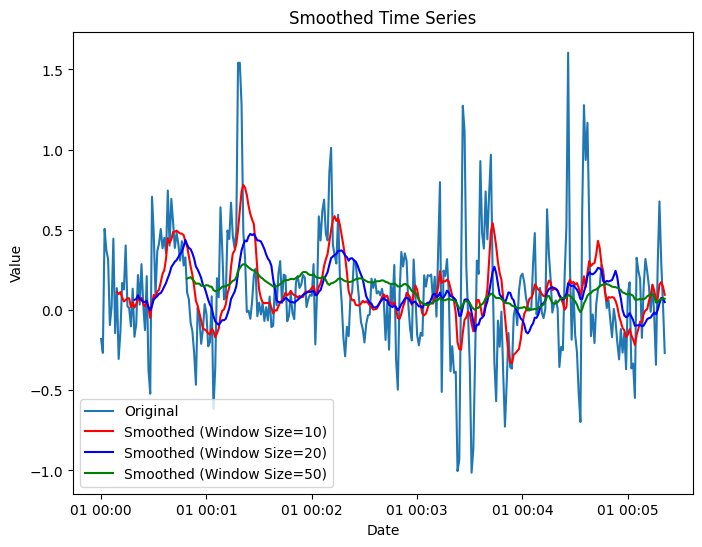

In [377]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df = df_ang2['Y_ang']

# Plotting correlogram
plt.figure(figsize=(8, 6))
plot_acf(df, lags=40)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.axhline(y=-1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add upper confidence interval
plt.axhline(y=1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add lower confidence interval
plt.grid(True)
plt.show()



# Smooth the time series using a simple moving average
smoothed_series_1 = df.rolling(window=10).mean()
smoothed_series_2 = df.rolling(window=20).mean()
smoothed_series_3 = df.rolling(window=50).mean()

# Plot the original and smoothed time series
plt.figure(figsize=(8, 6))
plt.plot(df.index, df, label='Original')
plt.plot(df.index, smoothed_series_1, label=f'Smoothed (Window Size=10)', color='red')
plt.plot(df.index, smoothed_series_2, label=f'Smoothed (Window Size=20)', color='blue')
plt.plot(df.index, smoothed_series_3, label=f'Smoothed (Window Size=50)', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothed Time Series')
plt.legend()
plt.show()


<Figure size 800x600 with 0 Axes>

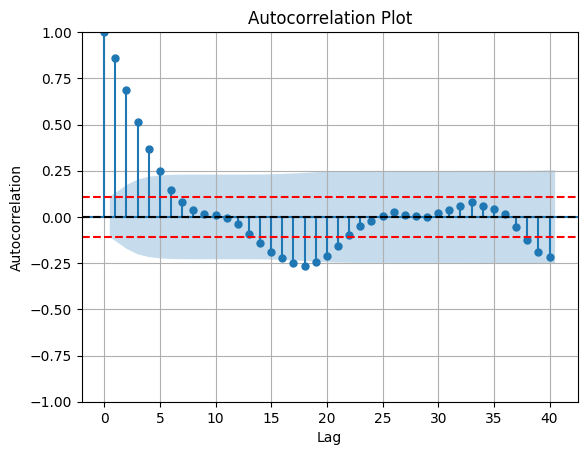

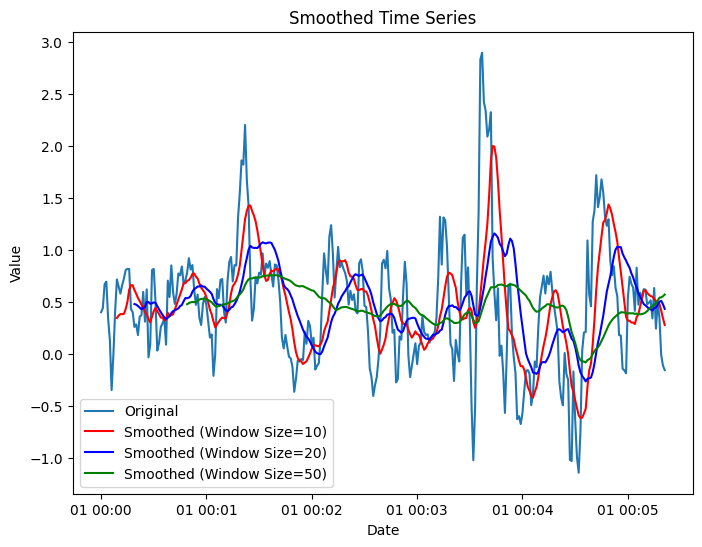

In [378]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df = df_ang2['Z_ang']

# Plotting correlogram
plt.figure(figsize=(8, 6))
plot_acf(df, lags=40)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.axhline(y=-1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add upper confidence interval
plt.axhline(y=1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add lower confidence interval
plt.grid(True)
plt.show()



# Smooth the time series using a simple moving average
smoothed_series_1 = df.rolling(window=10).mean()
smoothed_series_2 = df.rolling(window=20).mean()
smoothed_series_3 = df.rolling(window=50).mean()

# Plot the original and smoothed time series
plt.figure(figsize=(8, 6))
plt.plot(df.index, df, label='Original')
plt.plot(df.index, smoothed_series_1, label=f'Smoothed (Window Size=10)', color='red')
plt.plot(df.index, smoothed_series_2, label=f'Smoothed (Window Size=20)', color='blue')
plt.plot(df.index, smoothed_series_3, label=f'Smoothed (Window Size=50)', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothed Time Series')
plt.legend()
plt.show()


<Figure size 800x600 with 0 Axes>

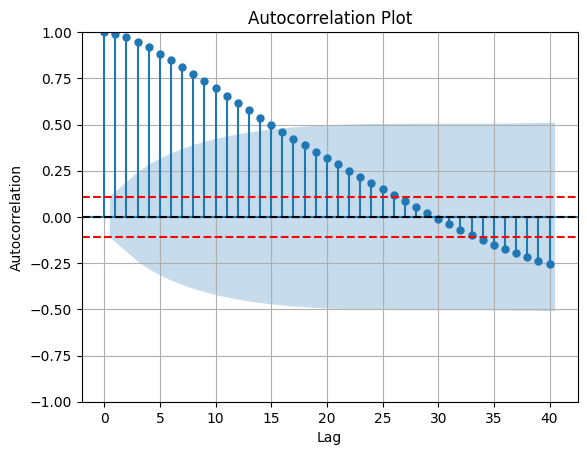

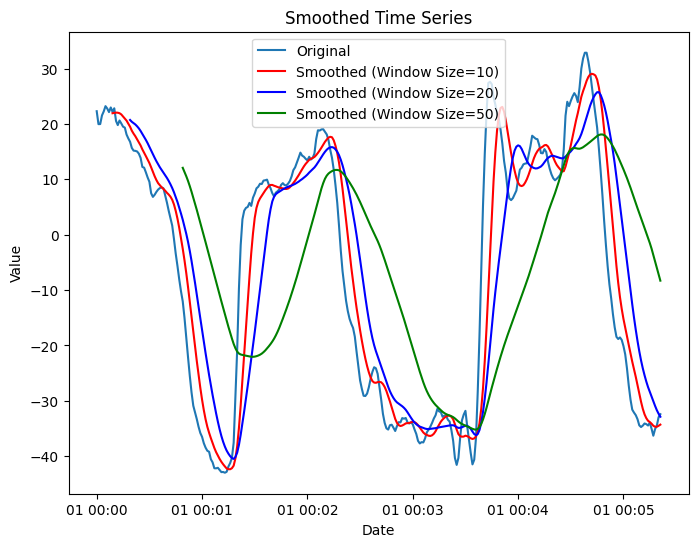

In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df = df_mag2['X_mag']

# Plotting correlogram
plt.figure(figsize=(8, 6))
plot_acf(df, lags=40)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.axhline(y=-1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add upper confidence interval
plt.axhline(y=1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add lower confidence interval
plt.grid(True)
plt.show()



# Smooth the time series using a simple moving average
smoothed_series_1 = df.rolling(window=10).mean()
smoothed_series_2 = df.rolling(window=20).mean()
smoothed_series_3 = df.rolling(window=50).mean()

# Plot the original and smoothed time series
plt.figure(figsize=(8, 6))
plt.plot(df.index, df, label='Original')
plt.plot(df.index, smoothed_series_1, label=f'Smoothed (Window Size=10)', color='red')
plt.plot(df.index, smoothed_series_2, label=f'Smoothed (Window Size=20)', color='blue')
plt.plot(df.index, smoothed_series_3, label=f'Smoothed (Window Size=50)', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothed Time Series')
plt.legend()
plt.show()


<Figure size 800x600 with 0 Axes>

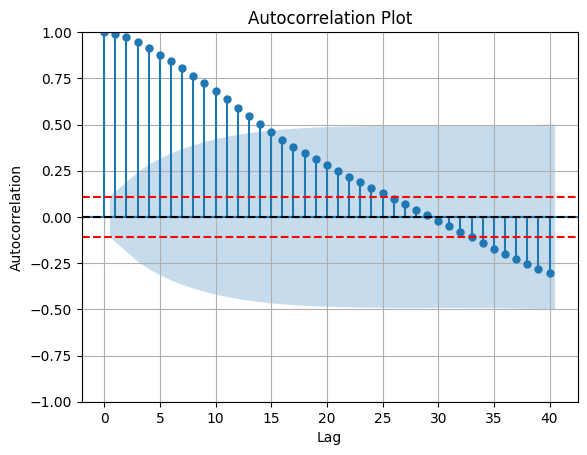

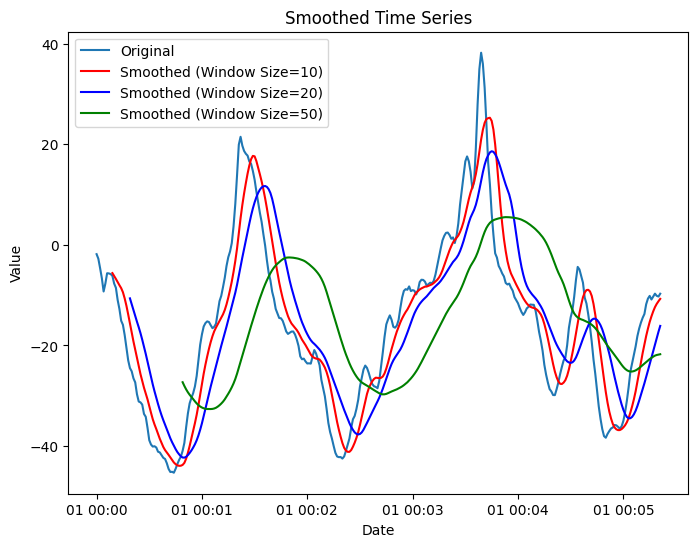

In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df = df_mag2['Y_mag']

# Plotting correlogram
plt.figure(figsize=(8, 6))
plot_acf(df, lags=40)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.axhline(y=-1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add upper confidence interval
plt.axhline(y=1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add lower confidence interval
plt.grid(True)
plt.show()



# Smooth the time series using a simple moving average
smoothed_series_1 = df.rolling(window=10).mean()
smoothed_series_2 = df.rolling(window=20).mean()
smoothed_series_3 = df.rolling(window=50).mean()

# Plot the original and smoothed time series
plt.figure(figsize=(8, 6))
plt.plot(df.index, df, label='Original')
plt.plot(df.index, smoothed_series_1, label=f'Smoothed (Window Size=10)', color='red')
plt.plot(df.index, smoothed_series_2, label=f'Smoothed (Window Size=20)', color='blue')
plt.plot(df.index, smoothed_series_3, label=f'Smoothed (Window Size=50)', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothed Time Series')
plt.legend()
plt.show()


<Figure size 800x600 with 0 Axes>

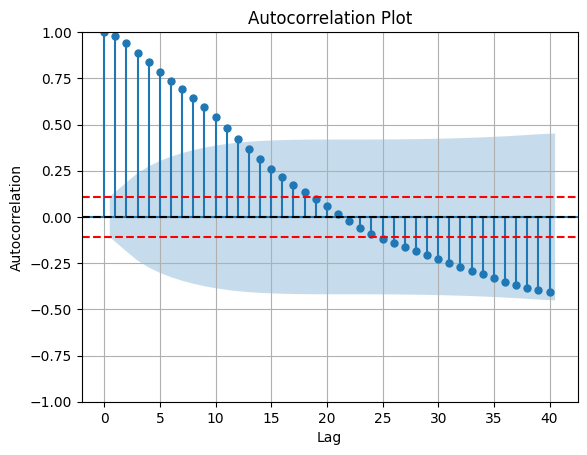

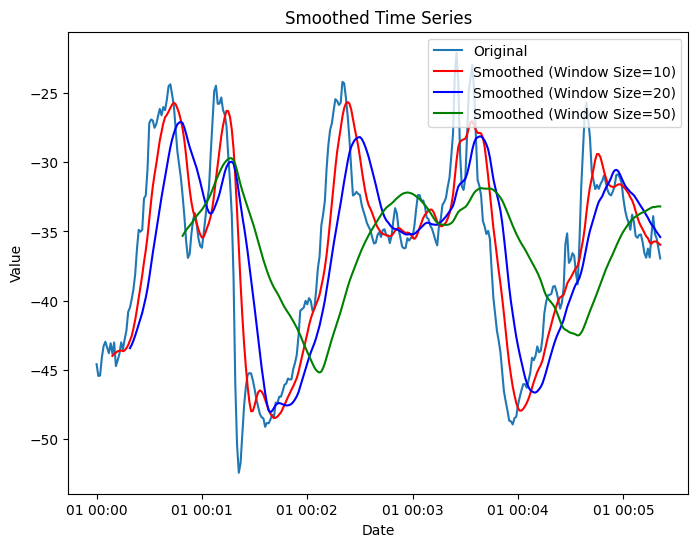

In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df = df_mag2['Z_mag']

# Plotting correlogram
plt.figure(figsize=(8, 6))
plot_acf(df, lags=40)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.axhline(y=-1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add upper confidence interval
plt.axhline(y=1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add lower confidence interval
plt.grid(True)
plt.show()



# Smooth the time series using a simple moving average
smoothed_series_1 = df.rolling(window=10).mean()
smoothed_series_2 = df.rolling(window=20).mean()
smoothed_series_3 = df.rolling(window=50).mean()

# Plot the original and smoothed time series
plt.figure(figsize=(8, 6))
plt.plot(df.index, df, label='Original')
plt.plot(df.index, smoothed_series_1, label=f'Smoothed (Window Size=10)', color='red')
plt.plot(df.index, smoothed_series_2, label=f'Smoothed (Window Size=20)', color='blue')
plt.plot(df.index, smoothed_series_3, label=f'Smoothed (Window Size=50)', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothed Time Series')
plt.legend()
plt.show()


<Figure size 800x600 with 0 Axes>

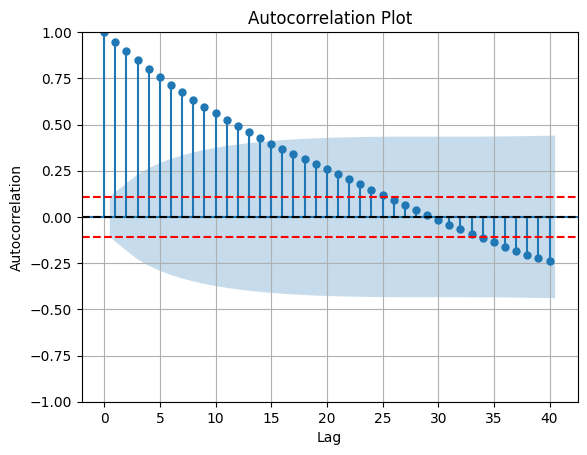

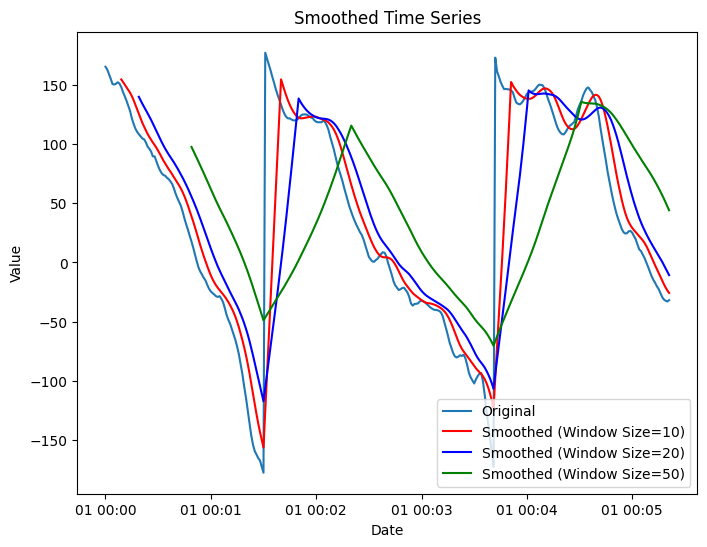

In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df = df_ori2['X_ori']

# Plotting correlogram
plt.figure(figsize=(8, 6))
plot_acf(df, lags=40)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.axhline(y=-1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add upper confidence interval
plt.axhline(y=1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add lower confidence interval
plt.grid(True)
plt.show()



# Smooth the time series using a simple moving average
smoothed_series_1 = df.rolling(window=10).mean()
smoothed_series_2 = df.rolling(window=20).mean()
smoothed_series_3 = df.rolling(window=50).mean()

# Plot the original and smoothed time series
plt.figure(figsize=(8, 6))
plt.plot(df.index, df, label='Original')
plt.plot(df.index, smoothed_series_1, label=f'Smoothed (Window Size=10)', color='red')
plt.plot(df.index, smoothed_series_2, label=f'Smoothed (Window Size=20)', color='blue')
plt.plot(df.index, smoothed_series_3, label=f'Smoothed (Window Size=50)', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothed Time Series')
plt.legend()
plt.show()


<Figure size 800x600 with 0 Axes>

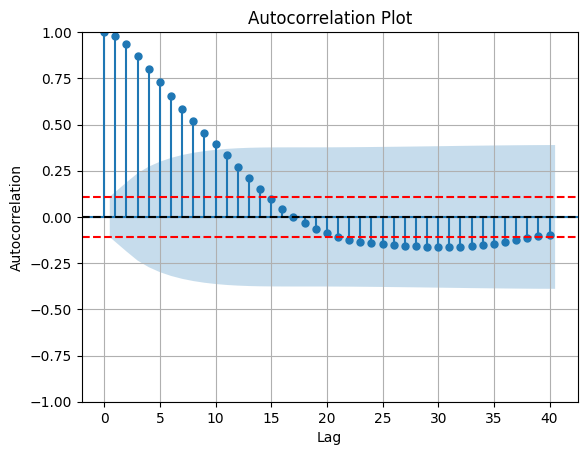

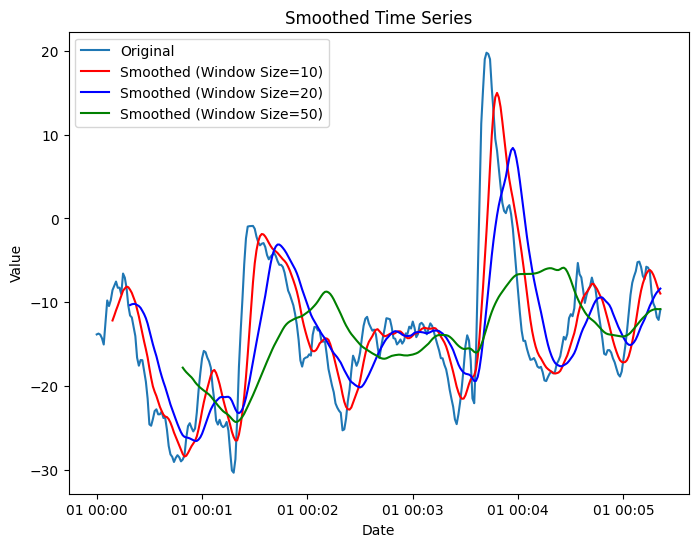

In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df = df_ori2['Y_ori']

# Plotting correlogram
plt.figure(figsize=(8, 6))
plot_acf(df, lags=40)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.axhline(y=-1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add upper confidence interval
plt.axhline(y=1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add lower confidence interval
plt.grid(True)
plt.show()



# Smooth the time series using a simple moving average
smoothed_series_1 = df.rolling(window=10).mean()
smoothed_series_2 = df.rolling(window=20).mean()
smoothed_series_3 = df.rolling(window=50).mean()

# Plot the original and smoothed time series
plt.figure(figsize=(8, 6))
plt.plot(df.index, df, label='Original')
plt.plot(df.index, smoothed_series_1, label=f'Smoothed (Window Size=10)', color='red')
plt.plot(df.index, smoothed_series_2, label=f'Smoothed (Window Size=20)', color='blue')
plt.plot(df.index, smoothed_series_3, label=f'Smoothed (Window Size=50)', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothed Time Series')
plt.legend()
plt.show()


<Figure size 800x600 with 0 Axes>

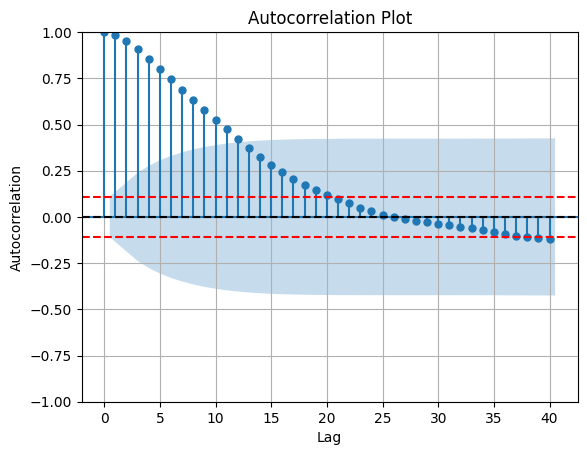

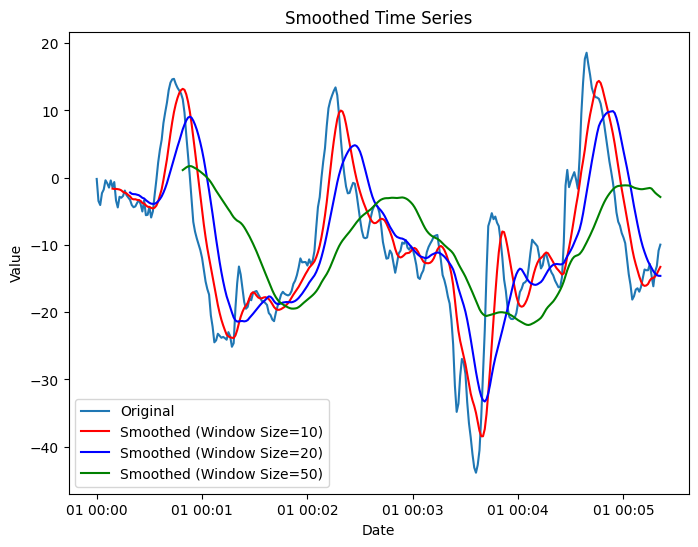

In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df = df_ori2['Z_ori']

# Plotting correlogram
plt.figure(figsize=(8, 6))
plot_acf(df, lags=40)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.axhline(y=-1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add upper confidence interval
plt.axhline(y=1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add lower confidence interval
plt.grid(True)
plt.show()



# Smooth the time series using a simple moving average
smoothed_series_1 = df.rolling(window=10).mean()
smoothed_series_2 = df.rolling(window=20).mean()
smoothed_series_3 = df.rolling(window=50).mean()

# Plot the original and smoothed time series
plt.figure(figsize=(8, 6))
plt.plot(df.index, df, label='Original')
plt.plot(df.index, smoothed_series_1, label=f'Smoothed (Window Size=10)', color='red')
plt.plot(df.index, smoothed_series_2, label=f'Smoothed (Window Size=20)', color='blue')
plt.plot(df.index, smoothed_series_3, label=f'Smoothed (Window Size=50)', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothed Time Series')
plt.legend()
plt.show()


In [385]:
df_pos.columns

Index(['latitude_pos', 'longitude_pos', 'altitude_pos', 'speed_pos',
       'course_pos', 'hacc_pos'],
      dtype='object')

<Figure size 800x600 with 0 Axes>

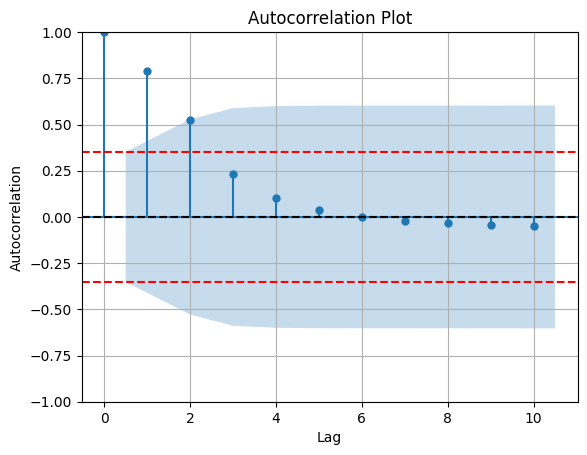

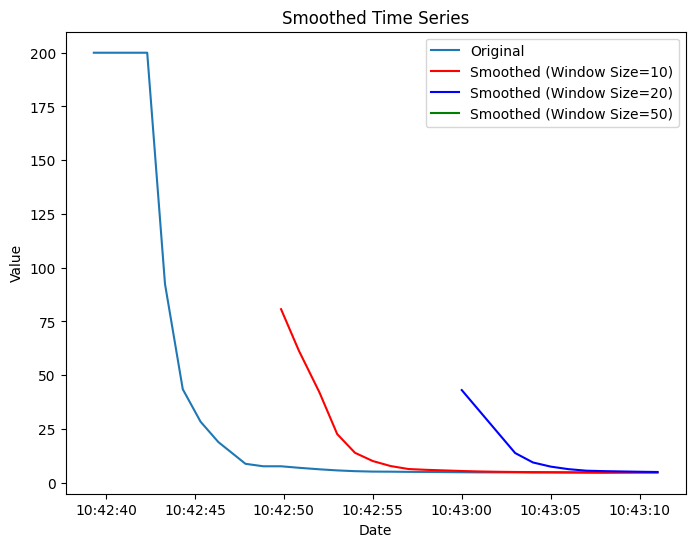

In [386]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df = df_pos['hacc_pos']

# Plotting correlogram
plt.figure(figsize=(8, 6))
plot_acf(df, lags=10)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.axhline(y=-1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add upper confidence interval
plt.axhline(y=1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add lower confidence interval
plt.grid(True)
plt.show()



# Smooth the time series using a simple moving average
smoothed_series_1 = df.rolling(window=10).mean()
smoothed_series_2 = df.rolling(window=20).mean()
smoothed_series_3 = df.rolling(window=50).mean()

# Plot the original and smoothed time series
plt.figure(figsize=(8, 6))
plt.plot(df.index, df, label='Original')
plt.plot(df.index, smoothed_series_1, label=f'Smoothed (Window Size=10)', color='red')
plt.plot(df.index, smoothed_series_2, label=f'Smoothed (Window Size=20)', color='blue')
plt.plot(df.index, smoothed_series_3, label=f'Smoothed (Window Size=50)', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothed Time Series')
plt.legend()
plt.show()


<Figure size 800x600 with 0 Axes>

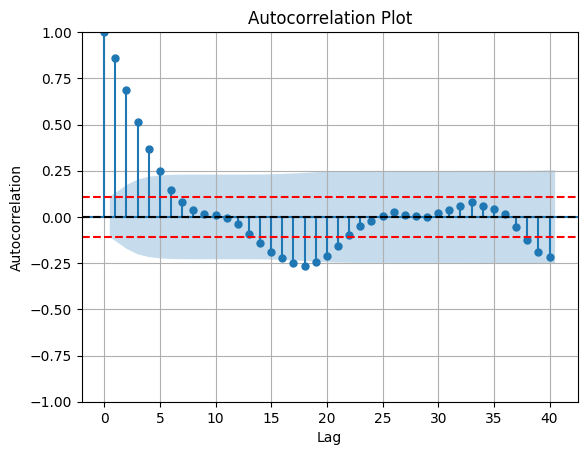

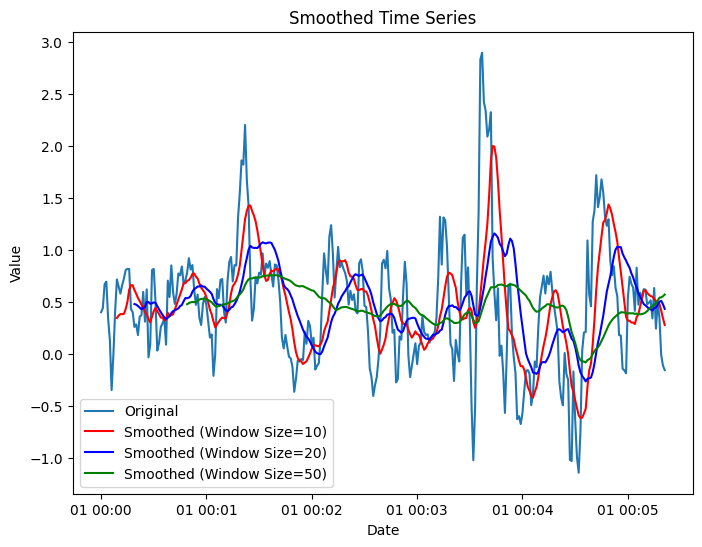

In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df = df_ang2['Z_ang']

# Plotting correlogram
plt.figure(figsize=(8, 6))
plot_acf(df, lags=40)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.axhline(y=-1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add upper confidence interval
plt.axhline(y=1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add lower confidence interval
plt.grid(True)
plt.show()



# Smooth the time series using a simple moving average
smoothed_series_1 = df.rolling(window=10).mean()
smoothed_series_2 = df.rolling(window=20).mean()
smoothed_series_3 = df.rolling(window=50).mean()

# Plot the original and smoothed time series
plt.figure(figsize=(8, 6))
plt.plot(df.index, df, label='Original')
plt.plot(df.index, smoothed_series_1, label=f'Smoothed (Window Size=10)', color='red')
plt.plot(df.index, smoothed_series_2, label=f'Smoothed (Window Size=20)', color='blue')
plt.plot(df.index, smoothed_series_3, label=f'Smoothed (Window Size=50)', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothed Time Series')
plt.legend()
plt.show()


### Seasonal Decompose

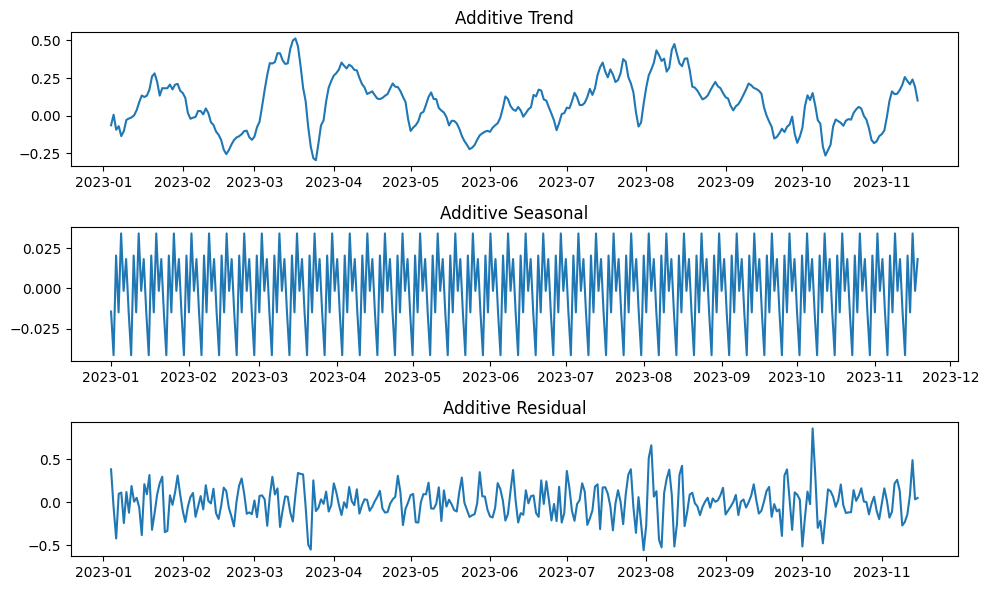

In [388]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming additive decomposition
result_additive = seasonal_decompose(df_ang2_daily['X_ang'], model='additive')

# Extracting additive components
trend_additive = result_additive.trend
seasonal_additive = result_additive.seasonal
residual_additive = result_additive.resid

# Plotting the additive components
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(trend_additive)
plt.title('Additive Trend')

plt.subplot(3, 1, 2)
plt.plot(seasonal_additive)
plt.title('Additive Seasonal')

plt.subplot(3, 1, 3)
plt.plot(residual_additive)
plt.title('Additive Residual')

plt.tight_layout()
plt.show()

# print(trend_additive.mean())
# print(trend_additive.std())

# print(trend_additive)

# # Assuming multiplicative decomposition
# result_multiplicative = seasonal_decompose(df_acc2_daily['X_acc'], model='multiplicative')

# # Extracting multiplicative components
# trend_multiplicative = result_multiplicative.trend
# seasonal_multiplicative = result_multiplicative.seasonal
# residual_multiplicative = result_multiplicative.resid

# # Plotting the multiplicative components
# plt.figure(figsize=(12, 8))
# plt.subplot(3, 1, 1)
# plt.plot(trend_multiplicative)
# plt.title('Multiplicative Trend')

# plt.subplot(3, 1, 2)
# plt.plot(seasonal_multiplicative)
# plt.title('Multiplicative Seasonal')

# plt.subplot(3, 1, 3)
# plt.plot(residual_multiplicative)
# plt.title('Multiplicative Residual')

# plt.tight_layout()
# plt.show()


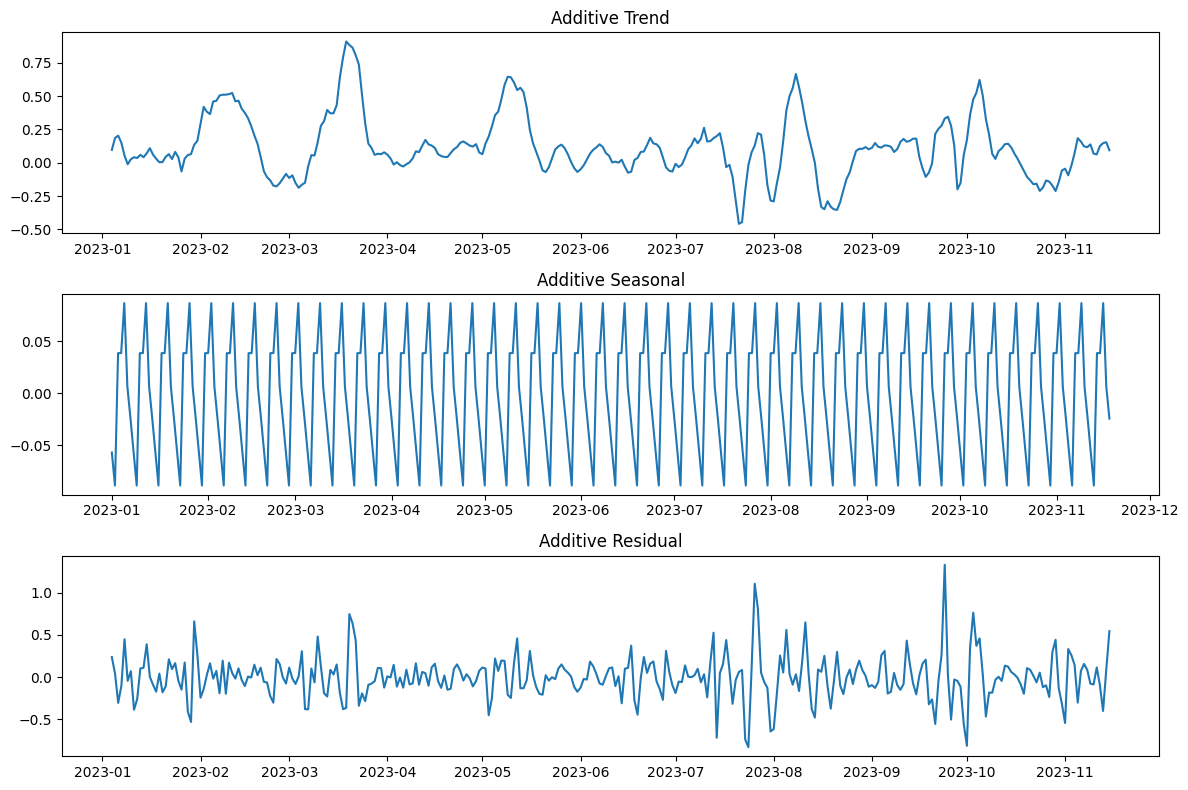

In [389]:
result_additive = seasonal_decompose(df_ang2_daily['Y_ang'], model='additive')

# Extracting additive components
trend_additive = result_additive.trend
seasonal_additive = result_additive.seasonal
residual_additive = result_additive.resid

# Plotting the additive components
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(trend_additive)
plt.title('Additive Trend')

plt.subplot(3, 1, 2)
plt.plot(seasonal_additive)
plt.title('Additive Seasonal')

plt.subplot(3, 1, 3)
plt.plot(residual_additive)
plt.title('Additive Residual')

plt.tight_layout()
plt.show()

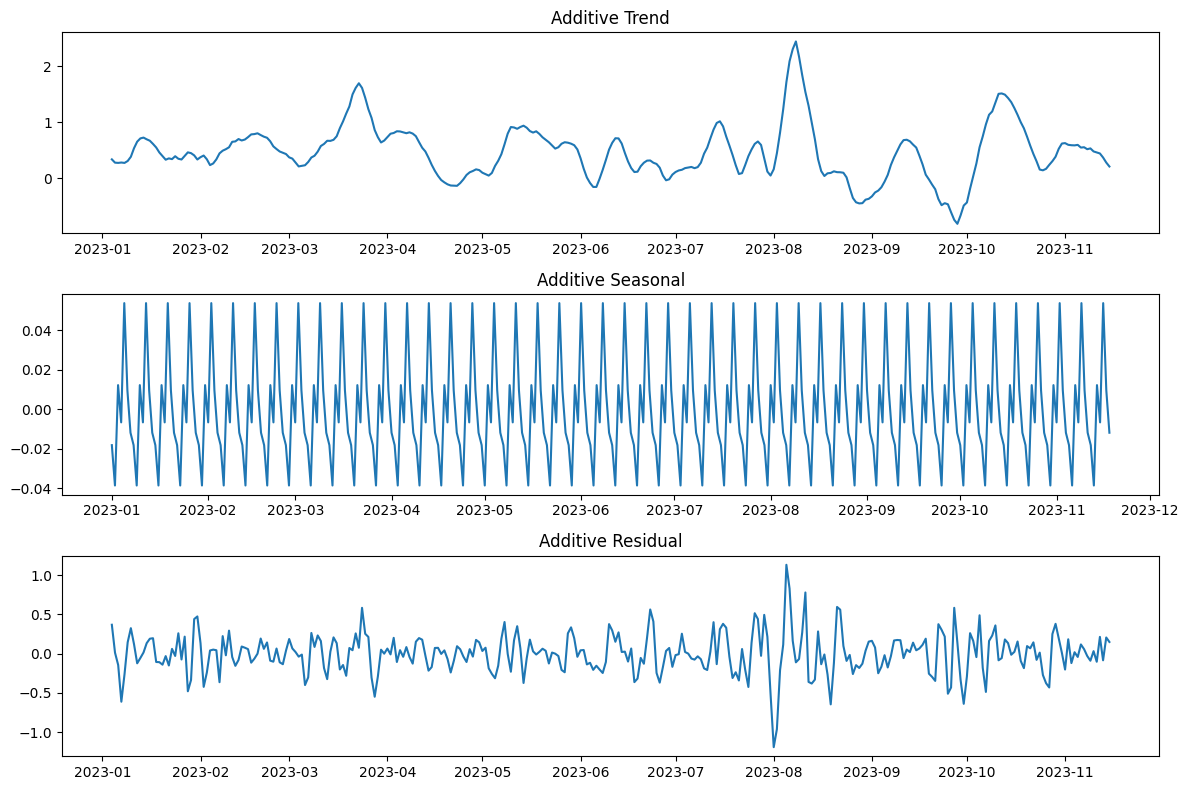

In [390]:
result_additive = seasonal_decompose(df_ang2_daily['Z_ang'], model='additive')

# Extracting additive components
trend_additive = result_additive.trend
seasonal_additive = result_additive.seasonal
residual_additive = result_additive.resid

# Plotting the additive components
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(trend_additive)
plt.title('Additive Trend')

plt.subplot(3, 1, 2)
plt.plot(seasonal_additive)
plt.title('Additive Seasonal')

plt.subplot(3, 1, 3)
plt.plot(residual_additive)
plt.title('Additive Residual')

plt.tight_layout()
plt.show()

In [391]:
start_datetime = '2023-01-01 00:00:00'
df = pd.DataFrame()
df_mag2_daily = pd.DataFrame()
df = df_mag

# Define the number of rows in your DataFrame
num_rows = len(df)  # Replace df with the name of your DataFrame

# Create a new datetime range starting from the defined start datetime
new_datetime_range = pd.date_range(start=start_datetime, periods=num_rows, freq='D')

# Assign the new datetime range to a new column in your DataFrame and make it the index
df['new_datetime'] = new_datetime_range
df = df.set_index('new_datetime')

# Display the DataFrame
df_mag2_daily = df
df_mag2_daily

X_mag    Y_mag    Z_mag
new_datetime                           
2023-01-01    22.3031  -1.8409 -44.6038
2023-01-02    19.9651  -2.7399 -45.4534
2023-01-03    19.9828  -4.6182 -45.4229
2023-01-04    21.5404  -6.6315 -44.1276
2023-01-05    22.2615  -9.2683 -43.2922
...               ...      ...      ...
2023-11-14   -36.2915 -10.2757 -33.8978
2023-11-15   -35.0919  -9.6974 -35.1897
2023-11-16   -34.4656 -10.1306 -35.5245
2023-11-17   -32.9532 -10.2687 -36.2263
2023-11-18   -32.4070  -9.7076 -36.9565

[322 rows x 3 columns]

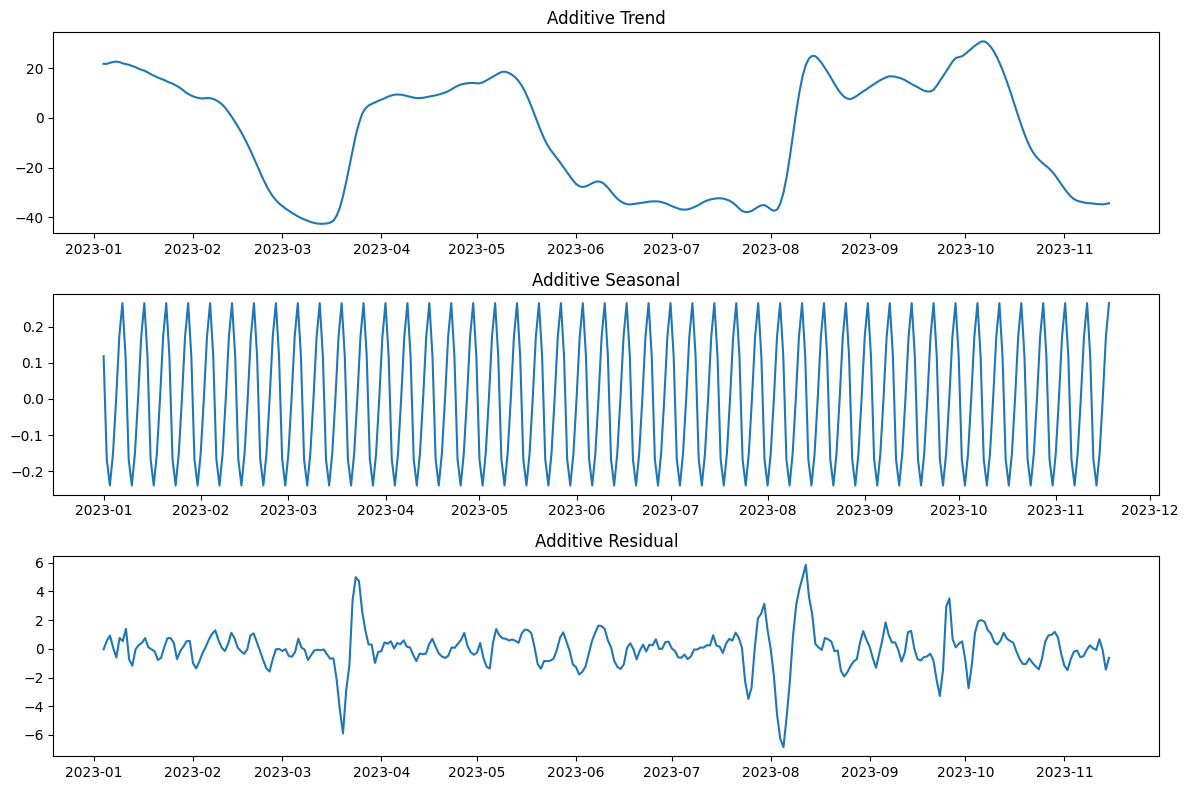

In [392]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming additive decomposition
result_additive = seasonal_decompose(df_mag2_daily['X_mag'], model='additive')

# Extracting additive components
trend_additive = result_additive.trend
seasonal_additive = result_additive.seasonal
residual_additive = result_additive.resid

# Plotting the additive components
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(trend_additive)
plt.title('Additive Trend')

plt.subplot(3, 1, 2)
plt.plot(seasonal_additive)
plt.title('Additive Seasonal')

plt.subplot(3, 1, 3)
plt.plot(residual_additive)
plt.title('Additive Residual')

plt.tight_layout()
plt.show()

# print(trend_additive.mean())
# print(trend_additive.std())

# print(trend_additive)

# # Assuming multiplicative decomposition
# result_multiplicative = seasonal_decompose(df_acc2_daily['X_acc'], model='multiplicative')

# # Extracting multiplicative components
# trend_multiplicative = result_multiplicative.trend
# seasonal_multiplicative = result_multiplicative.seasonal
# residual_multiplicative = result_multiplicative.resid

# # Plotting the multiplicative components
# plt.figure(figsize=(12, 8))
# plt.subplot(3, 1, 1)
# plt.plot(trend_multiplicative)
# plt.title('Multiplicative Trend')

# plt.subplot(3, 1, 2)
# plt.plot(seasonal_multiplicative)
# plt.title('Multiplicative Seasonal')

# plt.subplot(3, 1, 3)
# plt.plot(residual_multiplicative)
# plt.title('Multiplicative Residual')

# plt.tight_layout()
# plt.show()


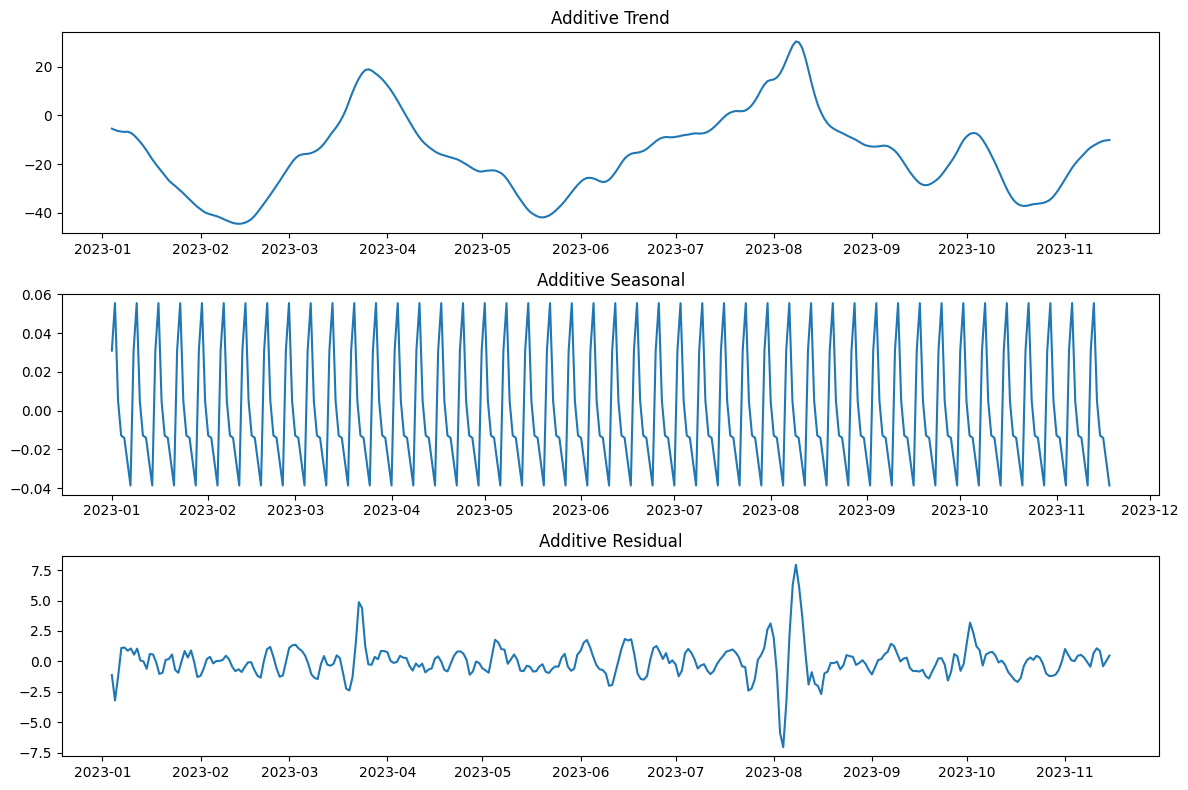

In [393]:
result_additive = seasonal_decompose(df_mag2_daily['Y_mag'], model='additive')

# Extracting additive components
trend_additive = result_additive.trend
seasonal_additive = result_additive.seasonal
residual_additive = result_additive.resid

# Plotting the additive components
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(trend_additive)
plt.title('Additive Trend')

plt.subplot(3, 1, 2)
plt.plot(seasonal_additive)
plt.title('Additive Seasonal')

plt.subplot(3, 1, 3)
plt.plot(residual_additive)
plt.title('Additive Residual')

plt.tight_layout()
plt.show()

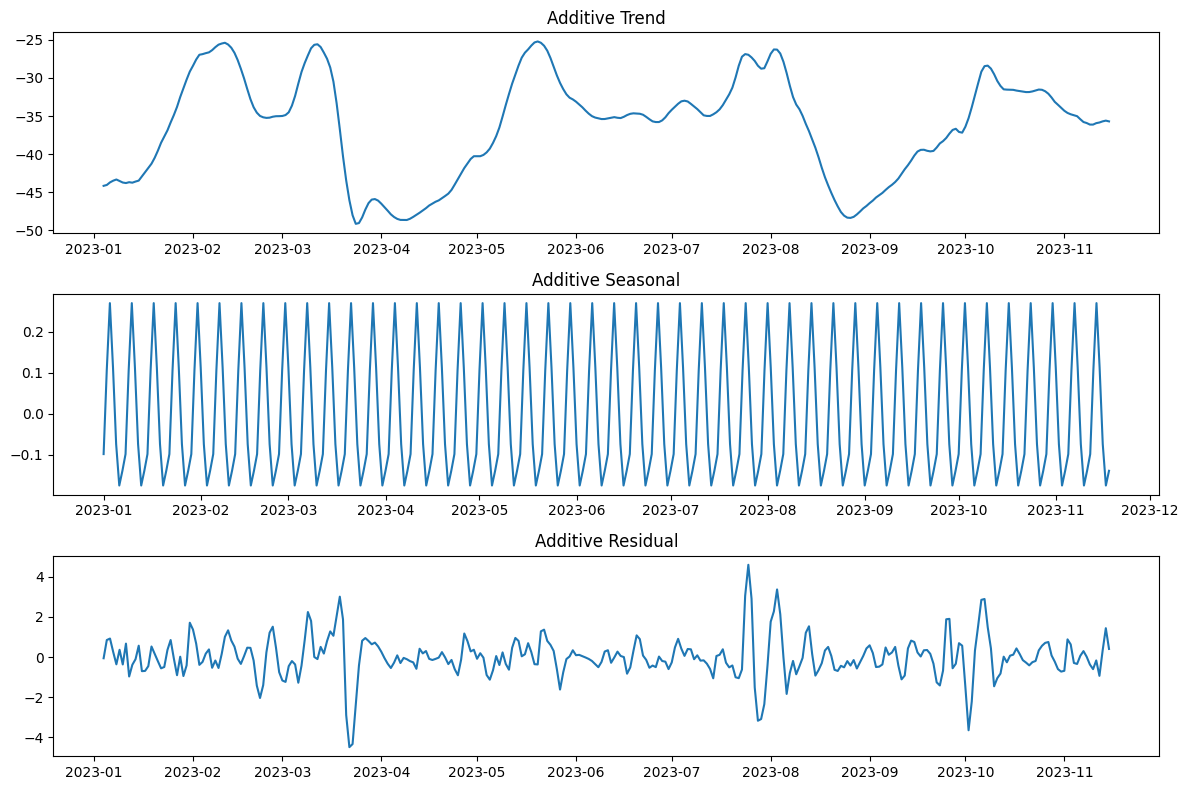

In [394]:
result_additive = seasonal_decompose(df_mag2_daily['Z_mag'], model='additive')

# Extracting additive components
trend_additive = result_additive.trend
seasonal_additive = result_additive.seasonal
residual_additive = result_additive.resid

# Plotting the additive components
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(trend_additive)
plt.title('Additive Trend')

plt.subplot(3, 1, 2)
plt.plot(seasonal_additive)
plt.title('Additive Seasonal')

plt.subplot(3, 1, 3)
plt.plot(residual_additive)
plt.title('Additive Residual')

plt.tight_layout()
plt.show()

In [395]:
start_datetime = '2023-01-01 00:00:00'
df = pd.DataFrame()
df_ori2_daily = pd.DataFrame()
df = df_ori

# Define the number of rows in your DataFrame
num_rows = len(df)  # Replace df with the name of your DataFrame

# Create a new datetime range starting from the defined start datetime
new_datetime_range = pd.date_range(start=start_datetime, periods=num_rows, freq='D')

# Assign the new datetime range to a new column in your DataFrame and make it the index
df['new_datetime'] = new_datetime_range
df = df.set_index('new_datetime')

# Display the DataFrame
df_ori2_daily = df
df_ori2_daily

X_ori    Y_ori    Z_ori
new_datetime                            
2023-01-01    165.4113 -13.8250  -0.1837
2023-01-02    163.0280 -13.7230  -3.4601
2023-01-03    159.1013 -13.8454  -4.0659
2023-01-04    155.1935 -14.2814  -2.2925
2023-01-05    150.7567 -15.0293  -1.7628
...                ...      ...      ...
2023-11-14    -29.0623 -10.1138 -16.1437
2023-11-15    -31.3345 -10.6084 -13.9858
2023-11-16    -32.3649 -11.7613 -13.1533
2023-11-17    -33.0348 -12.0978 -10.8372
2023-11-18    -31.9219 -10.8686  -9.9516

[322 rows x 3 columns]

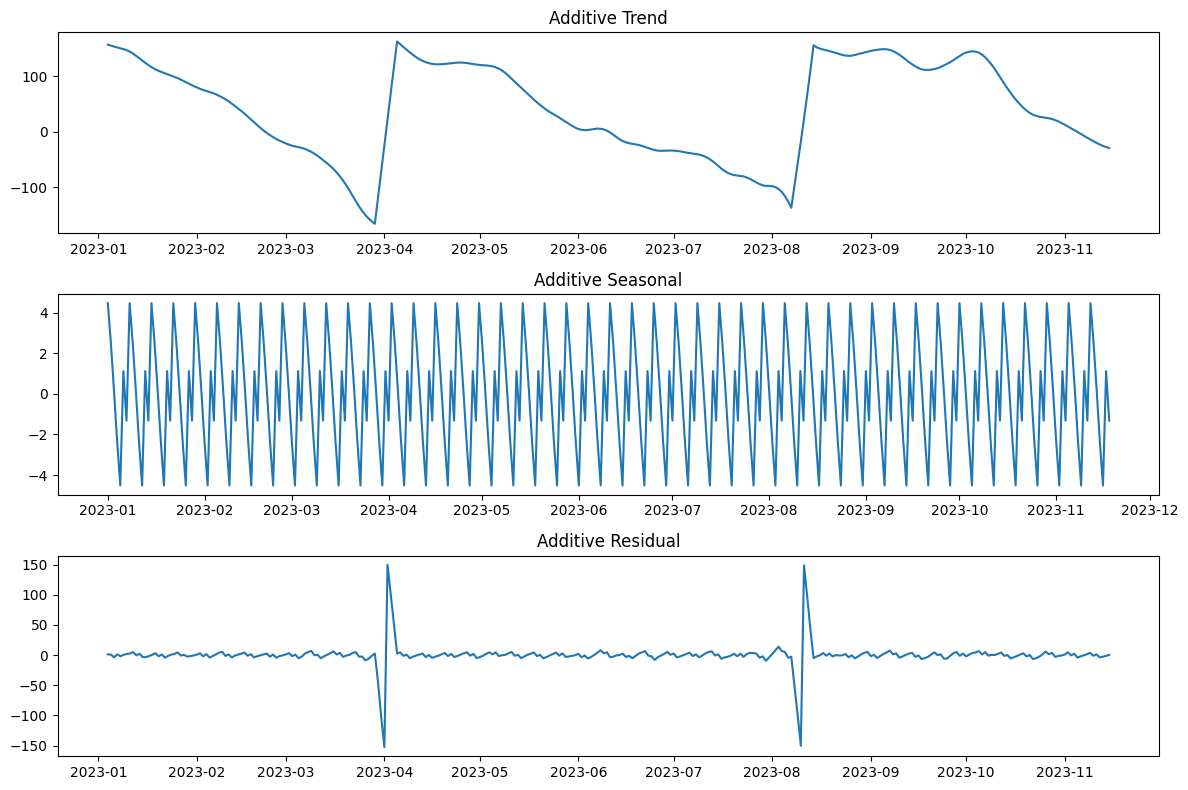

In [396]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming additive decomposition
result_additive = seasonal_decompose(df_ori2_daily['X_ori'], model='additive')

# Extracting additive components
trend_additive = result_additive.trend
seasonal_additive = result_additive.seasonal
residual_additive = result_additive.resid

# Plotting the additive components
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(trend_additive)
plt.title('Additive Trend')

plt.subplot(3, 1, 2)
plt.plot(seasonal_additive)
plt.title('Additive Seasonal')

plt.subplot(3, 1, 3)
plt.plot(residual_additive)
plt.title('Additive Residual')

plt.tight_layout()
plt.show()

# print(trend_additive.mean())
# print(trend_additive.std())

# print(trend_additive)

# # Assuming multiplicative decomposition
# result_multiplicative = seasonal_decompose(df_acc2_daily['X_acc'], model='multiplicative')

# # Extracting multiplicative components
# trend_multiplicative = result_multiplicative.trend
# seasonal_multiplicative = result_multiplicative.seasonal
# residual_multiplicative = result_multiplicative.resid

# # Plotting the multiplicative components
# plt.figure(figsize=(12, 8))
# plt.subplot(3, 1, 1)
# plt.plot(trend_multiplicative)
# plt.title('Multiplicative Trend')

# plt.subplot(3, 1, 2)
# plt.plot(seasonal_multiplicative)
# plt.title('Multiplicative Seasonal')

# plt.subplot(3, 1, 3)
# plt.plot(residual_multiplicative)
# plt.title('Multiplicative Residual')

# plt.tight_layout()
# plt.show()


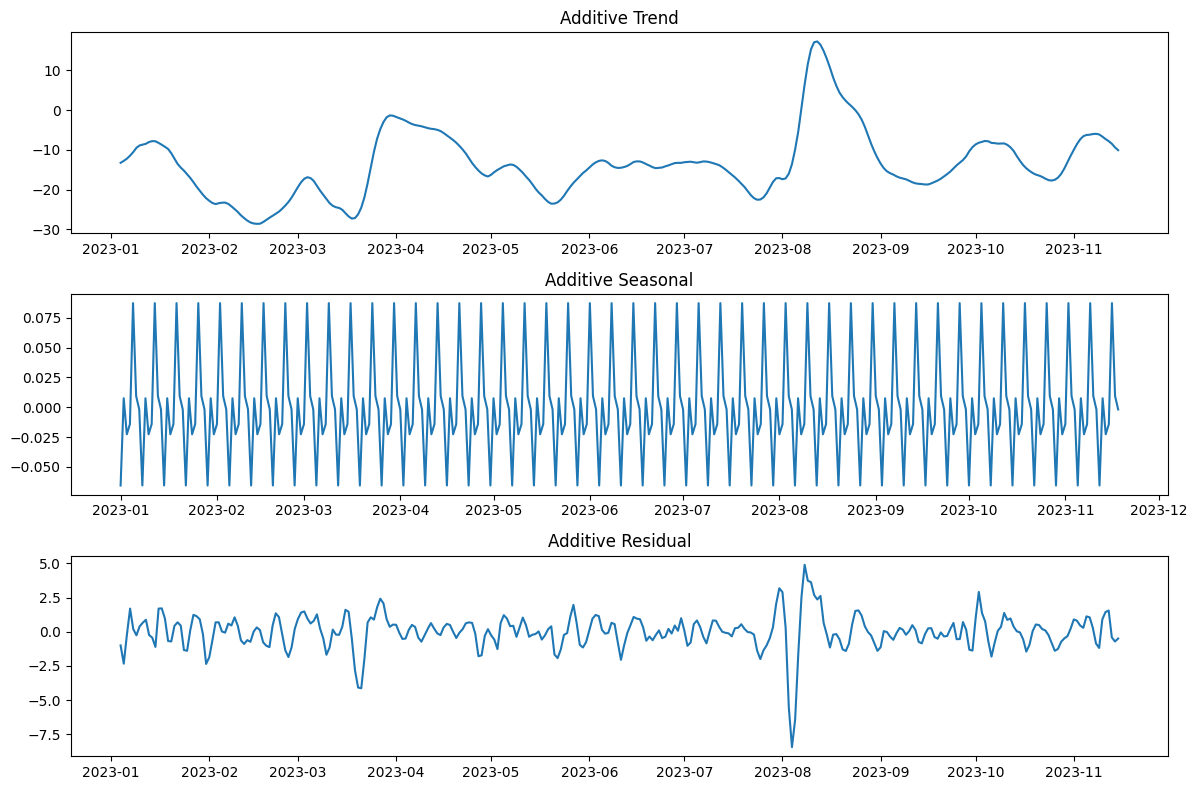

In [397]:
result_additive = seasonal_decompose(df_ori2_daily['Y_ori'], model='additive')

# Extracting additive components
trend_additive = result_additive.trend
seasonal_additive = result_additive.seasonal
residual_additive = result_additive.resid

# Plotting the additive components
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(trend_additive)
plt.title('Additive Trend')

plt.subplot(3, 1, 2)
plt.plot(seasonal_additive)
plt.title('Additive Seasonal')

plt.subplot(3, 1, 3)
plt.plot(residual_additive)
plt.title('Additive Residual')

plt.tight_layout()
plt.show()

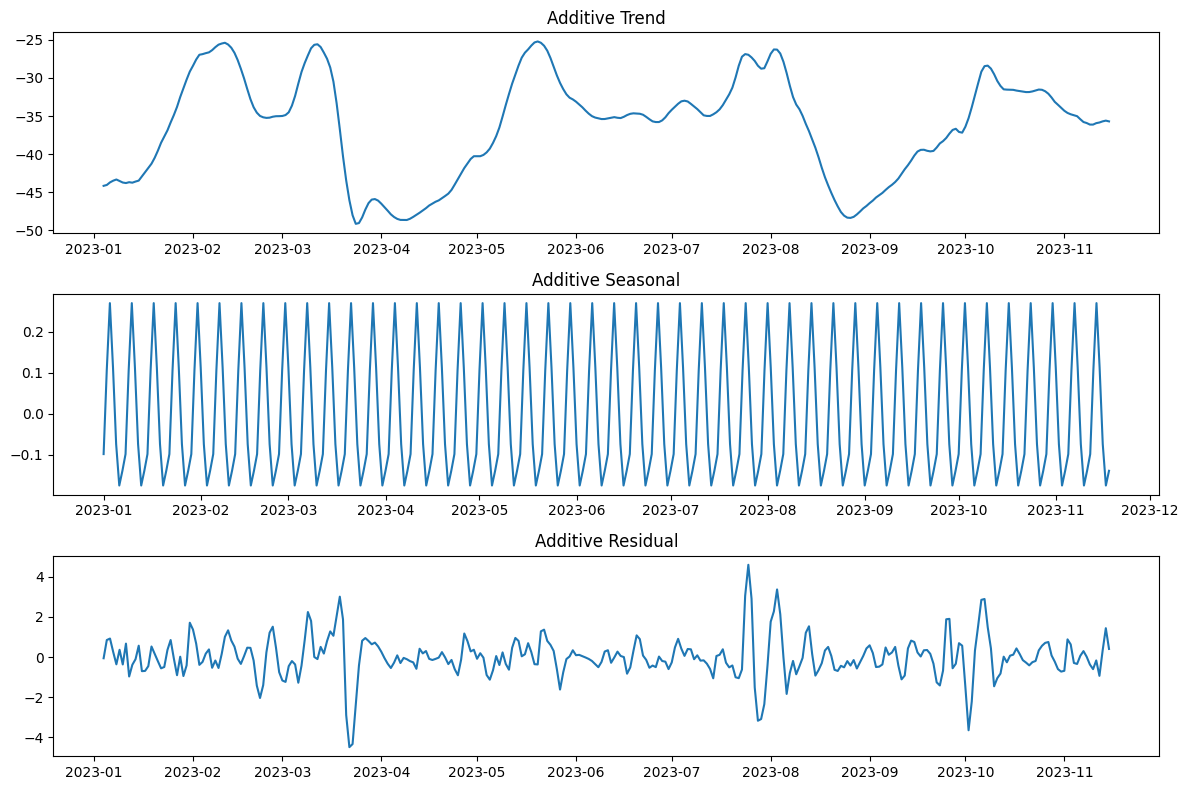

In [398]:
result_additive = seasonal_decompose(df_mag2_daily['Z_mag'], model='additive')

# Extracting additive components
trend_additive = result_additive.trend
seasonal_additive = result_additive.seasonal
residual_additive = result_additive.resid

# Plotting the additive components
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(trend_additive)
plt.title('Additive Trend')

plt.subplot(3, 1, 2)
plt.plot(seasonal_additive)
plt.title('Additive Seasonal')

plt.subplot(3, 1, 3)
plt.plot(residual_additive)
plt.title('Additive Residual')

plt.tight_layout()
plt.show()

In [399]:
df_combined

Timestamp_acc   X_acc   Y_acc    Z_acc  \
0     08-Aug-2023 10:42:39.090 -0.6874  2.6145   9.4738   
1     08-Aug-2023 10:42:39.189  0.2087  2.5612   8.7987   
2     08-Aug-2023 10:42:39.289  0.8233  1.5580  10.0211   
3     08-Aug-2023 10:42:39.388  0.5631  1.3448   9.7494   
4     08-Aug-2023 10:42:39.487  0.4777  2.7216   9.0319   
..                         ...     ...     ...      ...   
317   08-Aug-2023 10:43:10.674  3.6033  1.6451   9.5844   
318   08-Aug-2023 10:43:10.773  3.0548  1.3099   9.7145   
319   08-Aug-2023 10:43:10.873  2.6740  0.6984   9.6688   
320   08-Aug-2023 10:43:10.972  2.6341  1.3571   9.1235   
321   08-Aug-2023 10:43:11.072  1.2539  1.2116   9.3984   

                 Timestamp_ang   X_ang   Y_ang   Z_ang  \
0     08-Aug-2023 10:42:39.097 -0.5279 -0.1800  0.4034   
1     08-Aug-2023 10:42:39.196  0.3128 -0.2669  0.4420   
2     08-Aug-2023 10:42:39.296 -0.0512  0.5064  0.6726   
3     08-Aug-2023 10:42:39.396  0.3059  0.3728  0.6971   
4     08-Aug-2023 10:42:39.495 -0.0193  0.3177  0.3420   
..                         ...     ...     ...     ...   
317   08-Aug-2023 10:43:10.681  0.2479  0.2777  0.4971   
318   08-Aug-2023 10:43:10.781  0.1368  0.6773  0.3501   
319   08-Aug-2023 10:43:10.880  0.1950  0.3027 -0.0093   
320   08-Aug-2023 10:43:10.980 -0.3173  0.0388 -0.1107   
321   08-Aug-2023 10:43:11.079 -0.5273 -0.2670 -0.1533   

                 Timestamp_mag    X_mag    Y_mag    Z_mag  \
0     08-Aug-2023 10:42:39.088  22.3031  -1.8409 -44.6038   
1     08-Aug-2023 10:42:39.188  19.9651  -2.7399 -45.4534   
2     08-Aug-2023 10:42:39.288  19.9828  -4.6182 -45.4229   
3     08-Aug-2023 10:42:39.387  21.5404  -6.6315 -44.1276   
4     08-Aug-2023 10:42:39.487  22.2615  -9.2683 -43.2922   
..                         ...      ...      ...      ...   
317   08-Aug-2023 10:43:10.672 -36.2915 -10.2757 -33.8978   
318   08-Aug-2023 10:43:10.772 -35.0919  -9.6974 -35.1897   
319   08-Aug-2023 10:43:10.872 -34.4656 -10.1306 -35.5245   
320   08-Aug-2023 10:43:10.971 -32.9532 -10.2687 -36.2263   
321   08-Aug-2023 10:43:11.071 -32.4070  -9.7076 -36.9565   

                 Timestamp_ori     X_ori    Y_ori    Z_ori  
0     08-Aug-2023 10:42:39.087  165.4113 -13.8250  -0.1837  
1     08-Aug-2023 10:42:39.187  163.0280 -13.7230  -3.4601  
2     08-Aug-2023 10:42:39.286  159.1013 -13.8454  -4.0659  
3     08-Aug-2023 10:42:39.386  155.1935 -14.2814  -2.2925  
4     08-Aug-2023 10:42:39.486  150.7567 -15.0293  -1.7628  
..                         ...       ...      ...      ...  
317   08-Aug-2023 10:43:10.671  -29.0623 -10.1138 -16.1437  
318   08-Aug-2023 10:43:10.771  -31.3345 -10.6084 -13.9858  
319   08-Aug-2023 10:43:10.870  -32.3649 -11.7613 -13.1533  
320   08-Aug-2023 10:43:10.970  -33.0348 -12.0978 -10.8372  
321   08-Aug-2023 10:43:11.070  -31.9219 -10.8686  -9.9516  

[322 rows x 16 columns]

In [400]:
df_pos.head()

latitude_pos  longitude_pos  altitude_pos  speed_pos  \
Timestamp_pos                                                                   
2023-08-08 10:42:39.319       32.5259        35.8397       655.881      0.001   
2023-08-08 10:42:41.319       32.5259        35.8396       655.335      0.002   
2023-08-08 10:42:42.319       32.5259        35.8396       655.293      0.000   
2023-08-08 10:42:43.319       32.5255        35.8397       656.247      0.000   
2023-08-08 10:42:44.319       32.5257        35.8397       653.438      0.000   

                         course_pos  hacc_pos  
Timestamp_pos                                  
2023-08-08 10:42:39.319         0.0   200.000  
2023-08-08 10:42:41.319         0.0   200.000  
2023-08-08 10:42:42.319         0.0   200.000  
2023-08-08 10:42:43.319         0.0    92.420  
2023-08-08 10:42:44.319         0.0    43.479

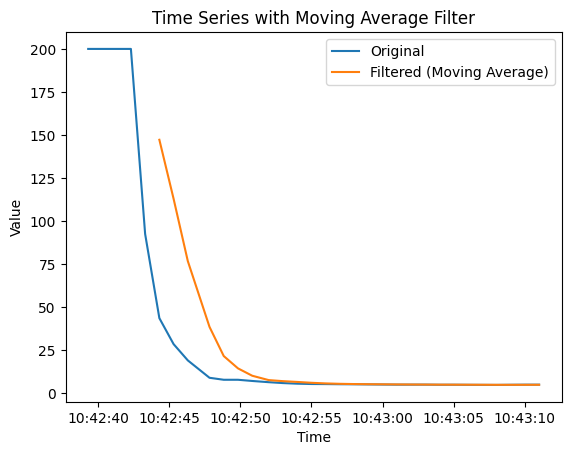

In [401]:
df = df_pos[['hacc_pos']]
window_size = 5
filtered_data = df.rolling(window=window_size).mean()

# Plot original and filtered data
plt.plot(df, label='Original')
plt.plot(filtered_data, label='Filtered (Moving Average)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series with Moving Average Filter')
plt.show()

In [402]:
df_combined.columns

Index(['Timestamp_acc', 'X_acc', 'Y_acc', 'Z_acc', 'Timestamp_ang', 'X_ang',
       'Y_ang', 'Z_ang', 'Timestamp_mag', 'X_mag', 'Y_mag', 'Z_mag',
       'Timestamp_ori', 'X_ori', 'Y_ori', 'Z_ori'],
      dtype='object')

In [403]:
start_datetime = '2023-01-01 00:00:00'
df = pd.DataFrame()
df_combined_daily = pd.DataFrame()
df = df_combined[['Timestamp_acc', 'X_acc', 'Y_acc', 'Z_acc', 'X_ang',
       'Y_ang', 'Z_ang', 'X_mag', 'Y_mag', 'Z_mag', 'X_ori', 'Y_ori', 'Z_ori']]

# Define the number of rows in your DataFrame
num_rows = len(df)  # Replace df with the name of your DataFrame

# Create a new datetime range starting from the defined start datetime
new_datetime_range = pd.date_range(start=start_datetime, periods=num_rows, freq='D')

# Assign the new datetime range to a new column in your DataFrame and make it the index
df['new_datetime'] = new_datetime_range
df = df.set_index('new_datetime')

# Display the DataFrame
df_combined_daily = df[['X_acc', 'Y_acc', 'Z_acc','X_ang',
       'Y_ang', 'Z_ang', 'X_mag', 'Y_mag', 'Z_mag', 'X_ori', 'Y_ori', 'Z_ori']]
df_combined_daily

<ipython-input-403-c4edf698f57a>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



X_acc   Y_acc    Z_acc   X_ang   Y_ang   Z_ang    X_mag  \
new_datetime                                                             
2023-01-01   -0.6874  2.6145   9.4738 -0.5279 -0.1800  0.4034  22.3031   
2023-01-02    0.2087  2.5612   8.7987  0.3128 -0.2669  0.4420  19.9651   
2023-01-03    0.8233  1.5580  10.0211 -0.0512  0.5064  0.6726  19.9828   
2023-01-04    0.5631  1.3448   9.7494  0.3059  0.3728  0.6971  21.5404   
2023-01-05    0.4777  2.7216   9.0319 -0.0193  0.3177  0.3420  22.2615   
...              ...     ...      ...     ...     ...     ...      ...   
2023-11-14    3.6033  1.6451   9.5844  0.2479  0.2777  0.4971 -36.2915   
2023-11-15    3.0548  1.3099   9.7145  0.1368  0.6773  0.3501 -35.0919   
2023-11-16    2.6740  0.6984   9.6688  0.1950  0.3027 -0.0093 -34.4656   
2023-11-17    2.6341  1.3571   9.1235 -0.3173  0.0388 -0.1107 -32.9532   
2023-11-18    1.2539  1.2116   9.3984 -0.5273 -0.2670 -0.1533 -32.4070   

                Y_mag    Z_mag     X_ori    Y_ori    Z_ori  
new_datetime                                                
2023-01-01    -1.8409 -44.6038  165.4113 -13.8250  -0.1837  
2023-01-02    -2.7399 -45.4534  163.0280 -13.7230  -3.4601  
2023-01-03    -4.6182 -45.4229  159.1013 -13.8454  -4.0659  
2023-01-04    -6.6315 -44.1276  155.1935 -14.2814  -2.2925  
2023-01-05    -9.2683 -43.2922  150.7567 -15.0293  -1.7628  
...               ...      ...       ...      ...      ...  
2023-11-14   -10.2757 -33.8978  -29.0623 -10.1138 -16.1437  
2023-11-15    -9.6974 -35.1897  -31.3345 -10.6084 -13.9858  
2023-11-16   -10.1306 -35.5245  -32.3649 -11.7613 -13.1533  
2023-11-17   -10.2687 -36.2263  -33.0348 -12.0978 -10.8372  
2023-11-18    -9.7076 -36.9565  -31.9219 -10.8686  -9.9516  

[322 rows x 12 columns]

In [404]:
resampled_df = df_combined_daily.resample('W').mean()
resampled_df.head()

X_acc     Y_acc      Z_acc     X_ang     Y_ang     Z_ang  \
new_datetime                                                                
2023-01-01   -0.687400  2.614500   9.473800 -0.527900 -0.180000  0.403400   
2023-01-08    0.040671  1.926371   9.642400  0.006457  0.186100  0.276571   
2023-01-15   -0.214143  1.476614   9.752686 -0.011471  0.035914  0.651486   
2023-01-22    1.005871  0.954543  10.207571  0.174000  0.004129  0.458386   
2023-01-29    0.420343  3.165229   9.545471  0.182643 -0.064629  0.333029   

                  X_mag      Y_mag      Z_mag       X_ori      Y_ori     Z_ori  
new_datetime                                                                    
2023-01-01    22.303100  -1.840900 -44.603800  165.411300 -13.825000 -0.183700  
2023-01-08    21.699557  -6.037414 -44.066843  154.524214 -12.786086 -2.037957  
2023-01-15    21.296414  -9.560843 -43.702957  140.102686  -8.485529 -2.301614  
2023-01-22    17.424971 -21.905129 -41.272686  111.783914  -9.800100 -3.136529  
2023-01-29    13.471686 -31.296000 -34.879329   96.040386 -17.076786 -4.173614

### PCA Technique

In [478]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming your time series data is stored in a DataFrame with time steps as rows and features as columns
# Replace 'your_time_series_data' with the name of your DataFrame
# Extract the values from the DataFrame
time_series_values = df_combined_daily[['X_acc','Y_acc','Z_acc']].values

# Initialize PCA object
pca = PCA()

# Fit PCA to the time series data
pca.fit(time_series_values)

# Access the principal components
principal_components = pca.components_

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
print("Explained Variance Ratio:", explained_variance_ratio)

# Transform the original data into the principal component space
transformed_data = pca.transform(time_series_values)
print(len(principal_components))
print(len(transformed_data))

Explained Variance Ratio: [0.63687949 0.28032955 0.08279095]
3
322


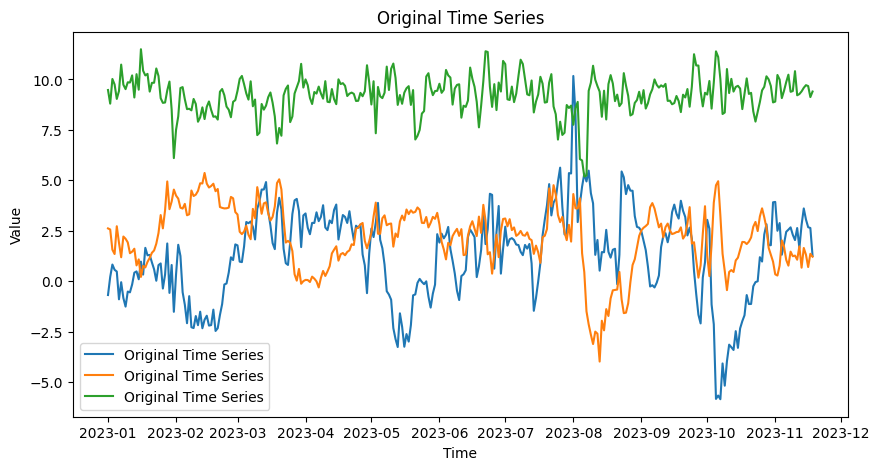

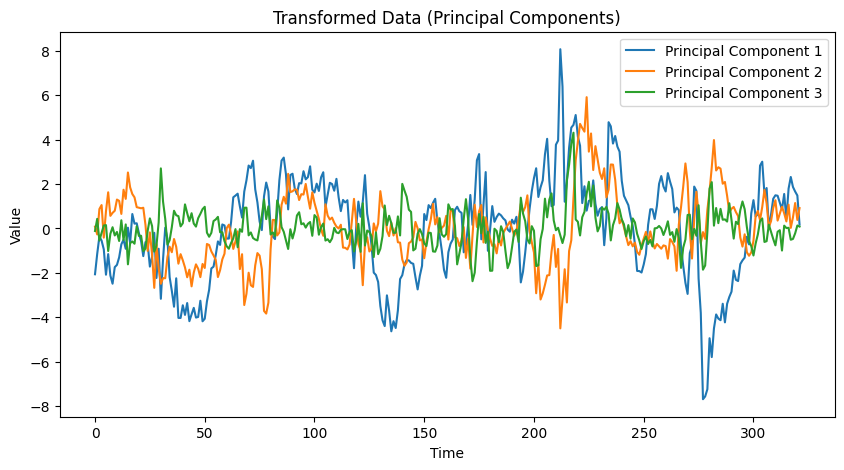

In [479]:
import matplotlib.pyplot as plt

# Plot original time series data
plt.figure(figsize=(10, 5))
plt.plot(df_combined_daily[['X_acc','Y_acc','Z_acc']].index, df_combined_daily[['X_acc','Y_acc','Z_acc']].values, label='Original Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original Time Series')
plt.legend()
plt.show()

# Plot transformed data
plt.figure(figsize=(10, 5))
plt.plot(transformed_data[:, 0], label='Principal Component 1')
plt.plot(transformed_data[:, 1], label='Principal Component 2')
plt.plot(transformed_data[:, 2], label='Principal Component 3')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Transformed Data (Principal Components)')
plt.legend()
plt.show()


The transformed data appears to be inverted compared to the original data, it means that the direction of the principal component axes was chosen such that the transformation resulted in an inversion. This inversion does not change the information content of the transformed data; it only changes its representation in the new coordinate system defined by the principal components.

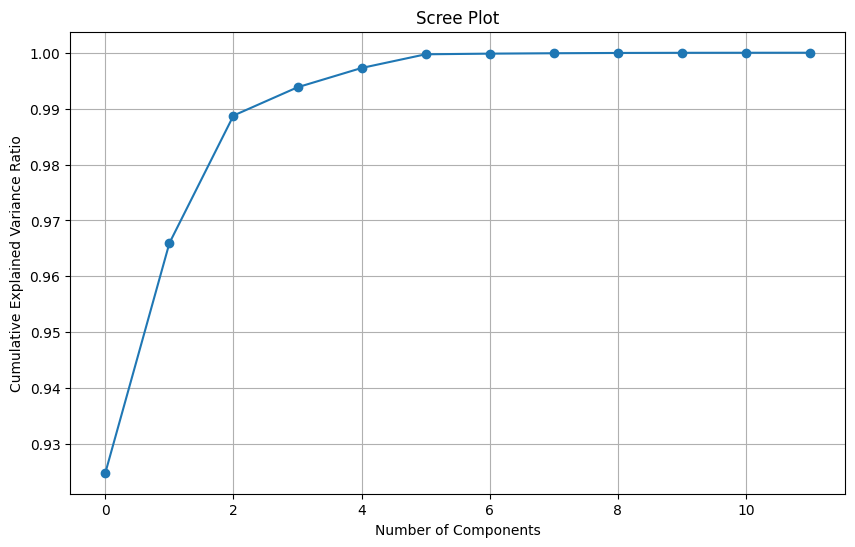

Number of components selected: 2
Cumulative explained variance ratio at selected components: 0.9659570457857714
Dimensionality after PCA reduction: 2


In [480]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming your time series data is stored in X (n_samples, n_features)
# Perform PCA
pca = PCA()
pca.fit(df_combined_daily)

# Compute explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Select number of components based on scree plot
cumulative_variance = np.cumsum(explained_variance_ratio)
threshold_variance = 0.95  # Example threshold, adjust as needed
num_components = np.argmax(cumulative_variance >= threshold_variance) + 1

print("Number of components selected:", num_components)
print("Cumulative explained variance ratio at selected components:", cumulative_variance[num_components - 1])

print("Dimensionality after PCA reduction:", num_components)


In [481]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming 'time_series_data' is your time series data
time_series_data_reshaped = df_combined_daily

# Initialize PCA with the desired number of components
n_components = 8  # Set the number of components
pca = PCA(n_components=n_components)

# Fit PCA to the data
pca.fit(time_series_data_reshaped)

# Transform the original data into the new feature space
transformed_data = pca.transform(time_series_data_reshaped)

# Optionally, inverse transform the transformed data
# Note: This will bring the data back to the original space
# inverse_transformed_data = pca.inverse_transform(transformed_data)

transformed_data

array([[-1.26177212e+02,  1.73524299e+01, -5.34361094e-01, ...,
         9.21193656e+00,  2.71598583e-01,  1.71932582e-01],
       [-1.23271350e+02,  1.72745866e+01, -3.47912420e+00, ...,
         8.65302227e+00,  3.57828316e-01,  7.33813041e-01],
       [-1.19535733e+02,  1.60885474e+01, -2.65773773e+00, ...,
         8.07698641e+00,  6.48943530e-01, -1.36694092e-01],
       ...,
       [ 7.86096310e+01, -2.15573757e+00, -1.07186452e+01, ...,
         1.84498982e+00,  5.89656623e-01, -2.94850782e-02],
       [ 7.88032759e+01, -2.54467429e+00, -8.26085811e+00, ...,
         3.23325073e+00,  1.03365515e+00,  5.41597513e-01],
       [ 7.75350489e+01, -1.74481750e+00, -7.62075513e+00, ...,
         3.83013968e+00, -7.01862826e-02,  1.91522410e-01]])

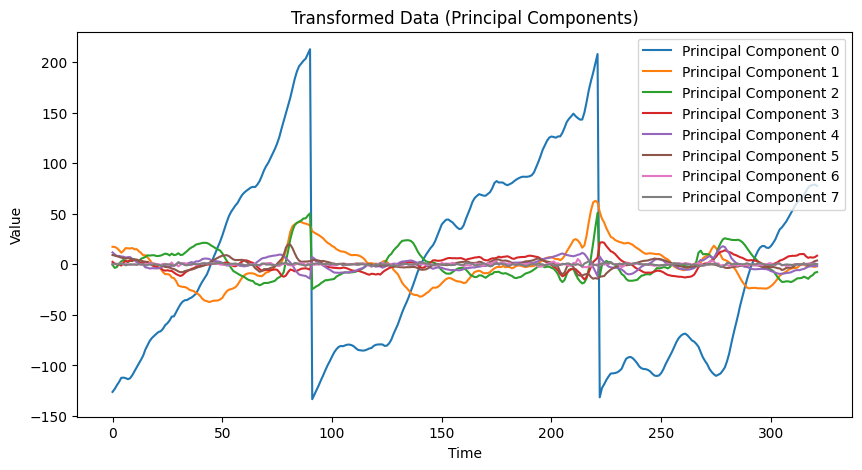

In [482]:
plt.figure(figsize=(10, 5))
for i in range(n_components):
  plt.plot(transformed_data[:, i], label=f'''Principal Component {i}''')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Transformed Data (Principal Components)')
plt.legend()
plt.show()

In [483]:
inverse_transformed_data = pca.inverse_transform(transformed_data)
inverse_transformed_data

array([[ -0.6372966 ,   2.46196061,   9.45179206, ..., 165.41142522,
        -13.848253  ,  -0.16731366],
       [  0.23354164,   2.29906443,   8.86437924, ..., 163.02881723,
        -13.76382169,  -3.45951681],
       [  0.56481752,   2.44968357,   9.69864793, ..., 159.09709384,
        -13.67693898,  -4.10047689],
       ...,
       [  2.62573394,   1.78533526,   9.52113202, ..., -32.3658565 ,
        -11.57428902, -13.16856861],
       [  2.7105315 ,   1.80583971,   9.1023396 , ..., -33.03419215,
        -12.02642735, -10.82699083],
       [  1.45775396,   1.54037565,   9.44844204, ..., -31.91972446,
        -10.82125433,  -9.92084269]])

In [484]:
inverse_transformed_data.shape

(322, 12)

In [485]:
df_combined_daily.shape

(322, 12)

In [486]:
df_combined_daily

X_acc   Y_acc    Z_acc   X_ang   Y_ang   Z_ang    X_mag  \
new_datetime                                                             
2023-01-01   -0.6874  2.6145   9.4738 -0.5279 -0.1800  0.4034  22.3031   
2023-01-02    0.2087  2.5612   8.7987  0.3128 -0.2669  0.4420  19.9651   
2023-01-03    0.8233  1.5580  10.0211 -0.0512  0.5064  0.6726  19.9828   
2023-01-04    0.5631  1.3448   9.7494  0.3059  0.3728  0.6971  21.5404   
2023-01-05    0.4777  2.7216   9.0319 -0.0193  0.3177  0.3420  22.2615   
...              ...     ...      ...     ...     ...     ...      ...   
2023-11-14    3.6033  1.6451   9.5844  0.2479  0.2777  0.4971 -36.2915   
2023-11-15    3.0548  1.3099   9.7145  0.1368  0.6773  0.3501 -35.0919   
2023-11-16    2.6740  0.6984   9.6688  0.1950  0.3027 -0.0093 -34.4656   
2023-11-17    2.6341  1.3571   9.1235 -0.3173  0.0388 -0.1107 -32.9532   
2023-11-18    1.2539  1.2116   9.3984 -0.5273 -0.2670 -0.1533 -32.4070   

                Y_mag    Z_mag     X_ori    Y_ori    Z_ori  
new_datetime                                                
2023-01-01    -1.8409 -44.6038  165.4113 -13.8250  -0.1837  
2023-01-02    -2.7399 -45.4534  163.0280 -13.7230  -3.4601  
2023-01-03    -4.6182 -45.4229  159.1013 -13.8454  -4.0659  
2023-01-04    -6.6315 -44.1276  155.1935 -14.2814  -2.2925  
2023-01-05    -9.2683 -43.2922  150.7567 -15.0293  -1.7628  
...               ...      ...       ...      ...      ...  
2023-11-14   -10.2757 -33.8978  -29.0623 -10.1138 -16.1437  
2023-11-15    -9.6974 -35.1897  -31.3345 -10.6084 -13.9858  
2023-11-16   -10.1306 -35.5245  -32.3649 -11.7613 -13.1533  
2023-11-17   -10.2687 -36.2263  -33.0348 -12.0978 -10.8372  
2023-11-18    -9.7076 -36.9565  -31.9219 -10.8686  -9.9516  

[322 rows x 12 columns]

In [509]:
df = pd.DataFrame(inverse_transformed_data)

# Optionally, you can specify column names and index labels
# Example with column names and index labels
column_names = df_combined_daily.columns.to_list()
index_labels = df_combined_daily.index
df = pd.DataFrame(inverse_transformed_data, columns=column_names, index=index_labels)
df

X_acc     Y_acc     Z_acc     X_ang     Y_ang     Z_ang  \
new_datetime                                                               
2023-01-01   -0.637297  2.461961  9.451792 -0.003280  0.221044  0.368354   
2023-01-02    0.233542  2.299064  8.864379 -0.035281  0.179003  0.370791   
2023-01-03    0.564818  2.449684  9.698648  0.030120  0.167778  0.126977   
2023-01-04    0.295313  2.471951  9.422930 -0.002941  0.176753  0.219363   
2023-01-05    0.455166  2.576109  9.044142 -0.044958  0.169281  0.243797   
...                ...       ...       ...       ...       ...       ...   
2023-11-14    3.489327  1.609605  9.528491  0.127070 -0.073079  0.164453   
2023-11-15    2.940507  1.657714  9.623810  0.091890 -0.048793  0.240980   
2023-11-16    2.625734  1.785335  9.521132  0.070418 -0.025286  0.314477   
2023-11-17    2.710532  1.805840  9.102340 -0.022944 -0.048903  0.322872   
2023-11-18    1.457754  1.540376  9.448442  0.023198  0.015098  0.582816   

                  X_mag      Y_mag      Z_mag       X_ori      Y_ori  \
new_datetime                                                           
2023-01-01    22.300881  -1.840577 -44.608167  165.411425 -13.848253   
2023-01-02    19.964243  -2.736825 -45.441515  163.028817 -13.763822   
2023-01-03    19.985146  -4.631071 -45.454697  159.097094 -13.676939   
2023-01-04    21.541348  -6.647802 -44.160885  155.189500 -14.069634   
2023-01-05    22.263357  -9.265641 -43.287454  150.756479 -15.055267   
...                 ...        ...        ...         ...        ...   
2023-11-14   -36.287356 -10.274061 -33.896010  -29.063769 -10.117285   
2023-11-15   -35.088202  -9.700438 -35.198749  -31.336165 -10.551038   
2023-11-16   -34.468715 -10.145783 -35.553973  -32.365856 -11.574289   
2023-11-17   -32.956930 -10.275470 -36.241939  -33.034192 -12.026427   
2023-11-18   -32.414514  -9.713911 -36.971310  -31.919724 -10.821254   

                  Z_ori  
new_datetime             
2023-01-01    -0.167314  
2023-01-02    -3.459517  
2023-01-03    -4.100477  
2023-01-04    -2.335186  
2023-01-05    -1.765423  
...                 ...  
2023-11-14   -16.159575  
2023-11-15   -14.004263  
2023-11-16   -13.168569  
2023-11-17   -10.826991  
2023-11-18    -9.920843  

[322 rows x 12 columns]

In [510]:
df.columns

Index(['X_acc', 'Y_acc', 'Z_acc', 'X_ang', 'Y_ang', 'Z_ang', 'X_mag', 'Y_mag',
       'Z_mag', 'X_ori', 'Y_ori', 'Z_ori'],
      dtype='object')

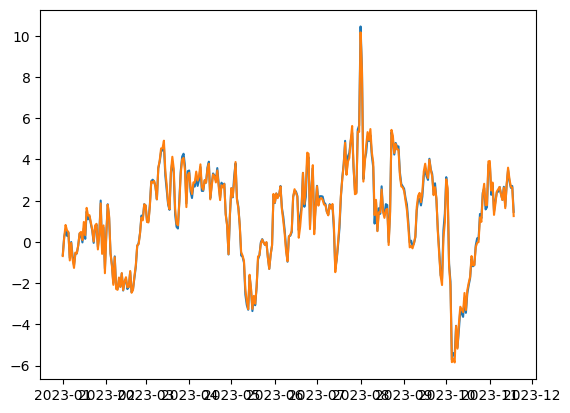

In [511]:
plt.plot(df['X_acc'])
plt.plot(df_combined_daily['X_acc'])
plt.show()

In [489]:
subtracted_df = df - df_combined_daily
subtracted_df

X_acc     Y_acc     Z_acc     X_ang     Y_ang     Z_ang  \
new_datetime                                                               
2023-01-01    0.050103 -0.152539 -0.022008  0.524620  0.401044 -0.035046   
2023-01-02    0.024842 -0.262136  0.065679 -0.348081  0.445903 -0.071209   
2023-01-03   -0.258482  0.891684 -0.322452  0.081320 -0.338622 -0.545623   
2023-01-04   -0.267787  1.127151 -0.326470 -0.308841 -0.196047 -0.477737   
2023-01-05   -0.022534 -0.145491  0.012242 -0.025658 -0.148419 -0.098203   
...                ...       ...       ...       ...       ...       ...   
2023-11-14   -0.113973 -0.035495 -0.055909 -0.120830 -0.350779 -0.332647   
2023-11-15   -0.114293  0.347814 -0.090690 -0.044910 -0.726093 -0.109120   
2023-11-16   -0.048266  1.086935 -0.147668 -0.124582 -0.327986  0.323777   
2023-11-17    0.076432  0.448740 -0.021160  0.294356 -0.087703  0.433572   
2023-11-18    0.203854  0.328776  0.050042  0.550498  0.282098  0.736116   

                 X_mag     Y_mag     Z_mag     X_ori     Y_ori     Z_ori  
new_datetime                                                              
2023-01-01   -0.002219  0.000323 -0.004367  0.000125 -0.023253  0.016386  
2023-01-02   -0.000857  0.003075  0.011885  0.000817 -0.040822  0.000583  
2023-01-03    0.002346 -0.012871 -0.031797 -0.004206  0.168461 -0.034577  
2023-01-04    0.000948 -0.016302 -0.033285 -0.004000  0.211766 -0.042686  
2023-01-05    0.001857  0.002659  0.004746 -0.000221 -0.025967 -0.002623  
...                ...       ...       ...       ...       ...       ...  
2023-11-14    0.004144  0.001639  0.001790 -0.001469 -0.003485 -0.015875  
2023-11-15    0.003698 -0.003038 -0.009049 -0.001665  0.057362 -0.018463  
2023-11-16   -0.003115 -0.015183 -0.029473 -0.000956  0.187011 -0.015269  
2023-11-17   -0.003730 -0.006770 -0.015639  0.000608  0.071373  0.010209  
2023-11-18   -0.007514 -0.006311 -0.014810  0.002176  0.047346  0.030757  

[322 rows x 12 columns]

##### Residual test

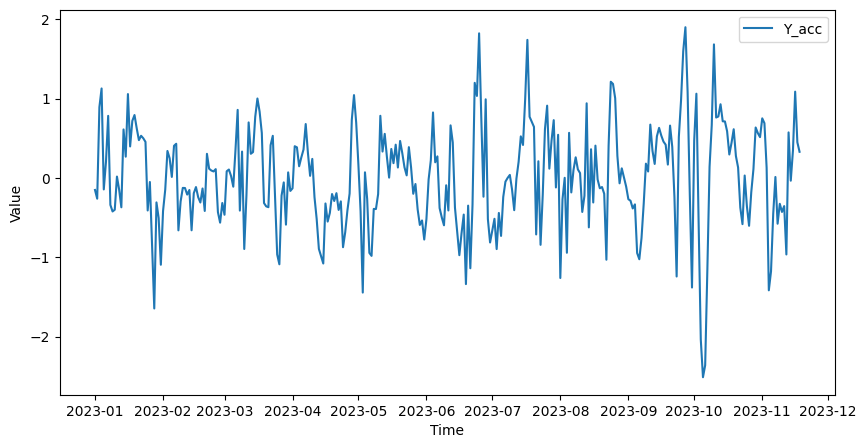

In [490]:
plt.figure(figsize=(10, 5))
# for i in range(1):
plt.plot(subtracted_df.iloc[:, 1], label=f'''{subtracted_df.columns[1]}''')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

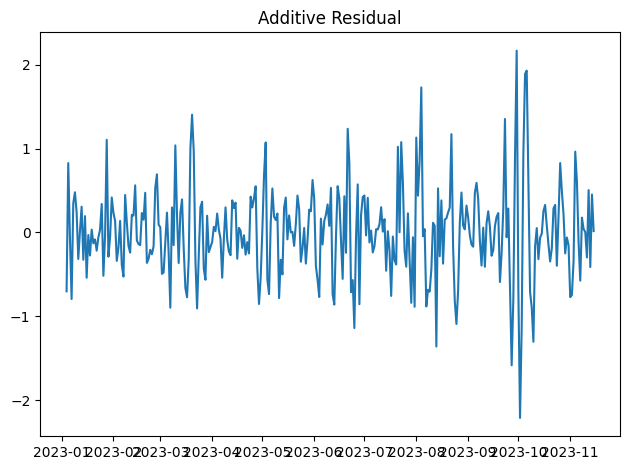

In [491]:
result_additive = seasonal_decompose(df_combined_daily.iloc[:, 1], model='additive')

# Extracting additive components
trend_additive = result_additive.trend
seasonal_additive = result_additive.seasonal
residual_additive = result_additive.resid

plt.plot(residual_additive)
plt.title('Additive Residual')

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

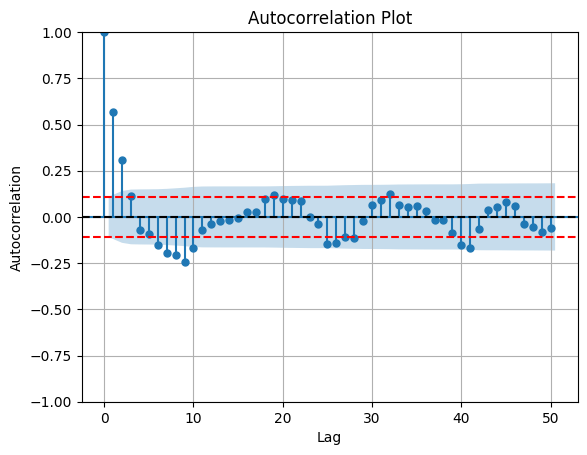

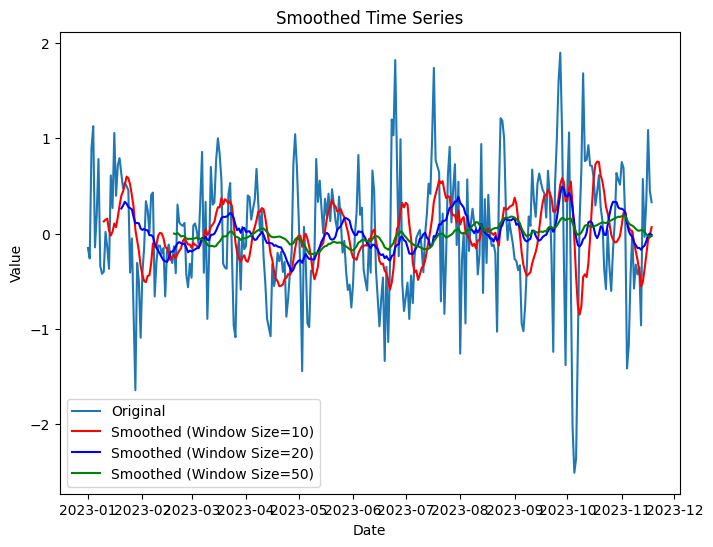

In [492]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df = subtracted_df['Y_acc']

# Plotting correlogram
plt.figure(figsize=(8, 6))
plot_acf(df, lags=50)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.axhline(y=-1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add upper confidence interval
plt.axhline(y=1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add lower confidence interval
plt.grid(True)
plt.show()



# Smooth the time series using a simple moving average
smoothed_series_1 = df.rolling(window=10).mean()
smoothed_series_2 = df.rolling(window=20).mean()
smoothed_series_3 = df.rolling(window=50).mean()

# Plot the original and smoothed time series
plt.figure(figsize=(8, 6))
plt.plot(df.index, df, label='Original')
plt.plot(df.index, smoothed_series_1, label=f'Smoothed (Window Size=10)', color='red')
plt.plot(df.index, smoothed_series_2, label=f'Smoothed (Window Size=20)', color='blue')
plt.plot(df.index, smoothed_series_3, label=f'Smoothed (Window Size=50)', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothed Time Series')
plt.legend()
plt.show()


If the ACF plot shows that autocorrelation values are close to zero for all lags, with no significant spikes or patterns, it suggests that the residuals are likely noise or random fluctuation.

<Figure size 1000x500 with 0 Axes>

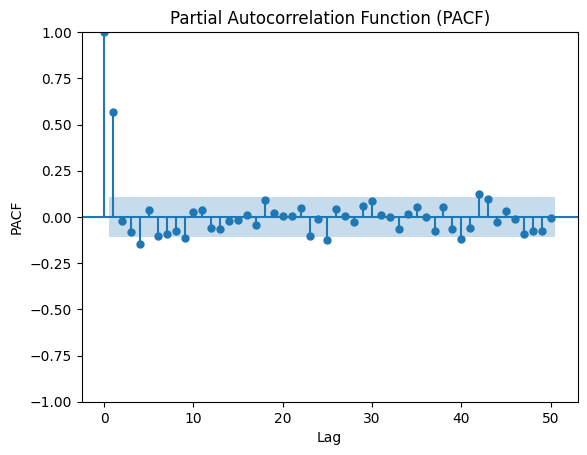

In [493]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF
plt.figure(figsize=(10, 5))
plot_pacf(df, lags=50, title='Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()


The PACF plot helps identify the direct relationship between observations at different lags, while controlling for the effects of shorter lags.
If the PACF plot shows that all partial autocorrelation values beyond the first few lags are close to zero, it indicates that the residual series is likely noise or random fluctuation.

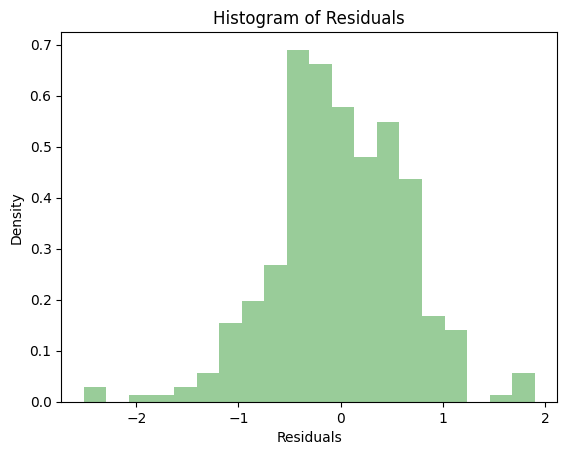

In [494]:
plt.hist(df, bins=20, density=True, alpha=0.4, color='green')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

In [495]:
import scipy.stats as stats
import numpy as np
hist, bin_edges = np.histogram(df, bins='auto')
kurtosis_value = stats.kurtosis(hist)

print("Kurtosis of the histogram of residuals:", kurtosis_value)


Kurtosis of the histogram of residuals: -0.24502528184361605


If the histogram resembles a bell-shaped curve (i.e., symmetric and unimodal), it suggests that the residuals are approximately normally distributed.

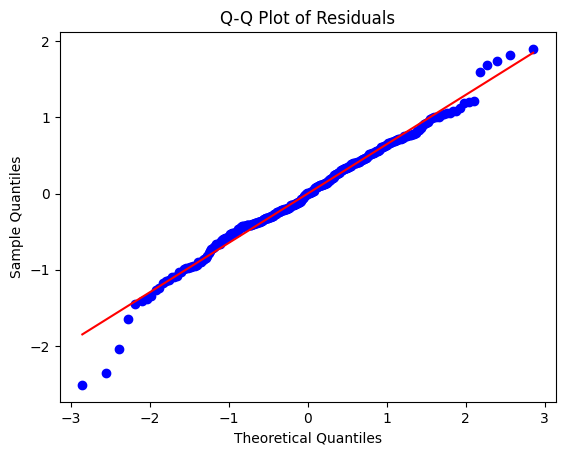

In [496]:
import scipy.stats as stats

# Create Q-Q plot
stats.probplot(df, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

Q-Q plots compare the quantiles of the residual distribution to the quantiles of a theoretical normal distribution.
If the residuals are normally distributed, the points in the Q-Q plot should fall approximately along a straight line.

In [497]:
from scipy.stats import anderson, jarque_bera, kstest, shapiro
import numpy as np


# Perform Shapiro-Wilk test
statistic, p_value = shapiro(df)
print("Shapiro-Wilk Test:")
print("Statistic:", statistic)
print("p-value:", p_value)
if p_value > 0.05:
    print("Residuals are approximately normally distributed (fail to reject null hypothesis)")
else:
    print("Residuals are not normally distributed (reject null hypothesis)")


print("----------------------------------------------------------------------")


# Anderson-Darling Test
ad_statistic, ad_critical_values, ad_significance_levels = anderson(subtracted_df['X_acc'])
print("Anderson-Darling Test Statistic:", ad_statistic)
print("Critical Values:", ad_critical_values)
print("Significance Levels:", ad_significance_levels)
counter = 0
for i in ad_critical_values:
  if ad_statistic > i:
    counter +=1
    print("Residuals are approximately normally distributed (fail to reject null hypothesis)")
    break
if counter ==0:
  print("Residuals are not normally distributed (reject null hypothesis)")


print("----------------------------------------------------------------------")



# Jarque-Bera Test
jb_statistic, jb_p_value = jarque_bera(subtracted_df['X_acc'])
print("\nJarque-Bera Test Statistic:", jb_statistic)
print("P-Value:", jb_p_value)
if p_value > 0.05:
    print("Residuals are approximately normally distributed (fail to reject null hypothesis)")
else:
    print("Residuals are not normally distributed (reject null hypothesis)")


print("----------------------------------------------------------------------")




# Kolmogorov-Smirnov Test
ks_statistic, ks_p_value = kstest(subtracted_df['X_acc'], 'norm')
print("\nKolmogorov-Smirnov Test Statistic:", ks_statistic)
print("P-Value:", ks_p_value)
if p_value > 0.05:
    print("Residuals are approximately normally distributed (fail to reject null hypothesis)")
else:
    print("Residuals are not normally distributed (reject null hypothesis)")


Shapiro-Wilk Test:
Statistic: 0.987306535243988
p-value: 0.006366749759763479
Residuals are not normally distributed (reject null hypothesis)
----------------------------------------------------------------------
Anderson-Darling Test Statistic: 0.44187653571464125
Critical Values: [0.569 0.648 0.778 0.907 1.079]
Significance Levels: [15.  10.   5.   2.5  1. ]
Residuals are not normally distributed (reject null hypothesis)
----------------------------------------------------------------------

Jarque-Bera Test Statistic: 0.06585042594241258
P-Value: 0.9676109216289843
Residuals are not normally distributed (reject null hypothesis)
----------------------------------------------------------------------

Kolmogorov-Smirnov Test Statistic: 0.3672359794548711
P-Value: 1.9012672318994944e-39
Residuals are not normally distributed (reject null hypothesis)


For the Anderson-Darling test, the anderson function returns the test statistic, critical values, and significance levels. The null hypothesis is rejected if the test statistic exceeds the critical value at a given significance level.
For the Jarque-Bera test, the jarque_bera function returns the test statistic and p-value. A low p-value indicates a departure from normality.
For the Kolmogorov-Smirnov test, the kstest function returns the test statistic and p-value. A high p-value suggests that the residuals are consistent with a normal distribution.

In [498]:
df.shape

(322,)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                               SARIMAX Results                                
Dep. Variable:                  X_mag   No. Observations:                  322
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -480.026
Date:                Tue, 05 Mar 2024   AIC                            972.052
Time:                        04:31:43   BIC                            994.699
Sample:                    01-01-2023   HQIC                           981.093
                         - 11-18-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0093      9.472     -0.529      0.597     -23.575      13.556
ar.L1          1.7766      0.038     47.246      0.000       1.703       1.850
ar.L2         -0.7863      0.037    -21.066      0.0

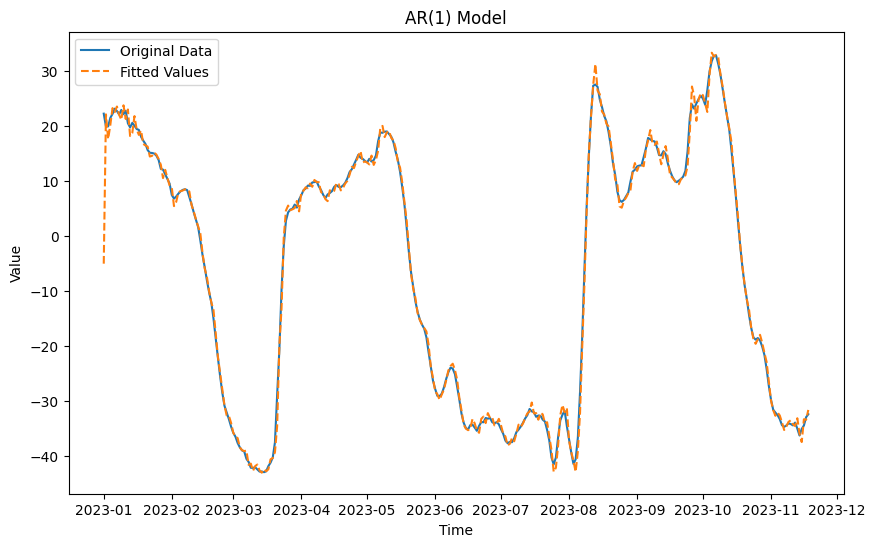

In [528]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

dataframe = df['X_mag']
# Fit AR(1) model
model = ARIMA(dataframe, order=(2, 0, 2))  # ARIMA(p, d, q) where p=1 (AR), d=0 (no differencing), q=0 (no MA)
ar_model = model.fit()

# Print model summary
print(ar_model.summary())

# Plot the original data and fitted values
plt.figure(figsize=(10, 6))
plt.plot(dataframe, label='Original Data')
plt.plot(ar_model.fittedvalues, label='Fitted Values', linestyle='--')
plt.title('AR(1) Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [530]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming your original time series is stored in a pandas Series called 'original_series'

# Define the ARIMA model
model = ARIMA(dataframe, order=(75, 0, 75))

# Fit the ARIMA model to the data
fit_model = model.fit()

# Make forecasts
forecast = fit_model.forecast(steps=200)  # Adjust the number of steps as needed

# Plot the original time series and the forecast
plt.plot(dataframe, label='Original Time Series')
plt.plot(pd.date_range(start=dataframe.index[-1], periods=200, freq=dataframe.index.freq), forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA(2,0,2) Forecast')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



KeyboardInterrupt: 

In [500]:
df_ar1 = pd.DataFrame(ar_model.fittedvalues, columns=['values'])
df_ar1

values
new_datetime          
2023-01-01    0.000713
2023-01-02   -0.086242
2023-01-03   -0.148426
2023-01-04    0.506247
2023-01-05    0.639851
...                ...
2023-11-14    0.325538
2023-11-15   -0.019831
2023-11-16    0.197657
2023-11-17    0.617032
2023-11-18    0.254922

[322 rows x 1 columns]

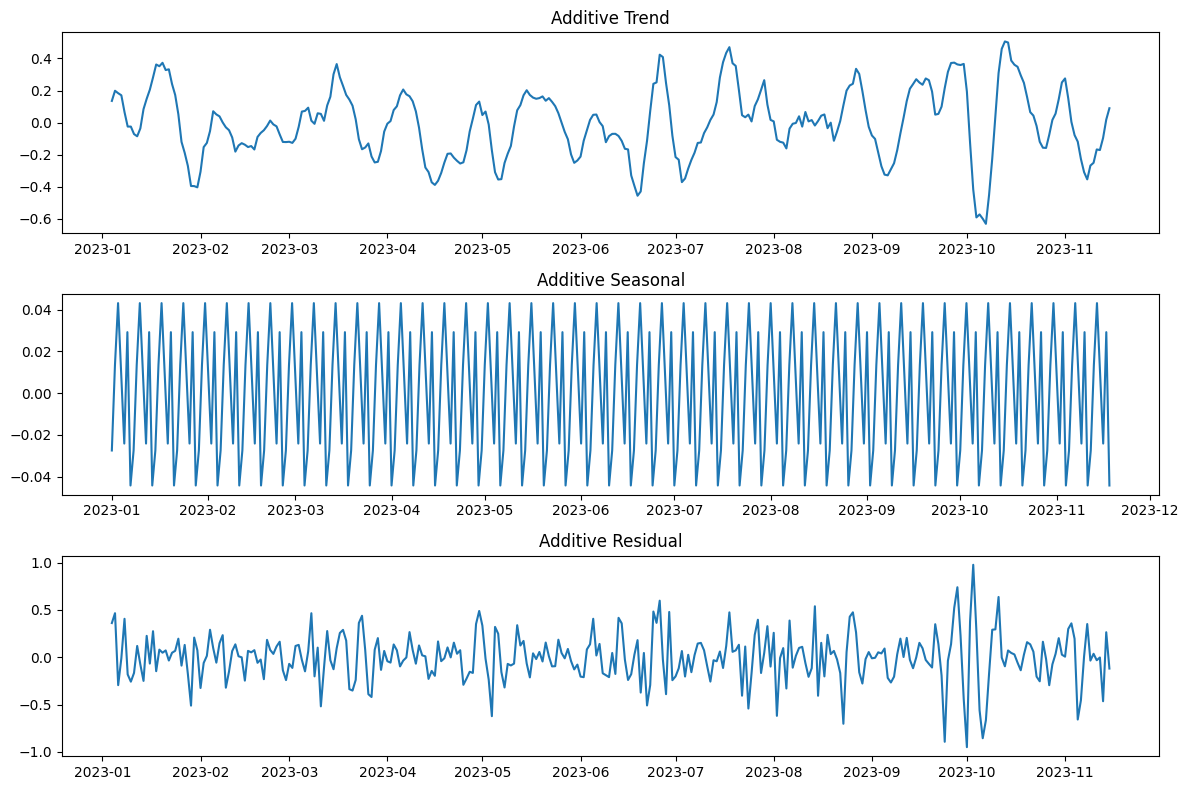

In [501]:
result_additive = seasonal_decompose(df_ar1, model='additive')

# Extracting additive components
trend_additive = result_additive.trend
seasonal_additive = result_additive.seasonal
residual_additive = result_additive.resid

# Plotting the additive components
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(trend_additive)
plt.title('Additive Trend')

plt.subplot(3, 1, 2)
plt.plot(seasonal_additive)
plt.title('Additive Seasonal')

plt.subplot(3, 1, 3)
plt.plot(residual_additive)
plt.title('Additive Residual')

plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

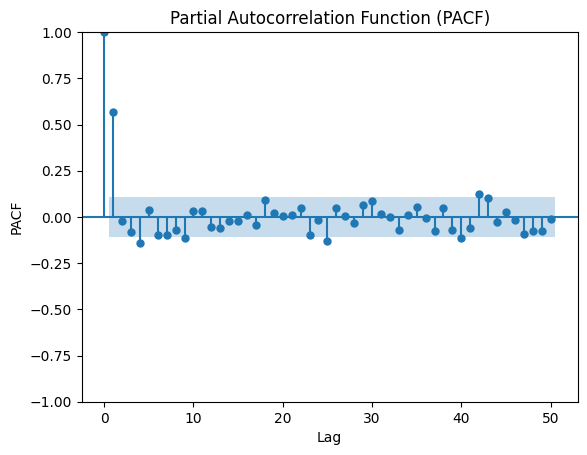

In [502]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF
plt.figure(figsize=(10, 5))
plot_pacf(ar_model.fittedvalues, lags=50, title='Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()


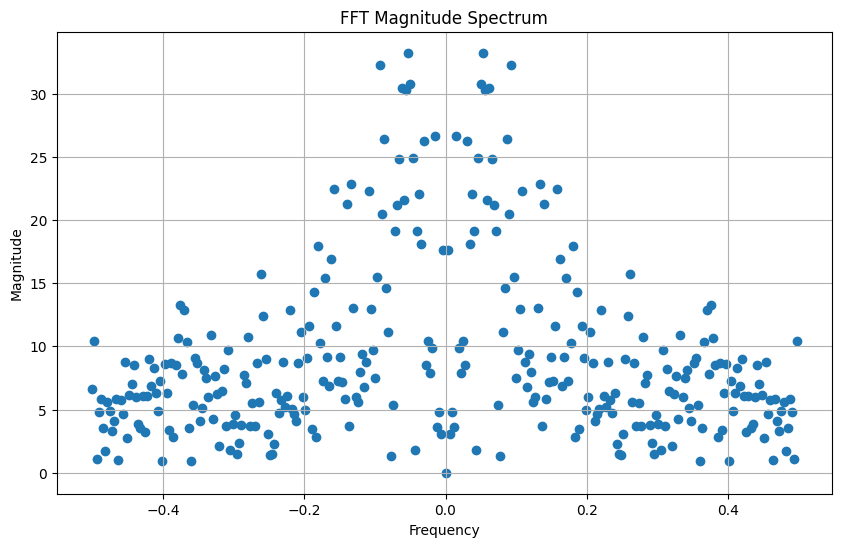

In [503]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'time_series_data' is your time series data
# First, create an evenly spaced time array
time = np.arange(len(df))

# Perform FFT on the time series data
fft_result = np.fft.fft(df)

# Calculate the frequencies corresponding to the FFT result
frequencies = np.fft.fftfreq(len(time), d=time[1]-time[0])

# Plot the magnitude spectrum (absolute values of FFT result)
plt.figure(figsize=(10, 6))
plt.scatter(frequencies, np.abs(fft_result))
plt.title('FFT Magnitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


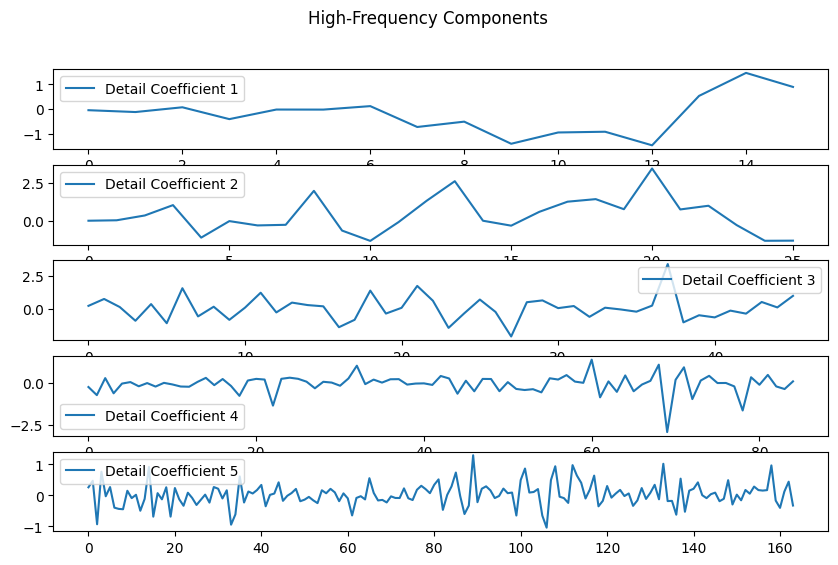

In [504]:
import pywt
import numpy as np

# Define your time series data
# Assuming 'data' is your time series data
data = df  # Replace [...] with your time series data

# Choose a wavelet family and level of decomposition
wavelet = 'db4'  # Daubechies 4 wavelet
level = 5        # Level of decomposition

# Perform wavelet decomposition
coefficients = pywt.wavedec(data, wavelet, level=level)

# Extract the high-frequency components (detail coefficients)
high_freq_components = coefficients[1:]  # Exclude the approximation coefficients

# Plot the high-frequency components
plt.figure(figsize=(10, 6))
for i, component in enumerate(high_freq_components, 1):
    plt.subplot(len(high_freq_components), 1, i)
    plt.plot(component, label=f'Detail Coefficient {i}')
    plt.legend()
plt.suptitle('High-Frequency Components')
plt.show()


In [432]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute reconstruction error (MSE or RMSE)
mse = mean_squared_error(df_combined_daily, inverse_transformed_data)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.07039086890648373
Root Mean Squared Error (RMSE): 0.2653127756186719


While PCA itself does not reduce the duration of the time series data, it can help in reducing the complexity of the data by capturing the most important patterns or features in fewer dimensions. This reduction in dimensionality can indirectly lead to more efficient storage and computation, especially if the original dataset had a high number of variables.

In [433]:
import numpy as np
from sklearn.decomposition import PCA

mse = []
rmse = []

# Assuming 'time_series_data' is your time series data
time_series_data_reshaped = df_combined_daily

# Initialize PCA with the desired number of components
n_components = np.arange(1, 11)  # Set the number of components

for i in n_components:
  pca = PCA(n_components=i)

  # Fit PCA to the data
  pca.fit(time_series_data_reshaped)

  # Transform the original data into the new feature space
  transformed_data = pca.transform(time_series_data_reshaped)
  print('Component of PCA : ', i)
  print('Shape of transformed data : ',transformed_data.shape)

  explained_variance_ratio = pca.explained_variance_ratio_
  print('Variance Ratio : ', explained_variance_ratio)

  inverse_transformed_data = pca.inverse_transform(transformed_data)
  inverse_transformed_data

  print('Length of Inversed transformed data : ', len(inverse_transformed_data))

  from sklearn.metrics import mean_squared_error
  import numpy as np

  # Compute reconstruction error (MSE or RMSE)
  MSE = mean_squared_error(df_combined_daily, inverse_transformed_data)
  mse.append(MSE)
  rmse.append(np.sqrt(MSE))

  print("Mean Squared Error (MSE) : ", MSE)
  print("Root Mean Squared Error (RMSE) : ", np.sqrt(MSE))
  print("\n ------------------------------------------ \n")

Component of PCA :  1
Shape of transformed data :  (322, 1)
Variance Ratio :  [0.92488301]
Length of Inversed transformed data :  322
Mean Squared Error (MSE) :  56.97085197694724
Root Mean Squared Error (RMSE) :  7.547903813440341

 ------------------------------------------ 

Component of PCA :  2
Shape of transformed data :  (322, 2)
Variance Ratio :  [0.92488301 0.04107403]
Length of Inversed transformed data :  322
Mean Squared Error (MSE) :  25.819140606539406
Root Mean Squared Error (RMSE) :  5.081253841970445

 ------------------------------------------ 

Component of PCA :  3
Shape of transformed data :  (322, 3)
Variance Ratio :  [0.92488301 0.04107403 0.02280375]
Length of Inversed transformed data :  322
Mean Squared Error (MSE) :  8.524132377257324
Root Mean Squared Error (RMSE) :  2.9196116826142005

 ------------------------------------------ 

Component of PCA :  4
Shape of transformed data :  (322, 4)
Variance Ratio :  [0.92488301 0.04107403 0.02280375 0.00505894]
Leng

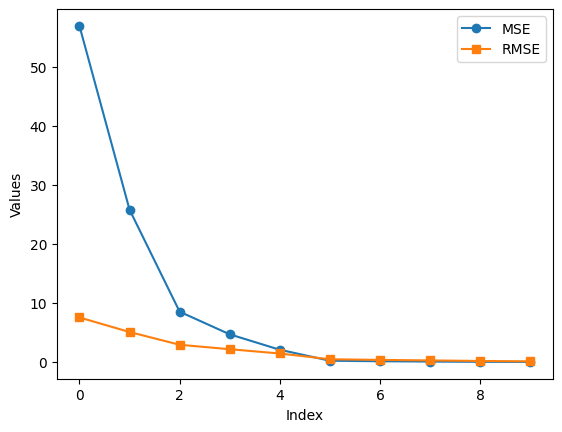

In [434]:
plt.plot(mse, marker='o', label='MSE')
plt.plot(rmse, marker='s', label='RMSE')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

### Auto Encoders

In [435]:
df_combined_daily.head()

X_acc   Y_acc    Z_acc   X_ang   Y_ang   Z_ang    X_mag  \
new_datetime                                                             
2023-01-01   -0.6874  2.6145   9.4738 -0.5279 -0.1800  0.4034  22.3031   
2023-01-02    0.2087  2.5612   8.7987  0.3128 -0.2669  0.4420  19.9651   
2023-01-03    0.8233  1.5580  10.0211 -0.0512  0.5064  0.6726  19.9828   
2023-01-04    0.5631  1.3448   9.7494  0.3059  0.3728  0.6971  21.5404   
2023-01-05    0.4777  2.7216   9.0319 -0.0193  0.3177  0.3420  22.2615   

               Y_mag    Z_mag     X_ori    Y_ori   Z_ori  
new_datetime                                              
2023-01-01   -1.8409 -44.6038  165.4113 -13.8250 -0.1837  
2023-01-02   -2.7399 -45.4534  163.0280 -13.7230 -3.4601  
2023-01-03   -4.6182 -45.4229  159.1013 -13.8454 -4.0659  
2023-01-04   -6.6315 -44.1276  155.1935 -14.2814 -2.2925  
2023-01-05   -9.2683 -43.2922  150.7567 -15.0293 -1.7628

In [436]:
from scipy.stats import shapiro

# Assuming 'df' is your DataFrame
# Perform Shapiro-Wilk test for each column
normality_results = df_combined_daily.apply(lambda x: shapiro(x)[1])

# Check if p-values are greater than the significance level (e.g., 0.05)
all_normal = normality_results > 0.05

# Print the results
print("Are all columns normally distributed?", all_normal.all())
print("p-values for each column:\n", normality_results)


Are all columns normally distributed? False
p-values for each column:
 X_acc    2.167764e-04
Y_acc    8.427962e-07
Z_acc    1.139041e-08
X_ang    1.714495e-01
Y_ang    1.542393e-08
Z_ang    9.215024e-08
X_mag    2.509967e-15
Y_mag    8.363638e-06
Z_mag    1.280622e-06
X_ori    1.111908e-10
Y_ori    2.312213e-10
Z_ori    5.462466e-05
dtype: float64


Normalization - when the distribution of the data does not follow a Gaussian (bell curve) distribution

Standardization - the data follows a Gaussian (bell curve) distribution



In [437]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame or array
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(df_combined_daily)

# Convert the normalized data back to a DataFrame if needed
normalized_df = pd.DataFrame(normalized_data, columns=df_combined_daily.columns)

# Print the normalized DataFrame
normalized_df


X_acc     Y_acc     Z_acc     X_ang     Y_ang     Z_ang     X_mag  \
0    0.322359  0.705990  0.679669  0.111067  0.318538  0.382167  0.860752   
1    0.378288  0.700289  0.572707  0.586012  0.285343  0.391722  0.829923   
2    0.416648  0.592983  0.766383  0.380374  0.580733  0.448807  0.830156   
3    0.400408  0.570179  0.723335  0.582114  0.529699  0.454872  0.850695   
4    0.395078  0.717446  0.609655  0.398396  0.508652  0.366967  0.860203   
..        ...       ...       ...       ...       ...       ...       ...   
317  0.590161  0.602300  0.697192  0.549347  0.493373  0.405362  0.088123   
318  0.555927  0.566446  0.717805  0.486583  0.646014  0.368972  0.103941   
319  0.532159  0.501038  0.710565  0.519462  0.502922  0.280003  0.112200   
320  0.529669  0.571494  0.624168  0.230044  0.402116  0.254901  0.132142   
321  0.443524  0.555931  0.667723  0.111406  0.285305  0.244356  0.139344   

        Y_mag     Z_mag     X_ori     Y_ori     Z_ori  
0    0.520394  0.258366  0.966739  0.329257  0.699489  
1    0.509631  0.230394  0.960025  0.331294  0.647024  
2    0.487145  0.231398  0.948964  0.328849  0.637324  
3    0.463043  0.274044  0.937955  0.320140  0.665721  
4    0.431476  0.301549  0.925457  0.305200  0.674203  
..        ...       ...       ...       ...       ...  
317  0.419416  0.610848  0.418905  0.403392  0.443925  
318  0.426339  0.568314  0.412504  0.393512  0.478479  
319  0.421153  0.557291  0.409602  0.370481  0.491809  
320  0.419500  0.534185  0.407714  0.363759  0.528897  
321  0.426217  0.510144  0.410850  0.388314  0.543078  

[322 rows x 12 columns]

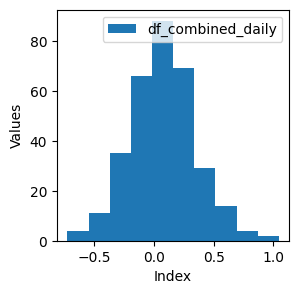

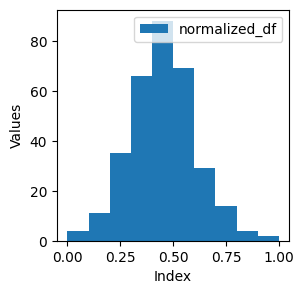

In [438]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column1' and 'column2' are the columns you want to plot
plt.figure(figsize=(3, 3))
col = 'X_ang'
plt.hist(df_combined_daily[col], label='df_combined_daily')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

plt.figure(figsize=(3, 3))
plt.hist(normalized_df[col], label='normalized_df')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()


In [439]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

# Split the data into train and test sets
train_data, test_data = train_test_split(normalized_df, test_size=0.2, random_state=42)

# Define hyperparameters
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
loss_function = MeanSquaredError()
activation_function = 'relu'
num_layers = 1
num_units = [64]
batch_size = 16
epochs = 50
validation_split = 0.2

# Define the autoencoder model
autoencoder = Sequential()

# Encoder layers
for i in range(num_layers):
    autoencoder.add(Dense(units=num_units[i], activation=activation_function))

# Decoder layers
for i in range(num_layers):
    autoencoder.add(Dense(units=num_units[i], activation=activation_function))

# Output layer
autoencoder.add(Dense(units=df_combined_daily.shape[1], activation='sigmoid'))

# Compile the model
autoencoder.compile(optimizer=optimizer, loss=loss_function)

# Train the model
history = autoencoder.fit(train_data, train_data,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=False,
                          validation_split=validation_split)

# Encoded representation of the test data
encoded_data = autoencoder.predict(test_data)

# Reconstruction error (MSE) between the original and reconstructed data
reconstruction_error = np.mean(np.square(test_data - autoencoder.predict(test_data)))

print("Reconstruction error:", reconstruction_error)


Epoch 1/50
13/13 [==============================] - 1s 25ms/step - loss: 0.0482 - val_loss: 0.0383
Epoch 2/50
13/13 [==============================] - 0s 10ms/step - loss: 0.0405 - val_loss: 0.0325
Epoch 3/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0350 - val_loss: 0.0277
Epoch 4/50
13/13 [==============================] - 0s 8ms/step - loss: 0.0299 - val_loss: 0.0236
Epoch 5/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0256 - val_loss: 0.0199
Epoch 6/50
13/13 [==============================] - 0s 8ms/step - loss: 0.0216 - val_loss: 0.0169
Epoch 7/50
13/13 [==============================] - 0s 8ms/step - loss: 0.0181 - val_loss: 0.0144
Epoch 8/50
13/13 [==============================] - 0s 8ms/step - loss: 0.0153 - val_loss: 0.0125
Epoch 9/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0133 - val_loss: 0.0112
Epoch 10/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0118 - val_loss: 0.0103
Epoch 11/50
13/13

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



In [440]:
encoded_data2 = autoencoder.predict(normalized_df)
df_encoded = pd.DataFrame(encoded_data2, columns=normalized_df.columns)

11/11 [==============================] - 0s 4ms/step


In [441]:
df_encoded

X_acc     Y_acc     Z_acc     X_ang     Y_ang     Z_ang     X_mag  \
0    0.350070  0.663998  0.632076  0.164370  0.312492  0.359763  0.899278   
1    0.393256  0.689872  0.630150  0.522564  0.339550  0.347922  0.862736   
2    0.389307  0.592892  0.709726  0.378071  0.559700  0.428032  0.853701   
3    0.367735  0.605224  0.721123  0.563516  0.554642  0.431498  0.861964   
4    0.387173  0.715834  0.609575  0.376195  0.503469  0.358558  0.872118   
..        ...       ...       ...       ...       ...       ...       ...   
317  0.562039  0.591686  0.700653  0.559079  0.483953  0.395884  0.105548   
318  0.551255  0.570392  0.719772  0.529939  0.632677  0.410929  0.126539   
319  0.548619  0.559309  0.751179  0.561471  0.519719  0.342933  0.140678   
320  0.547374  0.607265  0.658574  0.266942  0.375228  0.316305  0.154370   
321  0.501894  0.573804  0.697398  0.188751  0.270659  0.310769  0.188133   

        Y_mag     Z_mag     X_ori     Y_ori     Z_ori  
0    0.424762  0.224730  0.852988  0.355706  0.691086  
1    0.431478  0.268743  0.873238  0.363578  0.550188  
2    0.417321  0.191138  0.856815  0.406026  0.630072  
3    0.404422  0.258225  0.865284  0.422531  0.623226  
4    0.362941  0.287932  0.863923  0.309682  0.632686  
..        ...       ...       ...       ...       ...  
317  0.434557  0.606518  0.409302  0.376862  0.416069  
318  0.433990  0.552701  0.424547  0.379512  0.464593  
319  0.439943  0.570084  0.457892  0.419716  0.468501  
320  0.412034  0.531844  0.445884  0.354318  0.511100  
321  0.428809  0.506374  0.427509  0.390406  0.568680  

[322 rows x 12 columns]

In [442]:
subracted_df_encoder = df_encoded - normalized_df
subracted_df_encoder

X_acc     Y_acc     Z_acc     X_ang     Y_ang     Z_ang     X_mag  \
0    0.027711 -0.041992 -0.047593  0.053303 -0.006046 -0.022404  0.038526   
1    0.014967 -0.010416  0.057443 -0.063448  0.054207 -0.043800  0.032813   
2   -0.027342 -0.000091 -0.056657 -0.002303 -0.021033 -0.020775  0.023544   
3   -0.032673  0.035045 -0.002212 -0.018598  0.024942 -0.023374  0.011269   
4   -0.007905 -0.001612 -0.000081 -0.022200 -0.005183 -0.008409  0.011914   
..        ...       ...       ...       ...       ...       ...       ...   
317 -0.028122 -0.010614  0.003460  0.009732 -0.009419 -0.009478  0.017425   
318 -0.004671  0.003946  0.001967  0.043357 -0.013337  0.041957  0.022597   
319  0.016460  0.058272  0.040615  0.042009  0.016797  0.062930  0.028478   
320  0.017705  0.035771  0.034405  0.036898 -0.026889  0.061404  0.022228   
321  0.058370  0.017873  0.029675  0.077344 -0.014646  0.066414  0.048789   

        Y_mag     Z_mag     X_ori     Y_ori     Z_ori  
0   -0.095632 -0.033636 -0.113751  0.026449 -0.008402  
1   -0.078154  0.038349 -0.086788  0.032284 -0.096836  
2   -0.069824 -0.040260 -0.092149  0.077177 -0.007252  
3   -0.058621 -0.015819 -0.072671  0.102392 -0.042495  
4   -0.068535 -0.013617 -0.061534  0.004483 -0.041517  
..        ...       ...       ...       ...       ...  
317  0.015141 -0.004329 -0.009603 -0.026530 -0.027856  
318  0.007651 -0.015613  0.012043 -0.014000 -0.013886  
319  0.018790  0.012794  0.048291  0.049234 -0.023308  
320 -0.007465 -0.002341  0.038170 -0.009441 -0.017797  
321  0.002592 -0.003770  0.016659  0.002092  0.025602  

[322 rows x 12 columns]

<Figure size 800x600 with 0 Axes>

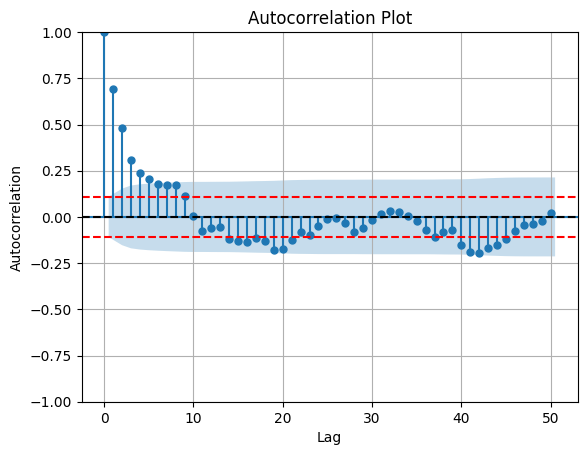

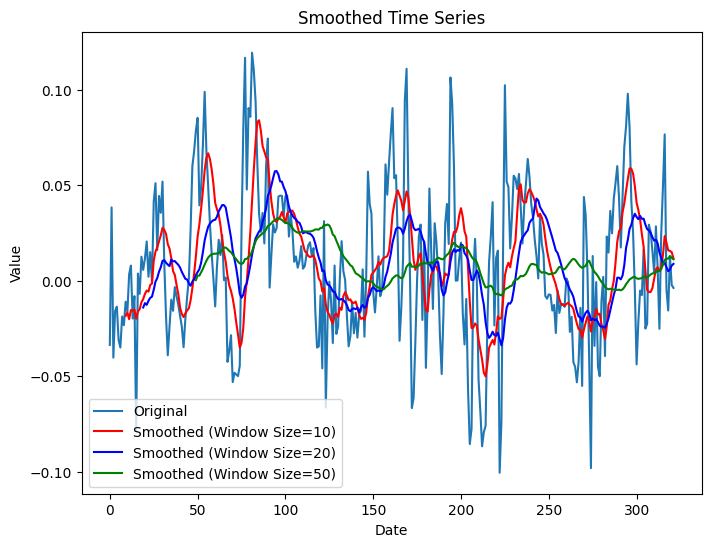

In [443]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

df = subracted_df_encoder['Z_mag']
# df = np.random.normal(0, 1, 322)

# Plotting correlogram
plt.figure(figsize=(8, 6))
plot_acf(df, lags=50)  # Adjust 'lags' as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.axhline(y=-1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add upper confidence interval
plt.axhline(y=1.96/np.sqrt(len(df)), color='red', linestyle='--')  # Add lower confidence interval
plt.grid(True)
plt.show()



# Smooth the time series using a simple moving average
smoothed_series_1 = df.rolling(window=10).mean()
smoothed_series_2 = df.rolling(window=20).mean()
smoothed_series_3 = df.rolling(window=50).mean()

# Plot the original and smoothed time series
plt.figure(figsize=(8, 6))
plt.plot(df.index, df, label='Original')
plt.plot(df.index, smoothed_series_1, label=f'Smoothed (Window Size=10)', color='red')
plt.plot(df.index, smoothed_series_2, label=f'Smoothed (Window Size=20)', color='blue')
plt.plot(df.index, smoothed_series_3, label=f'Smoothed (Window Size=50)', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothed Time Series')
plt.legend()
plt.show()


<Figure size 1000x500 with 0 Axes>

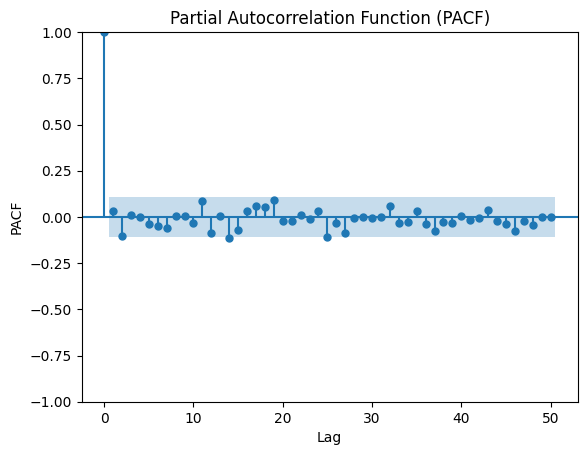

In [444]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF
plt.figure(figsize=(10, 5))
plot_pacf(np.random.normal(0, 1, 322), lags=50, title='Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()


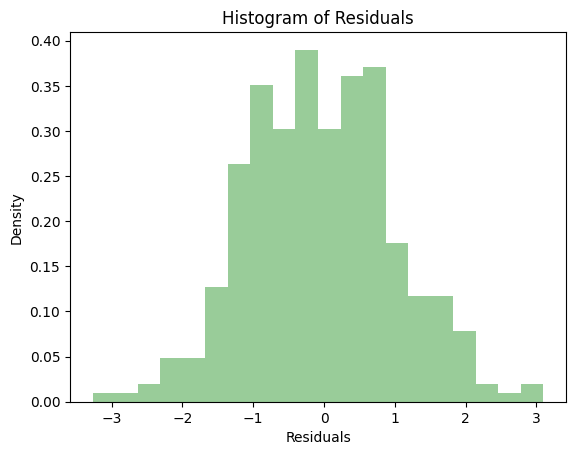

In [445]:
plt.hist(np.random.normal(0, 1, 322), bins=20, density=True, alpha=0.4, color='green')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

In [446]:
import scipy.stats as stats
import numpy as np
hist, bin_edges = np.histogram(np.random.normal(0, 1, 322), bins='auto')
kurtosis_value = stats.kurtosis(hist)

print("Kurtosis of the histogram of residuals:", kurtosis_value)


Kurtosis of the histogram of residuals: -0.7036108785844233


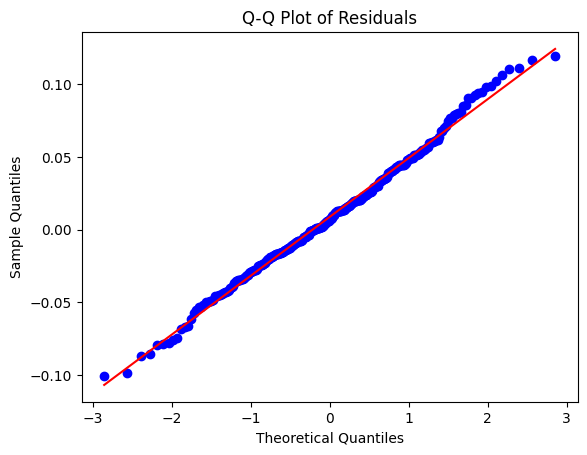

In [447]:
import scipy.stats as stats

# Create Q-Q plot
stats.probplot(df, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [448]:
from scipy.stats import anderson, jarque_bera, kstest, shapiro
import numpy as np


# Perform Shapiro-Wilk test
statistic, p_value = shapiro(df)
print("Shapiro-Wilk Test:")
print("Statistic:", statistic)
print("p-value:", p_value)
if p_value > 0.05:
    print("Residuals are approximately normally distributed (fail to reject null hypothesis)")
else:
    print("Residuals are not normally distributed (reject null hypothesis)")


print("----------------------------------------------------------------------")


# Anderson-Darling Test
ad_statistic, ad_critical_values, ad_significance_levels = anderson(subtracted_df['X_acc'])
print("Anderson-Darling Test Statistic:", ad_statistic)
print("Critical Values:", ad_critical_values)
print("Significance Levels:", ad_significance_levels)
print("Significance Levels:", ad_significance_levels[2], "Critical Values:",ad_critical_values[2])
if ad_statistic > ad_critical_values[2]:
    print("Residuals are not normally distributed (reject null hypothesis)")
else:
  print("Residuals are approximately normally distributed (fail to reject null hypothesis)")


print("----------------------------------------------------------------------")



# Jarque-Bera Test
jb_statistic, jb_p_value = jarque_bera(subtracted_df['X_acc'])
print("\nJarque-Bera Test Statistic:", jb_statistic)
print("P-Value:", jb_p_value)
if p_value > 0.05:
    print("Residuals are approximately normally distributed (fail to reject null hypothesis)")
else:
    print("Residuals are not normally distributed (reject null hypothesis)")


print("----------------------------------------------------------------------")




# Kolmogorov-Smirnov Test
ks_statistic, ks_p_value = kstest(subtracted_df['X_acc'], 'norm')
print("\nKolmogorov-Smirnov Test Statistic:", ks_statistic)
print("P-Value:", ks_p_value)
if p_value > 0.05:
    print("Residuals are approximately normally distributed (fail to reject null hypothesis)")
else:
    print("Residuals are not normally distributed (reject null hypothesis)")


Shapiro-Wilk Test:
Statistic: 0.9943382740020752
p-value: 0.2777487337589264
Residuals are approximately normally distributed (fail to reject null hypothesis)
----------------------------------------------------------------------
Anderson-Darling Test Statistic: 0.44187653571464125
Critical Values: [0.569 0.648 0.778 0.907 1.079]
Significance Levels: [15.  10.   5.   2.5  1. ]
Significance Levels: 5.0 Critical Values: 0.778
Residuals are approximately normally distributed (fail to reject null hypothesis)
----------------------------------------------------------------------

Jarque-Bera Test Statistic: 0.06585042594241258
P-Value: 0.9676109216289843
Residuals are approximately normally distributed (fail to reject null hypothesis)
----------------------------------------------------------------------

Kolmogorov-Smirnov Test Statistic: 0.3672359794548711
P-Value: 1.9012672318994944e-39
Residuals are approximately normally distributed (fail to reject null hypothesis)


### Neural Network

In [449]:
df_syn = df_encoded.copy()
col_list = df_encoded.columns
new_col_list = []
for i in range(len(col_list)):
  new_col_list.append(col_list[i] + '_syn')
df_syn.columns = new_col_list
df_syn

X_acc_syn  Y_acc_syn  Z_acc_syn  X_ang_syn  Y_ang_syn  Z_ang_syn  \
0     0.350070   0.663998   0.632076   0.164370   0.312492   0.359763   
1     0.393256   0.689872   0.630150   0.522564   0.339550   0.347922   
2     0.389307   0.592892   0.709726   0.378071   0.559700   0.428032   
3     0.367735   0.605224   0.721123   0.563516   0.554642   0.431498   
4     0.387173   0.715834   0.609575   0.376195   0.503469   0.358558   
..         ...        ...        ...        ...        ...        ...   
317   0.562039   0.591686   0.700653   0.559079   0.483953   0.395884   
318   0.551255   0.570392   0.719772   0.529939   0.632677   0.410929   
319   0.548619   0.559309   0.751179   0.561471   0.519719   0.342933   
320   0.547374   0.607265   0.658574   0.266942   0.375228   0.316305   
321   0.501894   0.573804   0.697398   0.188751   0.270659   0.310769   

     X_mag_syn  Y_mag_syn  Z_mag_syn  X_ori_syn  Y_ori_syn  Z_ori_syn  
0     0.899278   0.424762   0.224730   0.852988   0.355706   0.691086  
1     0.862736   0.431478   0.268743   0.873238   0.363578   0.550188  
2     0.853701   0.417321   0.191138   0.856815   0.406026   0.630072  
3     0.861964   0.404422   0.258225   0.865284   0.422531   0.623226  
4     0.872118   0.362941   0.287932   0.863923   0.309682   0.632686  
..         ...        ...        ...        ...        ...        ...  
317   0.105548   0.434557   0.606518   0.409302   0.376862   0.416069  
318   0.126539   0.433990   0.552701   0.424547   0.379512   0.464593  
319   0.140678   0.439943   0.570084   0.457892   0.419716   0.468501  
320   0.154370   0.412034   0.531844   0.445884   0.354318   0.511100  
321   0.188133   0.428809   0.506374   0.427509   0.390406   0.568680  

[322 rows x 12 columns]

In [450]:
df_orig = normalized_df.copy()
col_list = normalized_df.columns
new_col_list = []
for i in range(len(col_list)):
  new_col_list.append(col_list[i] + '_ori')
df_orig.columns = new_col_list
df_orig

X_acc_ori  Y_acc_ori  Z_acc_ori  X_ang_ori  Y_ang_ori  Z_ang_ori  \
0     0.322359   0.705990   0.679669   0.111067   0.318538   0.382167   
1     0.378288   0.700289   0.572707   0.586012   0.285343   0.391722   
2     0.416648   0.592983   0.766383   0.380374   0.580733   0.448807   
3     0.400408   0.570179   0.723335   0.582114   0.529699   0.454872   
4     0.395078   0.717446   0.609655   0.398396   0.508652   0.366967   
..         ...        ...        ...        ...        ...        ...   
317   0.590161   0.602300   0.697192   0.549347   0.493373   0.405362   
318   0.555927   0.566446   0.717805   0.486583   0.646014   0.368972   
319   0.532159   0.501038   0.710565   0.519462   0.502922   0.280003   
320   0.529669   0.571494   0.624168   0.230044   0.402116   0.254901   
321   0.443524   0.555931   0.667723   0.111406   0.285305   0.244356   

     X_mag_ori  Y_mag_ori  Z_mag_ori  X_ori_ori  Y_ori_ori  Z_ori_ori  
0     0.860752   0.520394   0.258366   0.966739   0.329257   0.699489  
1     0.829923   0.509631   0.230394   0.960025   0.331294   0.647024  
2     0.830156   0.487145   0.231398   0.948964   0.328849   0.637324  
3     0.850695   0.463043   0.274044   0.937955   0.320140   0.665721  
4     0.860203   0.431476   0.301549   0.925457   0.305200   0.674203  
..         ...        ...        ...        ...        ...        ...  
317   0.088123   0.419416   0.610848   0.418905   0.403392   0.443925  
318   0.103941   0.426339   0.568314   0.412504   0.393512   0.478479  
319   0.112200   0.421153   0.557291   0.409602   0.370481   0.491809  
320   0.132142   0.419500   0.534185   0.407714   0.363759   0.528897  
321   0.139344   0.426217   0.510144   0.410850   0.388314   0.543078  

[322 rows x 12 columns]

In [451]:
df_syn['timestamp'] = df_combined.Timestamp_acc
df_syn['timestamp'] = pd.to_datetime(df_syn['timestamp'])
df_syn.set_index(df_syn['timestamp'], inplace=True)
df_syn.drop(columns=['timestamp'], inplace=True)
df_syn

X_acc_syn  Y_acc_syn  Z_acc_syn  X_ang_syn  \
timestamp                                                             
2023-08-08 10:42:39.090   0.350070   0.663998   0.632076   0.164370   
2023-08-08 10:42:39.189   0.393256   0.689872   0.630150   0.522564   
2023-08-08 10:42:39.289   0.389307   0.592892   0.709726   0.378071   
2023-08-08 10:42:39.388   0.367735   0.605224   0.721123   0.563516   
2023-08-08 10:42:39.487   0.387173   0.715834   0.609575   0.376195   
...                            ...        ...        ...        ...   
2023-08-08 10:43:10.674   0.562039   0.591686   0.700653   0.559079   
2023-08-08 10:43:10.773   0.551255   0.570392   0.719772   0.529939   
2023-08-08 10:43:10.873   0.548619   0.559309   0.751179   0.561471   
2023-08-08 10:43:10.972   0.547374   0.607265   0.658574   0.266942   
2023-08-08 10:43:11.072   0.501894   0.573804   0.697398   0.188751   

                         Y_ang_syn  Z_ang_syn  X_mag_syn  Y_mag_syn  \
timestamp                                                             
2023-08-08 10:42:39.090   0.312492   0.359763   0.899278   0.424762   
2023-08-08 10:42:39.189   0.339550   0.347922   0.862736   0.431478   
2023-08-08 10:42:39.289   0.559700   0.428032   0.853701   0.417321   
2023-08-08 10:42:39.388   0.554642   0.431498   0.861964   0.404422   
2023-08-08 10:42:39.487   0.503469   0.358558   0.872118   0.362941   
...                            ...        ...        ...        ...   
2023-08-08 10:43:10.674   0.483953   0.395884   0.105548   0.434557   
2023-08-08 10:43:10.773   0.632677   0.410929   0.126539   0.433990   
2023-08-08 10:43:10.873   0.519719   0.342933   0.140678   0.439943   
2023-08-08 10:43:10.972   0.375228   0.316305   0.154370   0.412034   
2023-08-08 10:43:11.072   0.270659   0.310769   0.188133   0.428809   

                         Z_mag_syn  X_ori_syn  Y_ori_syn  Z_ori_syn  
timestamp                                                            
2023-08-08 10:42:39.090   0.224730   0.852988   0.355706   0.691086  
2023-08-08 10:42:39.189   0.268743   0.873238   0.363578   0.550188  
2023-08-08 10:42:39.289   0.191138   0.856815   0.406026   0.630072  
2023-08-08 10:42:39.388   0.258225   0.865284   0.422531   0.623226  
2023-08-08 10:42:39.487   0.287932   0.863923   0.309682   0.632686  
...                            ...        ...        ...        ...  
2023-08-08 10:43:10.674   0.606518   0.409302   0.376862   0.416069  
2023-08-08 10:43:10.773   0.552701   0.424547   0.379512   0.464593  
2023-08-08 10:43:10.873   0.570084   0.457892   0.419716   0.468501  
2023-08-08 10:43:10.972   0.531844   0.445884   0.354318   0.511100  
2023-08-08 10:43:11.072   0.506374   0.427509   0.390406   0.568680  

[322 rows x 12 columns]

In [452]:
df_orig['timestamp'] = df_combined.Timestamp_acc
df_orig['timestamp'] = pd.to_datetime(df_orig['timestamp'])
df_orig.set_index(df_orig['timestamp'], inplace=True)
df_orig.drop(columns=['timestamp'], inplace=True)
df_orig

X_acc_ori  Y_acc_ori  Z_acc_ori  X_ang_ori  \
timestamp                                                             
2023-08-08 10:42:39.090   0.322359   0.705990   0.679669   0.111067   
2023-08-08 10:42:39.189   0.378288   0.700289   0.572707   0.586012   
2023-08-08 10:42:39.289   0.416648   0.592983   0.766383   0.380374   
2023-08-08 10:42:39.388   0.400408   0.570179   0.723335   0.582114   
2023-08-08 10:42:39.487   0.395078   0.717446   0.609655   0.398396   
...                            ...        ...        ...        ...   
2023-08-08 10:43:10.674   0.590161   0.602300   0.697192   0.549347   
2023-08-08 10:43:10.773   0.555927   0.566446   0.717805   0.486583   
2023-08-08 10:43:10.873   0.532159   0.501038   0.710565   0.519462   
2023-08-08 10:43:10.972   0.529669   0.571494   0.624168   0.230044   
2023-08-08 10:43:11.072   0.443524   0.555931   0.667723   0.111406   

                         Y_ang_ori  Z_ang_ori  X_mag_ori  Y_mag_ori  \
timestamp                                                             
2023-08-08 10:42:39.090   0.318538   0.382167   0.860752   0.520394   
2023-08-08 10:42:39.189   0.285343   0.391722   0.829923   0.509631   
2023-08-08 10:42:39.289   0.580733   0.448807   0.830156   0.487145   
2023-08-08 10:42:39.388   0.529699   0.454872   0.850695   0.463043   
2023-08-08 10:42:39.487   0.508652   0.366967   0.860203   0.431476   
...                            ...        ...        ...        ...   
2023-08-08 10:43:10.674   0.493373   0.405362   0.088123   0.419416   
2023-08-08 10:43:10.773   0.646014   0.368972   0.103941   0.426339   
2023-08-08 10:43:10.873   0.502922   0.280003   0.112200   0.421153   
2023-08-08 10:43:10.972   0.402116   0.254901   0.132142   0.419500   
2023-08-08 10:43:11.072   0.285305   0.244356   0.139344   0.426217   

                         Z_mag_ori  X_ori_ori  Y_ori_ori  Z_ori_ori  
timestamp                                                            
2023-08-08 10:42:39.090   0.258366   0.966739   0.329257   0.699489  
2023-08-08 10:42:39.189   0.230394   0.960025   0.331294   0.647024  
2023-08-08 10:42:39.289   0.231398   0.948964   0.328849   0.637324  
2023-08-08 10:42:39.388   0.274044   0.937955   0.320140   0.665721  
2023-08-08 10:42:39.487   0.301549   0.925457   0.305200   0.674203  
...                            ...        ...        ...        ...  
2023-08-08 10:43:10.674   0.610848   0.418905   0.403392   0.443925  
2023-08-08 10:43:10.773   0.568314   0.412504   0.393512   0.478479  
2023-08-08 10:43:10.873   0.557291   0.409602   0.370481   0.491809  
2023-08-08 10:43:10.972   0.534185   0.407714   0.363759   0.528897  
2023-08-08 10:43:11.072   0.510144   0.410850   0.388314   0.543078  

[322 rows x 12 columns]

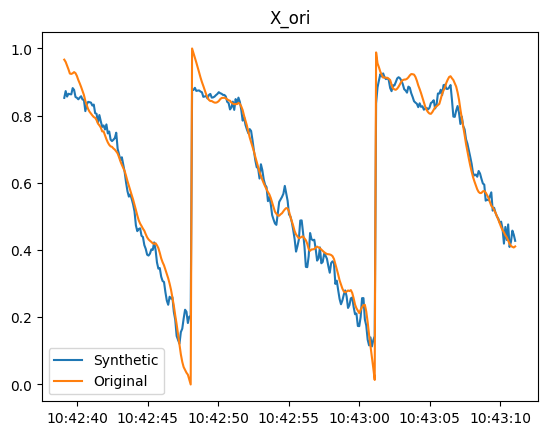

In [542]:
plt.plot(df_syn['X_ori_syn'], label='Synthetic')
plt.plot(df_orig['X_ori_ori'], label='Original')
plt.legend()
plt.title('X_ori')
plt.show()

In [454]:
df_syn.transpose()

timestamp  2023-08-08 10:42:39.090  2023-08-08 10:42:39.189  \
X_acc_syn                 0.350070                 0.393256   
Y_acc_syn                 0.663998                 0.689872   
Z_acc_syn                 0.632076                 0.630150   
X_ang_syn                 0.164370                 0.522564   
Y_ang_syn                 0.312492                 0.339550   
Z_ang_syn                 0.359763                 0.347922   
X_mag_syn                 0.899278                 0.862736   
Y_mag_syn                 0.424762                 0.431478   
Z_mag_syn                 0.224730                 0.268743   
X_ori_syn                 0.852988                 0.873238   
Y_ori_syn                 0.355706                 0.363578   
Z_ori_syn                 0.691086                 0.550188   

timestamp  2023-08-08 10:42:39.289  2023-08-08 10:42:39.388  \
X_acc_syn                 0.389307                 0.367735   
Y_acc_syn                 0.592892                 0.605224   
Z_acc_syn                 0.709726                 0.721123   
X_ang_syn                 0.378071                 0.563516   
Y_ang_syn                 0.559700                 0.554642   
Z_ang_syn                 0.428032                 0.431498   
X_mag_syn                 0.853701                 0.861964   
Y_mag_syn                 0.417321                 0.404422   
Z_mag_syn                 0.191138                 0.258225   
X_ori_syn                 0.856815                 0.865284   
Y_ori_syn                 0.406026                 0.422531   
Z_ori_syn                 0.630072                 0.623226   

timestamp  2023-08-08 10:42:39.487  2023-08-08 10:42:39.588  \
X_acc_syn                 0.387173                 0.347997   
Y_acc_syn                 0.715834                 0.630166   
Z_acc_syn                 0.609575                 0.649594   
X_ang_syn                 0.376195                 0.184884   
Y_ang_syn                 0.503469                 0.333582   
Z_ang_syn                 0.358558                 0.340743   
X_mag_syn                 0.872118                 0.902817   
Y_mag_syn                 0.362941                 0.390326   
Z_mag_syn                 0.287932                 0.280716   
X_ori_syn                 0.863923                 0.863533   
Y_ori_syn                 0.309682                 0.391817   
Z_ori_syn                 0.632686                 0.716560   

timestamp  2023-08-08 10:42:39.687  2023-08-08 10:42:39.787  \
X_acc_syn                 0.377225                 0.365616   
Y_acc_syn                 0.581504                 0.648243   
Z_acc_syn                 0.825279                 0.715414   
X_ang_syn                 0.453993                 0.407301   
Y_ang_syn                 0.369971                 0.532245   
Z_ang_syn                 0.244855                 0.327152   
X_mag_syn                 0.877180                 0.891018   
Y_mag_syn                 0.408276                 0.398893   
Z_mag_syn                 0.263498                 0.265868   
X_ori_syn                 0.882101                 0.876615   
Y_ori_syn                 0.500824                 0.402407   
Z_ori_syn                 0.686328                 0.679457   

timestamp  2023-08-08 10:42:39.887  2023-08-08 10:42:39.986  ...  \
X_acc_syn                 0.327589                 0.334325  ...   
Y_acc_syn                 0.610165                 0.586901  ...   
Z_acc_syn                 0.670371                 0.734297  ...   
X_ang_syn                 0.225140                 0.457377  ...   
Y_ang_syn                 0.326197                 0.447724  ...   
Z_ang_syn                 0.382188                 0.432041  ...   
X_mag_syn                 0.902486                 0.879021  ...   
Y_mag_syn                 0.416062                 0.423967  ...   
Z_mag_syn                 0.285019                 0.272315  ...   
X_ori_syn                 0.855591      

In [455]:
df_syn_pivot = df_syn.transpose()
new_columns = range(1, len(df_syn_pivot.columns) + 1)
df_syn_pivot.columns = new_columns
df_syn_pivot.reset_index(drop=True, inplace=True)
print(df_syn_pivot.head())

df_orig_pivot = df_orig.transpose()
new_columns = range(1, len(df_orig_pivot.columns) + 1)
df_orig_pivot.columns = new_columns
df_orig_pivot.reset_index(drop=True, inplace=True)
print(df_orig_pivot.head())

        1         2         3         4         5         6         7    \
0  0.350070  0.393256  0.389307  0.367735  0.387173  0.347997  0.377225   
1  0.663998  0.689872  0.592892  0.605224  0.715834  0.630166  0.581504   
2  0.632076  0.630150  0.709726  0.721123  0.609575  0.649594  0.825279   
3  0.164370  0.522564  0.378071  0.563516  0.376195  0.184884  0.453993   
4  0.312492  0.339550  0.559700  0.554642  0.503469  0.333582  0.369971   

        8         9         10   ...       313       314       315       316  \
0  0.365616  0.327589  0.334325  ...  0.520469  0.496101  0.546008  0.494600   
1  0.648243  0.610165  0.586901  ...  0.528506  0.499121  0.519233  0.563799   
2  0.715414  0.670371  0.734297  ...  0.693261  0.799683  0.686739  0.710683   
3  0.407301  0.225140  0.457377  ...  0.404468  0.431774  0.478663  0.548423   
4  0.532245  0.326197  0.447724  ...  0.437123  0.362916  0.452187  0.405318   

        317       318       319       320       321       322  
0  0

In [456]:
import pandas as pd

# Assuming df is your dataframe with integer column names from 1 to 322
# Split the dataframe into 7 equal sub-dataframes

inter_df = pd.DataFrame()
df = df_syn_pivot.copy()
num_subframes = 7
subframes = []
print(len(df.columns))
split_size = int(len(df.columns) / num_subframes)

for i in range(num_subframes):
    start_idx = i * split_size
    end_idx = start_idx + split_size
    subframe = df.iloc[:, start_idx:end_idx].copy()
    subframe.columns = range(1, len(subframe.columns) + 1)
    subframes.append(subframe)

# Concatenate all subframes into a single dataframe
sub_series_df_syn = pd.concat(subframes, axis=0, ignore_index=True)

# Optionally, you can reset the column names to integers from 1 to 322
sub_series_df_syn.columns = range(1, len(sub_series_df_syn.columns) + 1)

# Display the resulting dataframe
sub_series_df_syn


322


1         2         3         4         5         6         7   \
0   0.350070  0.393256  0.389307  0.367735  0.387173  0.347997  0.377225   
1   0.663998  0.689872  0.592892  0.605224  0.715834  0.630166  0.581504   
2   0.632076  0.630150  0.709726  0.721123  0.609575  0.649594  0.825279   
3   0.164370  0.522564  0.378071  0.563516  0.376195  0.184884  0.453993   
4   0.312492  0.339550  0.559700  0.554642  0.503469  0.333582  0.369971   
..       ...       ...       ...       ...       ...       ...       ...   
79  0.340856  0.327762  0.266523  0.269139  0.292290  0.312357  0.301689   
80  0.644936  0.764726  0.809555  0.831134  0.827695  0.799738  0.677126   
81  0.846593  0.797204  0.796478  0.815345  0.828763  0.808608  0.775241   
82  0.345342  0.367534  0.327070  0.400867  0.453998  0.505816  0.591235   
83  0.807139  0.867438  0.898225  0.915074  0.886810  0.907828  0.908574   

          8         9         10  ...        37        38        39        40  \
0   0.365616  0.327589  0.334325  ...  0.257080  0.291703  0.227197  0.219622   
1   0.648243  0.610165  0.586901  ...  0.824615  0.836537  0.871396  0.856777   
2   0.715414  0.670371  0.734297  ...  0.515993  0.544988  0.518211  0.599639   
3   0.407301  0.225140  0.457377  ...  0.352332  0.443281  0.483218  0.411011   
4   0.532245  0.326197  0.447724  ...  0.539974  0.513383  0.658487  0.523788   
..       ...       ...       ...  ...       ...       ...       ...       ...   
79  0.266940  0.249395  0.226480  ...  0.406696  0.441549  0.444236  0.448217   
80  0.718498  0.689963  0.721508  ...  0.528903  0.486698  0.557450  0.561472   
81  0.797374  0.769243  0.759238  ...  0.463436  0.419239  0.468887  0.430150   
82  0.491749  0.489367  0.453479  ...  0.406663  0.455327  0.432092  0.406093   
83  0.870842  0.877597  0.875478  ...  0.485462  0.509631  0.447829  0.459142   

          41        42        43        44        45        46  
0   0.219435  0.221562  0.232077  0.208681  0.219989  0.222862  
1   0.868412  0.890242  0.901153  0.896877  0.908244  0.886832  
2   0.574047  0.457482  0.469538  0.555523  0.445487  0.528703  
3   0.547800  0.431663  0.352577  0.432754  0.275633  0.226850  
4   0.652033  0.600394  0.517474  0.569102  0.524538  0.474540  
..       ...       ...       ...       ...       ...       ...  
79  0.455979  0.434557  0.433990  0.439943  0.412034  0.428809  
80  0.642106  0.606518  0.552701  0.570084  0.531844  0.506374  
81  0.476336  0.409302  0.424547  0.457892  0.445884  0.427509  
82  0.473884  0.376862  0.379512  0.419716  0.354318  0.390406  
83  0.391365  0.416069  0.464593  0.468501  0.511100  0.568680  

[84 rows x 46 columns]

In [457]:
import pandas as pd

# Assuming df is your dataframe with integer column names from 1 to 322
# Split the dataframe into 7 equal sub-dataframes

inter_df = pd.DataFrame()
df = df_orig_pivot.copy()
num_subframes = 7
subframes = []
print(len(df.columns))
split_size = int(len(df.columns) / num_subframes)

for i in range(num_subframes):
    start_idx = i * split_size
    end_idx = start_idx + split_size
    subframe = df.iloc[:, start_idx:end_idx].copy()
    subframe.columns = range(1, len(subframe.columns) + 1)
    subframes.append(subframe)

# Concatenate all subframes into a single dataframe
sub_series_df_orig = pd.concat(subframes, axis=0, ignore_index=True)

# Optionally, you can reset the column names to integers from 1 to 322
sub_series_df_orig.columns = range(1, len(sub_series_df_orig.columns) + 1)

# Display the resulting dataframe
sub_series_df_orig


322


1         2         3         4         5         6         7   \
0   0.322359  0.378288  0.416648  0.400408  0.395078  0.309064  0.362011   
1   0.705990  0.700289  0.592983  0.570179  0.717446  0.629821  0.553064   
2   0.679669  0.572707  0.766383  0.723335  0.609655  0.671652  0.879175   
3   0.111067  0.586012  0.380374  0.582114  0.398396  0.118185  0.436473   
4   0.318538  0.285343  0.580733  0.529699  0.508652  0.351465  0.395431   
..       ...       ...       ...       ...       ...       ...       ...   
79  0.468131  0.452473  0.416830  0.402832  0.377204  0.347354  0.311865   
80  0.679086  0.765464  0.854559  0.881132  0.838440  0.797753  0.716592   
81  0.911210  0.906045  0.896476  0.886569  0.869414  0.847624  0.818882   
82  0.464962  0.435885  0.404219  0.423248  0.436864  0.444493  0.464610   
83  0.855022  0.929094  0.985246  1.000000  0.971842  0.946761  0.916013   

          8         9         10  ...        37        38        39        40  \
0   0.313109  0.286464  0.332994  ...  0.235153  0.318845  0.222676  0.220111   
1   0.662916  0.651118  0.631886  ...  0.775570  0.780950  0.906878  0.877516   
2   0.721766  0.686482  0.740240  ...  0.529501  0.532385  0.520011  0.609402   
3   0.389074  0.192080  0.473081  ...  0.286142  0.411389  0.459579  0.387266   
4   0.557355  0.332366  0.439398  ...  0.559150  0.521945  0.671836  0.540739   
..       ...       ...       ...  ...       ...       ...       ...       ...   
79  0.269679  0.235898  0.197122  ...  0.377921  0.401158  0.414500  0.421032   
80  0.695403  0.675233  0.684985  ...  0.522971  0.511882  0.533589  0.512527   
81  0.792418  0.768274  0.742979  ...  0.459447  0.452495  0.444145  0.437716   
82  0.447675  0.439115  0.407477  ...  0.460949  0.490453  0.488416  0.478740   
83  0.902389  0.894385  0.893237  ...  0.483886  0.482093  0.482122  0.496886   

          41        42        43        44        45        46  
0   0.257354  0.229005  0.270698  0.219506  0.246038  0.258328  
1   0.884972  0.904813  0.945310  0.944187  1.000000  0.943577  
2   0.570046  0.430477  0.465397  0.543586  0.451439  0.548118  
3   0.548105  0.438732  0.369527  0.440201  0.290153  0.219762  
4   0.652049  0.596700  0.535238  0.570877  0.544673  0.505138  
..       ...       ...       ...       ...       ...       ...  
79  0.412402  0.419416  0.426339  0.421153  0.419500  0.426217  
80  0.565508  0.610848  0.568314  0.557291  0.534185  0.510144  
81  0.428263  0.418905  0.412504  0.409602  0.407714  0.410850  
82  0.428048  0.403392  0.393512  0.370481  0.363759  0.388314  
83  0.469372  0.443925  0.478479  0.491809  0.528897  0.543078  

[84 rows x 46 columns]

In [458]:
df_syn_pivot['target'] = 0
df_orig_pivot['target'] = 1

sub_series_df_syn['target'] = 0
sub_series_df_orig['target'] = 1

In [459]:
df_orig_pivot

1         2         3         4         5         6         7  \
0   0.322359  0.378288  0.416648  0.400408  0.395078  0.309064  0.362011   
1   0.705990  0.700289  0.592983  0.570179  0.717446  0.629821  0.553064   
2   0.679669  0.572707  0.766383  0.723335  0.609655  0.671652  0.879175   
3   0.111067  0.586012  0.380374  0.582114  0.398396  0.118185  0.436473   
4   0.318538  0.285343  0.580733  0.529699  0.508652  0.351465  0.395431   
5   0.382167  0.391722  0.448807  0.454872  0.366967  0.316170  0.196777   
6   0.860752  0.829923  0.830156  0.850695  0.860203  0.872807  0.867122   
7   0.520394  0.509631  0.487145  0.463043  0.431476  0.450311  0.474972   
8   0.258366  0.230394  0.231398  0.274044  0.301549  0.311824  0.298474   
9   0.966739  0.960025  0.948964  0.937955  0.925457  0.924222  0.926170   
10  0.329257  0.331294  0.328849  0.320140  0.305200  0.357539  0.410228   
11  0.699489  0.647024  0.637324  0.665721  0.674203  0.696299  0.689180   

           8         9        10  ...       314       315       316       317  \
0   0.313109  0.286464  0.332994  ...  0.492332  0.529563  0.467435  0.539106   
1   0.662916  0.651118  0.631886  ...  0.561921  0.539994  0.610750  0.497775   
2   0.721766  0.686482  0.740240  ...  0.827714  0.638380  0.647934  0.668610   
3   0.389074  0.192080  0.473081  ...  0.423818  0.471160  0.566804  0.799616   
4   0.557355  0.332366  0.439398  ...  0.383284  0.446083  0.376829  0.256923   
5   0.280077  0.384518  0.460145  ...  0.410610  0.367462  0.439771  0.343079   
6   0.858649  0.869676  0.859373  ...  0.115649  0.112386  0.119091  0.104677   
7   0.474505  0.472961  0.468905  ...  0.401158  0.414500  0.421032  0.412402   
8   0.284629  0.308331  0.283329  ...  0.511882  0.533589  0.512527  0.565508   
9   0.929696  0.926509  0.918245  ...  0.452495  0.444145  0.437716  0.428263   
10  0.396822  0.410663  0.434862  ...  0.490453  0.488416  0.478740  0.428048   
11  0.678827  0.695975  0.679567  ...  0.482093  0.482122  0.496886  0.469372   

         318       319       320       321       322  target  
0   0.590161  0.555927  0.532159  0.529669  0.443524       1  
1   0.602300  0.566446  0.501038  0.571494  0.555931       1  
2   0.697192  0.717805  0.710565  0.624168  0.667723       1  
3   0.549347  0.486583  0.519462  0.230044  0.111406       1  
4   0.493373  0.646014  0.502922  0.402116  0.285305       1  
5   0.405362  0.368972  0.280003  0.254901  0.244356       1  
6   0.088123  0.103941  0.112200  0.132142  0.139344       1  
7   0.419416  0.426339  0.421153  0.419500  0.426217       1  
8   0.610848  0.568314  0.557291  0.534185  0.510144       1  
9   0.418905  0.412504  0.409602  0.407714  0.410850       1  
10  0.403392  0.393512  0.370481  0.363759  0.388314       1  
11  0.443925  0.478479  0.491809  0.528897  0.543078       1  

[12 rows x 323 columns]

In [460]:
df_train = pd.concat([df_syn_pivot, df_orig_pivot], ignore_index=True)
df_train

1         2         3         4         5         6         7  \
0   0.350070  0.393256  0.389307  0.367735  0.387173  0.347997  0.377225   
1   0.663998  0.689872  0.592892  0.605224  0.715834  0.630166  0.581504   
2   0.632076  0.630150  0.709726  0.721123  0.609575  0.649594  0.825279   
3   0.164370  0.522564  0.378071  0.563516  0.376195  0.184884  0.453993   
4   0.312492  0.339550  0.559700  0.554642  0.503469  0.333582  0.369971   
5   0.359763  0.347922  0.428032  0.431498  0.358558  0.340743  0.244855   
6   0.899278  0.862736  0.853701  0.861964  0.872118  0.902817  0.877180   
7   0.424762  0.431478  0.417321  0.404422  0.362941  0.390326  0.408276   
8   0.224730  0.268743  0.191138  0.258225  0.287932  0.280716  0.263498   
9   0.852988  0.873238  0.856815  0.865284  0.863923  0.863533  0.882101   
10  0.355706  0.363578  0.406026  0.422531  0.309682  0.391817  0.500824   
11  0.691086  0.550188  0.630072  0.623226  0.632686  0.716560  0.686328   
12  0.322359  0.378288  0.416648  0.400408  0.395078  0.309064  0.362011   
13  0.705990  0.700289  0.592983  0.570179  0.717446  0.629821  0.553064   
14  0.679669  0.572707  0.766383  0.723335  0.609655  0.671652  0.879175   
15  0.111067  0.586012  0.380374  0.582114  0.398396  0.118185  0.436473   
16  0.318538  0.285343  0.580733  0.529699  0.508652  0.351465  0.395431   
17  0.382167  0.391722  0.448807  0.454872  0.366967  0.316170  0.196777   
18  0.860752  0.829923  0.830156  0.850695  0.860203  0.872807  0.867122   
19  0.520394  0.509631  0.487145  0.463043  0.431476  0.450311  0.474972   
20  0.258366  0.230394  0.231398  0.274044  0.301549  0.311824  0.298474   
21  0.966739  0.960025  0.948964  0.937955  0.925457  0.924222  0.926170   
22  0.329257  0.331294  0.328849  0.320140  0.305200  0.357539  0.410228   
23  0.699489  0.647024  0.637324  0.665721  0.674203  0.696299  0.689180   

           8         9        10  ...       314       315       316       317  \
0   0.365616  0.327589  0.334325  ...  0.496101  0.546008  0.494600  0.540075   
1   0.648243  0.610165  0.586901  ...  0.499121  0.519233  0.563799  0.544532   
2   0.715414  0.670371  0.734297  ...  0.799683  0.686739  0.710683  0.766218   
3   0.407301  0.225140  0.457377  ...  0.431774  0.478663  0.548423  0.758364   
4   0.532245  0.326197  0.447724  ...  0.362916  0.452187  0.405318  0.335158   
5   0.327152  0.382188  0.432041  ...  0.391902  0.395821  0.437408  0.344160   
6   0.891018  0.902486  0.879021  ...  0.144089  0.147738  0.156339  0.127769   
7   0.398893  0.416062  0.423967  ...  0.441549  0.444236  0.448217  0.455979   
8   0.265868  0.285019  0.272315  ...  0.486698  0.557450  0.561472  0.642106   
9   0.876615  0.855591  0.853258  ...  0.419239  0.468887  0.430150  0.476336   
10  0.402407  0.414746  0.443254  ...  0.455327  0.432092  0.406093  0.473884   
11  0.679457  0.714155  0.669967  ...  0.509631  0.447829  0.459142  0.391365   
12  0.313109  0.286464  0.332994  ...  0.492332  0.529563  0.467435  0.539106   
13  0.662916  0.651118  0.631886  ...  0.561921  0.539994  0.610750  0.497775   
14  0.721766  0.686482  0.740240  ...  0.827714  0.638380  0.647934  0.668610   
15  0.389074  0.192080  0.473081  ...  0.423818  0.471160  0.566804  0.799616   
16  0.557355  0.332366  0.439398  ...  0.383284  0.446083  0.376829  0.256923   
17  0.280077  0.384518  0.460145  ...  0.410610  0.367462  0.439771  0.343079   
18  0.858649  0.869676  0.859373  ...  0.115649  0.112386  0.119091  0.104677   
19  0.474505  0.472961  0.468905  ...  0.401158  0.414500  0.421032  0.412402   
20  0.284629  0.308331  0.283329  ...  0.511882  0.533589  0.512527  0.565508   
21  0.929696  0.926509  0.918245  ...  0.452495  0.444145  0.437716  0.428263   
22  0.396822  0.410663  0.434862  ...  0.490453  0.488416  0.478740  0.428048   
23  0.678827  0.695975  0.679567  ...  0.482093  0.482122  0.496886  0.469372   

         318       319       320       321       322  target  
0   0.562039  0.55125

In [461]:
sub_series_df_train = pd.concat([sub_series_df_orig, sub_series_df_syn], ignore_index=True)
sub_series_df_train

1         2         3         4         5         6         7  \
0    0.322359  0.378288  0.416648  0.400408  0.395078  0.309064  0.362011   
1    0.705990  0.700289  0.592983  0.570179  0.717446  0.629821  0.553064   
2    0.679669  0.572707  0.766383  0.723335  0.609655  0.671652  0.879175   
3    0.111067  0.586012  0.380374  0.582114  0.398396  0.118185  0.436473   
4    0.318538  0.285343  0.580733  0.529699  0.508652  0.351465  0.395431   
..        ...       ...       ...       ...       ...       ...       ...   
163  0.340856  0.327762  0.266523  0.269139  0.292290  0.312357  0.301689   
164  0.644936  0.764726  0.809555  0.831134  0.827695  0.799738  0.677126   
165  0.846593  0.797204  0.796478  0.815345  0.828763  0.808608  0.775241   
166  0.345342  0.367534  0.327070  0.400867  0.453998  0.505816  0.591235   
167  0.807139  0.867438  0.898225  0.915074  0.886810  0.907828  0.908574   

            8         9        10  ...        38        39        40  \
0    0.313109  0.286464  0.332994  ...  0.318845  0.222676  0.220111   
1    0.662916  0.651118  0.631886  ...  0.780950  0.906878  0.877516   
2    0.721766  0.686482  0.740240  ...  0.532385  0.520011  0.609402   
3    0.389074  0.192080  0.473081  ...  0.411389  0.459579  0.387266   
4    0.557355  0.332366  0.439398  ...  0.521945  0.671836  0.540739   
..        ...       ...       ...  ...       ...       ...       ...   
163  0.266940  0.249395  0.226480  ...  0.441549  0.444236  0.448217   
164  0.718498  0.689963  0.721508  ...  0.486698  0.557450  0.561472   
165  0.797374  0.769243  0.759238  ...  0.419239  0.468887  0.430150   
166  0.491749  0.489367  0.453479  ...  0.455327  0.432092  0.406093   
167  0.870842  0.877597  0.875478  ...  0.509631  0.447829  0.459142   

           41        42        43        44        45        46  target  
0    0.257354  0.229005  0.270698  0.219506  0.246038  0.258328       1  
1    0.884972  0.904813  0.945310  0.944187  1.000000  0.943577       1  
2    0.570046  0.430477  0.465397  0.543586  0.451439  0.548118       1  
3    0.548105  0.438732  0.369527  0.440201  0.290153  0.219762       1  
4    0.652049  0.596700  0.535238  0.570877  0.544673  0.505138       1  
..        ...       ...       ...       ...       ...       ...     ...  
163  0.455979  0.434557  0.433990  0.439943  0.412034  0.428809       0  
164  0.642106  0.606518  0.552701  0.570084  0.531844  0.506374       0  
165  0.476336  0.409302  0.424547  0.457892  0.445884  0.427509       0  
166  0.473884  0.376862  0.379512  0.419716  0.354318  0.390406       0  
167  0.391365  0.416069  0.464593  0.468501  0.511100  0.568680       0  

[168 rows x 47 columns]

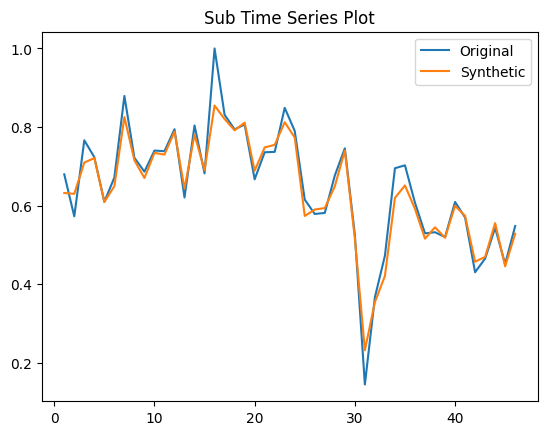

In [545]:
i=2
plt.plot(sub_series_df_train.iloc[0+i,:-1], label='Original')
plt.plot(sub_series_df_train.iloc[84+i,:-1],label='Synthetic')
plt.legend()
plt.title('Sub Time Series Plot')
plt.show()

In [546]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, y_train, X_test, y_test are your feature and target matrices
# X_train and X_test are in tabular format with rows representing time series instances

X = sub_series_df_train.drop(columns=['target']).values
y = sub_series_df_train['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

# Get unique items and their counts
unique_items, counts = np.unique(y_train, return_counts=True)

# Display unique items and their counts
for item, count in zip(unique_items, counts):
    print(f"Item {item}: {count} occurrences")

# Get unique items and their counts
unique_items, counts = np.unique(y_test, return_counts=True)

# Display unique items and their counts
for item, count in zip(unique_items, counts):
    print(f"Item {item}: {count} occurrences")

# Step 3: Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


X_train shape:  (134, 46)
X_test shape:  (34, 46)
y_train shape:  (134,)
y_test shape:  (34,)
Item 0: 67 occurrences
Item 1: 67 occurrences
Item 0: 17 occurrences
Item 1: 17 occurrences
Accuracy: 0.4411764705882353


In [464]:
print(y_test, y_pred)

[1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1] [1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0]


Epoch 1/100
5/5 [==============================] - 4s 163ms/step - loss: 0.4097 - mae: 0.5514 - accuracy: 0.4925 - val_loss: 0.2445 - val_mae: 0.4518 - val_accuracy: 0.5882
Epoch 2/100
5/5 [==============================] - 0s 26ms/step - loss: 0.2976 - mae: 0.5114 - accuracy: 0.4627 - val_loss: 0.2759 - val_mae: 0.5016 - val_accuracy: 0.5588
Epoch 3/100
5/5 [==============================] - 0s 23ms/step - loss: 0.2761 - mae: 0.5023 - accuracy: 0.5373 - val_loss: 0.2430 - val_mae: 0.4771 - val_accuracy: 0.6176
Epoch 4/100
5/5 [==============================] - 0s 34ms/step - loss: 0.2934 - mae: 0.5166 - accuracy: 0.4403 - val_loss: 0.2942 - val_mae: 0.5128 - val_accuracy: 0.4706
Epoch 5/100
5/5 [==============================] - 0s 26ms/step - loss: 0.2757 - mae: 0.5092 - accuracy: 0.4627 - val_loss: 0.2466 - val_mae: 0.4821 - val_accuracy: 0.5294
Epoch 6/100
5/5 [==============================] - 0s 28ms/step - loss: 0.2641 - mae: 0.5012 - accuracy: 0.4925 - val_loss: 0.3004 - val_ma

<ipython-input-548-cc4306afe35b>:49: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



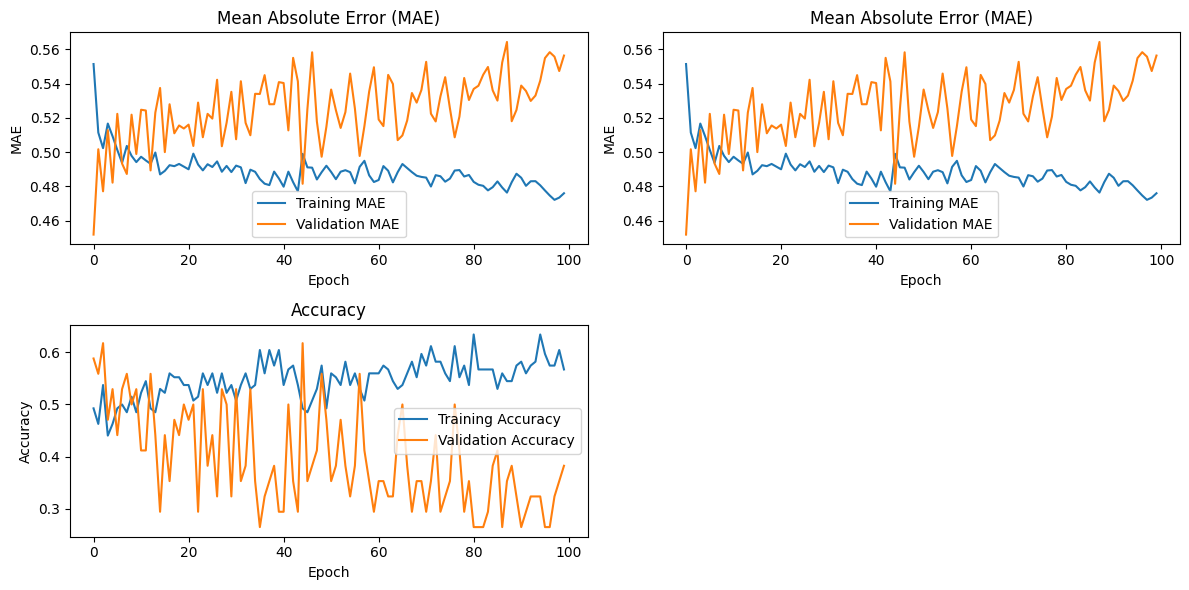

In [548]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import LearningRateScheduler

# Step 1: Prepare your data
# Assuming df_train contains your training data and df_test contains your test data
X = sub_series_df_train.drop(columns=['target']).values
y = sub_series_df_train['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Step 2: Define your neural network architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    # Dense(64, activation='relu'),
    # Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # Assuming a regression task with one output neuron
])

# Step 3: Compile the model
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=50, decay_rate=0.96, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation MAE values
plt.subplot(2, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

# Plot training & validation MAE values
plt.subplot(2, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

# Plot training & validation MAE values
plt.subplot(2, 2, 3)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



plt.tight_layout()
plt.show()

In [466]:
from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['target']).values
y = df_train['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [236]:
import numpy as np

# Step 1: Convert Time Series to Supervised Learning
def series_to_supervised(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Assuming 'data' is your time series data
n_steps = 8  # Number of time steps to look back
X, y = series_to_supervised(data, n_steps)


# Step 2: Split the Data
# Assuming you want to use 70% of the data for training and 30% for testing
split_index = int(0.7 * len(X))
X_train, X_test = X_normalized[:split_index], X_normalized[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 3: Reshape the Data
# LSTM expects input data to be in the shape [samples, timesteps, features]
n_features = 1  # Assuming univariate time series data
X_train = X_train.reshape((X_train.shape[0], n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_features))


NameError: name 'X_normalized' is not defined

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming data is prepared, split, and reshaped

# Step 4: Define the LSTM Model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(10, 1)),
    Dense(1)  # Output layer with one neuron for regression
])

# Step 5: Compile the Model
model.compile(optimizer='adam', loss='mse')

# Step 6: Train the Model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32)

# Step 7: Evaluate the Model
loss = model.evaluate(X_test, y_test)

# Step 8: Make Predictions
predictions = model.predict(X_test)


### Singular Spectrum Analysis

In [ ]:
!pip install pyts

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from pyts.decomposition import SingularSpectrumAnalysis

# time_series = np.array(normalized_df.iloc[:,1])

# # Check the length of the time series
# n_timestamps = len(time_series)

# # Choose an appropriate window size within the valid range
# window_size = min(5, n_timestamps)  # Adjust the window size if necessary

# # Singular Spectrum Analysis
# ssa = SingularSpectrumAnalysis(window_size=window_size)
# components = ssa.fit_transform(time_series.reshape(-1, 1))

# # Plot the original time series and its components
# plt.figure(figsize=(10, 6))
# plt.plot(normalized_df, label='Original Time Series', color='black')
# for i, component in enumerate(components):
#     plt.plot(component, label=f'Component {i+1}')
# plt.title('Singular Spectrum Analysis')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.show()


In [ ]:
def ssa_reconstruction(time_series, window_size, num_components):
    """
    Perform Singular Spectrum Analysis (SSA) for time series reconstruction.

    Parameters:
        time_series (array-like): The original time series data.
        window_size (int): The size of the window for embedding the trajectory matrix.
        num_components (int): The number of singular values to use for reconstruction.

    Returns:
        reconstructed_series (array-like): The reconstructed time series.
    """
    # Step 1: Construct the trajectory matrix
    N = len(time_series)
    K = N - window_size + 1
    X = np.array([time_series[i:i+window_size] for i in range(K)])

    # Step 2: Form the Hankel matrix
    H = np.array([np.roll(X, -i, axis=0) for i in range(window_size)]).reshape(-1, K)
    print(H)
    print(H.shape)
    # Step 3: Perform Singular Value Decomposition (SVD)
    U, S, V = np.linalg.svd(H)
    print(U.shape)
    print(S.shape)
    print(V.shape)

    def di_avg(H):
      win, num = H.shape
      y = np.zeros(num + win - 1)

      for i in range(1, win):
          y[i - 1] = np.mean(H[i - 1 : win - 1 : (win - 1)])

      for i in range(win, num + 1):
          y[i - 1] = np.mean(H[i - win : win - 1 : (win - 1)])

      for i in range(num + 1, num + win):
          y[i - 1] = np.mean(H[(i - win) * win : win - 1 : (win * num)])

      return y

    # Step 4: Reconstruct the time series using selected singular values and vectors
    # Step 4: Reconstruct the time series using selected singular values and vectors
    reconstructed_series = np.zeros(N)
    # for i in range(num_components):
    #     S_reshaped = di_avg(H)  # Reshape singular value to a diagonal matrix
    #     reconstructed_series += np.dot(U[:, i:i+1], np.dot(S_reshaped, V[i:i+1, :].T))

    return reconstructed_series


# Perform SSA reconstruction
reconstructed_series = ssa_reconstruction(df, window_size=50, num_components=5)

# Plot original and reconstructed time series
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(normalized_df, label='Original')
plt.plot(reconstructed_series, label='Reconstructed', linestyle='--')
plt.legend()
plt.title('Singular Spectrum Analysis (SSA) Reconstruction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()


In [ ]:
def di_avg(H):
    win, num = H.shape
    y = np.zeros(num + win - 1)

    for i in range(1, win):
        y[i - 1] = np.mean(H[i - 1 : win - 1 : (win - 1)])

    for i in range(win, num + 1):
        y[i - 1] = np.mean(H[i - win : win - 1 : (win - 1)])

    for i in range(num + 1, num + win):
        y[i - 1] = np.mean(H[(i - win) * win : win - 1 : (win * num)])

    return y

###Empirical Mode Decomposition (EMD):


Used for decomposing a time series signal into a finite number of oscillatory components known as Intrinsic Mode Functions (IMFs) and a residual

Key idea: iteratively extract oscillatory components from the original signal based on local extrema and zero-crossings.

Steps:

1. Identify all the local maxima and minima (extrema) in the time series signal.
2. EMD connects the local maxima and minima using piecewise polynomial curves (spline) interpolation to form an upper and lower envelope.
3. EMD calculates the mean of the upper and lower envelopes to obtain the mean signal
4. The first IMF is obtained by subtracting the mean signal from the original signal. This process extracts the most dominant oscillatory component from the original signal.
5. The process is repeated iteratively by treating the obtained IMF as a new signal and repeating steps 1 to 4 until certain stopping criteria are met. At each iteration, the next IMF is extracted from the residual signal.
6. The residual component, which is the remaining signal after extracting all the IMFs, represents the trend or low-frequency components of the original signal


Higher-order IMFs capturing higher-frequency oscillations, IMFs are characterized by their adaptability to the local characteristics of the signal, making EMD suitable for analyzing non-stationary and nonlinear time series data.

In [ ]:
df = df_combined_daily.copy()
df.reset_index(inplace=True)
df

In [ ]:
import numpy as np

def get_envelopes(signal):
    """Calculate upper and lower envelopes of a signal."""
    upper_env = []
    lower_env = []
    max_val = signal[0]
    min_val = signal[0]

    for val in signal:
        if val > max_val:
            max_val = val
        else:
            max_val *= 0.999  # Slight decay to prevent the envelope from sticking to peaks
        upper_env.append(max_val)

        if val < min_val:
            min_val = val
        else:
            min_val *= 0.999  # Slight decay to prevent the envelope from sticking to valleys
        lower_env.append(min_val)

    return upper_env, lower_env

def extract_imf(signal):
    """Extract the Intrinsic Mode Function (IMF) of a signal."""
    mean = (np.max(signal) + np.min(signal)) / 2
    upper_env, lower_env = get_envelopes(signal)

    # Calculate the mean of upper and lower envelopes
    mean_env = (np.array(upper_env) + np.array(lower_env)) / 2

    # Subtract mean of envelopes from the signal
    signal = signal - mean_env

    # Repeat the process until the signal becomes a monotonic function
    for i in range(10):
        upper_env, lower_env = get_envelopes(signal)
        mean_env = (np.array(upper_env) + np.array(lower_env)) / 2

        # Check if signal has reached monotonicity
        if np.allclose(signal, mean_env):
            break

        # Subtract the mean of envelopes from the signal
        signal = signal - mean_env

    return signal

def emd(signal):
    """Perform Empirical Mode Decomposition (EMD) on a signal."""
    imfs = []
    residue = signal

    for i in range(6):
        # Extract the Intrinsic Mode Function (IMF)
        imf = extract_imf(residue)
        imfs.append(imf)

        # Subtract the IMF from the residue
        residue = residue - imf

        # Check if residue is a monotonic function (i.e., the last IMF)
        if np.allclose(residue, np.zeros_like(residue)):
            break

    return imfs

# Example usage:
# Generate synthetic time series data
t = np.linspace(0, 1, 322)
signal = df['X_acc']

# Perform Empirical Mode Decomposition (EMD)
imfs = emd(signal)

# Plot the original signal and its IMFs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal', color='black')
plt.legend()
plt.show()

for i, imf in enumerate(imfs):
    plt.plot(t, imf, label=f'IMF {i+1}')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Empirical Mode Decomposition (EMD)')
plt.legend()
plt.show()


In [ ]:
import numpy as np

def get_envelopes(signal):
    """Calculate upper and lower envelopes of a signal."""
    upper_env = []
    lower_env = []
    max_val = signal[0]
    min_val = signal[0]

    for val in signal:
        if val > max_val:
            max_val = val
        else:
            max_val *= 0.999  # Slight decay to prevent the envelope from sticking to peaks
        upper_env.append(max_val)

        if val < min_val:
            min_val = val
        else:
            min_val *= 0.999  # Slight decay to prevent the envelope from sticking to valleys
        lower_env.append(min_val)

    return upper_env, lower_env

def extract_imf(signal):
    """Extract the Intrinsic Mode Function (IMF) of a signal."""
    mean = (np.max(signal) + np.min(signal)) / 2
    upper_env, lower_env = get_envelopes(signal)

    # Calculate the mean of upper and lower envelopes
    mean_env = (np.array(upper_env) + np.array(lower_env)) / 2

    # Subtract mean of envelopes from the signal
    signal = signal - mean_env

    # Repeat the process until the signal becomes a monotonic function
    for i in range(10):
        upper_env, lower_env = get_envelopes(signal)
        mean_env = (np.array(upper_env) + np.array(lower_env)) / 2

        # Check if signal has reached monotonicity
        if np.allclose(signal, mean_env):
            break

        # Subtract the mean of envelopes from the signal
        signal = signal - mean_env

    return signal

def emd(signal):
    """Perform Empirical Mode Decomposition (EMD) on a signal."""
    imfs = []
    residue = signal

    for i in range(6):
        # Extract the Intrinsic Mode Function (IMF)
        imf = extract_imf(residue)
        imfs.append(imf)

        # Subtract the IMF from the residue
        residue = residue - imf

        # Check if residue is a monotonic function (i.e., the last IMF)
        if np.allclose(residue, np.zeros_like(residue)):
            break

    return imfs

# Example usage:
# Generate synthetic time series data
t = np.linspace(0, 1, 322)
signal = df['Y_acc']

# Perform Empirical Mode Decomposition (EMD)
imfs = emd(signal)

# Plot the original signal and its IMFs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal', color='black')
plt.legend()
plt.show()

for i, imf in enumerate(imfs):
    plt.plot(t, imf, label=f'IMF {i+1}')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Empirical Mode Decomposition (EMD)')
plt.legend()
plt.show()


In [ ]:
import numpy as np

def get_envelopes(signal):
    """Calculate upper and lower envelopes of a signal."""
    upper_env = []
    lower_env = []
    max_val = signal[0]
    min_val = signal[0]

    for val in signal:
        if val > max_val:
            max_val = val
        else:
            max_val *= 0.999  # Slight decay to prevent the envelope from sticking to peaks
        upper_env.append(max_val)

        if val < min_val:
            min_val = val
        else:
            min_val *= 0.999  # Slight decay to prevent the envelope from sticking to valleys
        lower_env.append(min_val)

    return upper_env, lower_env

def extract_imf(signal):
    """Extract the Intrinsic Mode Function (IMF) of a signal."""
    mean = (np.max(signal) + np.min(signal)) / 2
    upper_env, lower_env = get_envelopes(signal)

    # Calculate the mean of upper and lower envelopes
    mean_env = (np.array(upper_env) + np.array(lower_env)) / 2

    # Subtract mean of envelopes from the signal
    signal = signal - mean_env

    # Repeat the process until the signal becomes a monotonic function
    for i in range(10):
        upper_env, lower_env = get_envelopes(signal)
        mean_env = (np.array(upper_env) + np.array(lower_env)) / 2

        # Check if signal has reached monotonicity
        if np.allclose(signal, mean_env):
            break

        # Subtract the mean of envelopes from the signal
        signal = signal - mean_env

    return signal

def emd(signal):
    """Perform Empirical Mode Decomposition (EMD) on a signal."""
    imfs = []
    residue = signal

    for i in range(6):
        # Extract the Intrinsic Mode Function (IMF)
        imf = extract_imf(residue)
        imfs.append(imf)

        # Subtract the IMF from the residue
        residue = residue - imf

        # Check if residue is a monotonic function (i.e., the last IMF)
        if np.allclose(residue, np.zeros_like(residue)):
            break

    return imfs

# Example usage:
# Generate synthetic time series data
t = np.linspace(0, 1, 322)
signal = df['Z_acc']

# Perform Empirical Mode Decomposition (EMD)
imfs = emd(signal)

# Plot the original signal and its IMFs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal', color='black')
plt.legend()
plt.show()

for i, imf in enumerate(imfs):
    plt.plot(t, imf, label=f'IMF {i+1}')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Empirical Mode Decomposition (EMD)')
plt.legend()
plt.show()


In [ ]:
import numpy as np

def get_envelopes(signal):
    """Calculate upper and lower envelopes of a signal."""
    upper_env = []
    lower_env = []
    max_val = signal[0]
    min_val = signal[0]

    for val in signal:
        if val > max_val:
            max_val = val
        else:
            max_val *= 0.999  # Slight decay to prevent the envelope from sticking to peaks
        upper_env.append(max_val)

        if val < min_val:
            min_val = val
        else:
            min_val *= 0.999  # Slight decay to prevent the envelope from sticking to valleys
        lower_env.append(min_val)

    return upper_env, lower_env

def extract_imf(signal):
    """Extract the Intrinsic Mode Function (IMF) of a signal."""
    mean = (np.max(signal) + np.min(signal)) / 2
    upper_env, lower_env = get_envelopes(signal)

    # Calculate the mean of upper and lower envelopes
    mean_env = (np.array(upper_env) + np.array(lower_env)) / 2

    # Subtract mean of envelopes from the signal
    signal = signal - mean_env

    # Repeat the process until the signal becomes a monotonic function
    for i in range(10):
        upper_env, lower_env = get_envelopes(signal)
        mean_env = (np.array(upper_env) + np.array(lower_env)) / 2

        # Check if signal has reached monotonicity
        if np.allclose(signal, mean_env):
            break

        # Subtract the mean of envelopes from the signal
        signal = signal - mean_env

    return signal

def emd(signal):
    """Perform Empirical Mode Decomposition (EMD) on a signal."""
    imfs = []
    residue = signal

    for i in range(6):
        # Extract the Intrinsic Mode Function (IMF)
        imf = extract_imf(residue)
        imfs.append(imf)

        # Subtract the IMF from the residue
        residue = residue - imf

        # Check if residue is a monotonic function (i.e., the last IMF)
        if np.allclose(residue, np.zeros_like(residue)):
            break

    return imfs

# Example usage:
# Generate synthetic time series data
t = np.linspace(0, 1, 322)
signal = df['X_ang']

# Perform Empirical Mode Decomposition (EMD)
imfs = emd(signal)

# Plot the original signal and its IMFs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal', color='black')
plt.legend()
plt.show()

for i, imf in enumerate(imfs):
    plt.plot(t, imf, label=f'IMF {i+1}')
    plt.show

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Empirical Mode Decomposition (EMD)')
plt.legend()
plt.show()


###Variational Mode Decomposition (VMD)

Unlike traditional methods like Empirical Mode Decomposition (EMD), VMD provides a more stable and controlled decomposition, especially for non-stationary signals

The main idea behind VMD is to formulate the decomposition as an optimization problem, where the objective is to find a set of oscillatory modes that best represent the original signal.

The optimization problem in VMD is typically formulated as a constrained convex optimization problem, which can be solved using various optimization techniques such as gradient descent, alternating direction method of multipliers (ADMM)

One of the key advantages of VMD over EMD is its ability to provide a more stable and interpretable decomposition, even for signals with non-stationary or time-varying characteristics.

VMD allows for better control over the number of modes and their properties, making it suitable for various signal processing applications such as denoising, feature extraction, and signal analysis.

In [ ]:
df = df_combined_daily.copy()
df.reset_index(inplace=True)
df

In [ ]:
df.shape

In [ ]:
# import numpy as np
# from scipy.signal import hilbert

# def vmd(signal, alpha=500, lamda=1, tol=1e-7, max_iter=500):
#     # Initialize parameters
#     K = 322  # Number of modes
#     N = len(signal)
#     print(signal.shape)

#     # Initialize VMD parameters
#     u = np.random.rand(K, N)  # Modes 5x322
#     u /= np.sum(u, axis=0)  # Normalize modes
#     f = np.zeros(N)  # Dual variables 322,
#     g = np.zeros((K, N))  # Gradient 5x322

#     # Define cost function
#     def cost_function(u, signal, lamda):
#         return np.sum((signal - np.sum(u, axis=0))**2) + lamda * np.sum(np.abs(np.diff(u, axis=1)))

#     # Gradient descent optimization
#     for i in range(max_iter):
#         # Compute gradient
#         for k in range(K):
#             # Apply Hilbert transform (returns complex values)
#             hilbert_transform = hilbert(u[k])
#             # Use real part of Hilbert transform to avoid complex numbers
#             f += np.real(hilbert_transform - u[k] * np.abs(hilbert_transform))
#         g = 2 * (np.sum(u, axis=0) - signal) + lamda * f

#         # Update modes using gradient descent
#         print(alpha)
#         print(g.shape)
#         print(u.shape)
#         u = u - alpha * g

#         # Project onto constraint set
#         u[u < 0] = 0
#         u /= np.sum(u, axis=0)  # Normalize modes

#         # Check convergence
#         if np.linalg.norm(g) < tol:
#             break

#     return u

# # Example usage
# # Generate synthetic signal
# t = np.linspace(0, 1, 322)
# signal = df['X_acc']


# # Apply VMD
# modes = vmd(signal)

# # Plot original signal and modes
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))
# plt.plot(t, signal, label='Original Signal')
# for mode in modes:
#     plt.plot(t, mode, label='Mode')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.title('Variational Mode Decomposition (VMD)')
# plt.show()


In [ ]:
normalized_df

In [ ]:
import numpy as np
from sklearn.decomposition import NMF

# Generate synthetic time series data (replace this with your actual data)
# Assuming you have a 2D array where each row represents a time series observation
time_series_data = normalized_df[['X_acc']]  # 100 samples, 50 features

# Define the number of components (basis vectors) for NMF
n_components = 5

# Create an NMF model
model = NMF(n_components=n_components, init='random', random_state=0,)

# Fit the model to the time series data
W = model.fit_transform(time_series_data)
H = model.components_

# Reconstruct the original data using the basis vectors and coefficients
reconstructed_data = np.dot(W, H)

# Print the reconstruction error
reconstruction_error = np.sqrt(np.mean((time_series_data - reconstructed_data) ** 2))
print("Reconstruction Error:", reconstruction_error)


In [ ]:
print(W)
print(W.shape)

In [ ]:
plt.plot(W[:,3])
plt.show

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Generate example time series data

time = normalized_df.index[:250]
signal = normalized_df['X_acc'][:250]

# Perform wavelet transform
wavelet = 'db4'  # Choose a wavelet family and type
level = 0  # Choose the level of decomposition
coeffs = pywt.wavedec(signal, wavelet, level=level)
print(len(coeffs[0]))
print(wavelet)

# Reconstruct the signal using the wavelet coefficients
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Plot original and reconstructed signals
plt.figure(figsize=(10, 6))
plt.plot(time, signal, label='Original Signal', color='blue')
plt.plot(time, reconstructed_signal, label='Reconstructed Signal', linestyle='--', color='red')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Wavelet Transform Example')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt

# Define the generator network
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 12),
            nn.ReLU(),
            nn.Linear(12, output_dim)
        )

    def forward(self, z):
        return self.model(z)

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 12),
            nn.ReLU(),
            nn.Linear(12, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Define custom dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, dataframe, column_name):
        self.data = dataframe[column_name].values.astype(float)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data, dtype=torch.float)

# Define hyperparameters
latent_dim = 6
output_dim = 1
lr = 0.0002
batch_size = 32
num_epochs = 1000

# Load data
dataframe = normalized_df  # Replace 'your_data.csv' with your file path
column_name = 'X_acc'  # Replace 'your_column_name' with the name of your time series column

# Create DataLoader
dataset = TimeSeriesDataset(dataframe, column_name)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Initialize generator and discriminator
generator = Generator(latent_dim, output_dim)
discriminator = Discriminator(output_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr)
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr)

# Training loop
for epoch in range(num_epochs):
    for i, real_data in enumerate(dataloader):
        # Train discriminator
        optimizer_D.zero_grad()
        z = torch.randn(batch_size, latent_dim)
        fake_data = generator(z)
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)
        real_output = discriminator(real_data)
        fake_output = discriminator(fake_data.detach())
        real_loss = criterion(real_output, real_labels)
        fake_loss = criterion(fake_output, fake_labels)
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train generator
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, latent_dim)
        fake_data = generator(z)
        validity = discriminator(fake_data)
        g_loss = criterion(validity, real_labels)
        g_loss.backward()
        optimizer_G.step()

        if i % 100 == 0:
            print(
                f"[Epoch {epoch}/{num_epochs}] [Batch {i}/{len(dataloader)}] [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]"
            )

# Generate synthetic time series data
num_samples = 1000
z = torch.randn(num_samples, latent_dim)
synthetic_data = generator(z).detach().numpy()

# Plot synthetic data
plt.plot(synthetic_data)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Synthetic Time Series Data')
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler

class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.input_dim = input_dim
        self.latent_dim = latent_dim

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 8),
            nn.ReLU(),
            nn.Linear(8, latent_dim)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 8),
            nn.ReLU(),
            nn.Linear(8, input_dim),
            nn.Sigmoid()
        )

    # def reparameterize(self, mu, logvar):
    #     std = torch.exp(0.5 * logvar)
    #     eps = torch.randn_like(std)
    #     return mu + eps * std

    def forward(self, x):
        # Encode
        x = self.encoder(x)
        # mu, logvar = x[:, :self.latent_dim], x[:, self.latent_dim:]
        # z = self.reparameterize(mu, logvar)

        # Decode
        x_recon = self.decoder(x)
        return x_recon

# Define custom dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe.values

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx,:].astype(float)
        return torch.tensor(sample, dtype=torch.float)


dataframe = normalized_df.iloc[:, 1:]

# Define parameters
input_dim = 10  # Number of features
latent_dim = 12  # Latent dimension
batch_size = 8
num_epochs = 1000

# Create DataLoader
dataset = TimeSeriesDataset(dataframe)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Instantiate VAE
vae = VAE(input_dim, latent_dim)

# Define optimizer
optimizer = torch.optim.Adam(vae.parameters(), lr=1e-3)

def vae_loss(recon_x, x, mu, logvar):
    # Reconstruction loss
    recon_loss = F.binary_cross_entropy(recon_x, x, reduction='sum')

    # KL divergence
    # kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    # Total loss
    total_loss = recon_loss
    # + kl_divergence
    return total_loss

# Training loop
for epoch in range(num_epochs):
    for i, data in enumerate(train_loader):
        inputs = data
        optimizer.zero_grad()
        recon_batch = vae(inputs)
        loss = vae_loss(recon_batch, inputs)
        loss.backward()
        optimizer.step()


In [ ]:
# Set the VAE model to evaluation mode
vae.eval()

# Define a function to generate synthetic data
def generate_synthetic_data(vae, num_samples):
    with torch.no_grad():
        # Sample from the latent space (assuming a standard normal distribution)
        z = torch.randn(num_samples, latent_dim)

        # Decode the samples
        synthetic_data = vae.decoder(z)

        return synthetic_data.numpy()  # Convert to NumPy array

# Generate synthetic data
num_samples = 100  # Specify the number of samples to generate
synthetic_data = generate_synthetic_data(vae, num_samples)

# Now 'synthetic_data' contains the generated synthetic data


In [ ]:
plt.plot(synthetic_data)
plt.show

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming 'df' is your original time series data
# First, fit an ARIMA model to the data
order = (1, 1, 1)  # Define the order of the ARIMA model (p, d, q)
model = ARIMA(df, order=order)
fit_model = model.fit()

# Generate synthetic data by recursively sampling from the ARIMA model's predictions
n_samples = len(df)  # Number of samples to generate
synthetic_data = fit_model.predict(start=1, end=n_samples, typ='levels')

# Plot the original and synthetic data for comparison
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original Data', color='blue')
plt.plot(synthetic_data, label='Synthetic Data', color='red')
plt.title('Original vs Synthetic Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


###DoppleGANger

In [ ]:

pip install ydata-synthetic==1.3.1

In [ ]:
normalized_df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ydata_synthetic.synthesizers.timeseries import TimeSeriesSynthesizer
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters

In [ ]:
mba_data = normalized_df
numerical_cols = normalized_df.columns


In [ ]:
numerical_cols

In [ ]:
# Defining model and training parameters
model_args = ModelParameters(batch_size=100,
                             lr=0.001,
                             betas=(0.2, 0.9),
                             latent_dim=20,
                             gp_lambda=2,
                             pac=1)

train_args = TrainParameters(epochs=400,
                             sequence_length=56,
                             sample_length=8,
                             rounds=1,
                             measurement_cols=['X_acc','Y_acc', 'Z_acc'])


In [ ]:
# Training the DoppelGANger synthesizer
model_dop_gan = TimeSeriesSynthesizer(modelname='doppelganger',model_parameters=model_args)
model_dop_gan.fit(mba_data, train_args, num_cols=numerical_cols, cat_cols=None)

# Generating new synthetic samples
synth_data = model_dop_gan.sample(n_samples=600)
synth_df = pd.concat(synth_data, axis=0)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Define the generator network
class Generator(nn.Module):
    def __init__(self, input_size, output_size):
        super(Generator, self).__init__()
        self.fc = nn.Linear(input_size, output_size)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.fc(x)
        return self.activation(x)

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()
        self.fc = nn.Linear(input_size, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x)
        return self.activation(x)

# Define custom dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, dataframe, column_idx):
        self.data = dataframe.iloc[:, column_idx].values.astype(float)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        return torch.tensor(sample, dtype=torch.float)

# Define hyperparameters
input_size = 10  # Size of random noise vector
output_size = 1  # Output size of generator
batch_size = 32
num_epochs = 100

# Define the generator and discriminator
generator = Generator(input_size, output_size)
discriminator = Discriminator(output_size)

# Define optimizer and loss function
optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002)
criterion = nn.BCELoss()

# Create DataLoader
dataframe = normalized_df  # Assuming normalized_df is your DataFrame
column_idx = 1  # Index of the column you want to use as input
dataset = TimeSeriesDataset(dataframe, column_idx)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader):
        # Train discriminator with real data
        discriminator.zero_grad()
        real_data = data.view(-1, 1)
        real_labels = torch.ones(batch_size, 1)
        real_output = discriminator(real_data)
        real_loss = criterion(real_output, real_labels)
        real_loss.backward()

        # Train discriminator with fake data
        noise = torch.randn(batch_size, input_size)
        fake_data = generator(noise)
        fake_labels = torch.zeros(batch_size, 1)
        fake_output = discriminator(fake_data.detach())
        fake_loss = criterion(fake_output, fake_labels)
        fake_loss.backward()
        optimizer_D.step()

        # Train generator
        generator.zero_grad()
        noise = torch.randn(batch_size, input_size)
        fake_data = generator(noise)
        fake_output = discriminator(fake_data)
        gen_loss = criterion(fake_output, real_labels)
        gen_loss.backward()
        optimizer_G.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], '
                  f'D_loss: {real_loss.item() + fake_loss.item()}, '
                  f'G_loss: {gen_loss.item()}')

# Generate synthetic time series data
num_samples = 1000
noise = torch.randn(num_samples, input_size)
synthetic_data = generator(noise).detach().numpy()

# Plot synthetic data
plt.plot(synthetic_data)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Synthetic Time Series Data')
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Function to generate synthetic datasets using bootstrapping
def generate_synthetic_datasets(original_data, num_datasets, sample_size):
    synthetic_datasets = []
    for _ in range(num_datasets):
        # Sample with replacement from the original data
        synthetic_data = np.random.choice(original_data, size=sample_size, replace=True)
        synthetic_datasets.append(synthetic_data)
    return synthetic_datasets

# Example usage
# Load your original time series data into a pandas Series or numpy array
# original_data = ...

# Generate synthetic datasets using bootstrapping
num_datasets = 10
sample_size = len(normalized_df)  # Use the same sample size as the original data
synthetic_datasets = generate_synthetic_datasets(original_data, num_datasets, sample_size)

# Now synthetic_datasets contains a list of numpy arrays, each representing a synthetic dataset generated using bootstrapping
